In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Loading the Data

In [143]:
data_4 = pd.read_excel("Data Sets/Data Set 4.xlsx")
data_4.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.25     37.85                  52         1627           280.0   
3    -122.25     37.85                  52          919           213.0   
4    -122.25     37.84                  52         2535           489.0   

   population  households  median_income  median_house_value ocean_proximity  
0         322         126         8.3252              452600        NEAR BAY  
1        2401        1138         8.3014              358500        NEAR BAY  
2         565         259         3.8462              342200        NEAR BAY  
3         413         193         4.0368              269700        NEAR BAY  
4        1094         514         3.6591              299200        NEAR BAY

In [144]:
data_4.shape

(18565, 10)

In [145]:
data_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18565 entries, 0 to 18564
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           18565 non-null  float64
 1   latitude            18565 non-null  float64
 2   housing_median_age  18565 non-null  int64  
 3   total_rooms         18565 non-null  int64  
 4   total_bedrooms      18376 non-null  float64
 5   population          18565 non-null  int64  
 6   households          18565 non-null  int64  
 7   median_income       18565 non-null  float64
 8   median_house_value  18565 non-null  int64  
 9   ocean_proximity     18565 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.4+ MB


### Exploring the Data

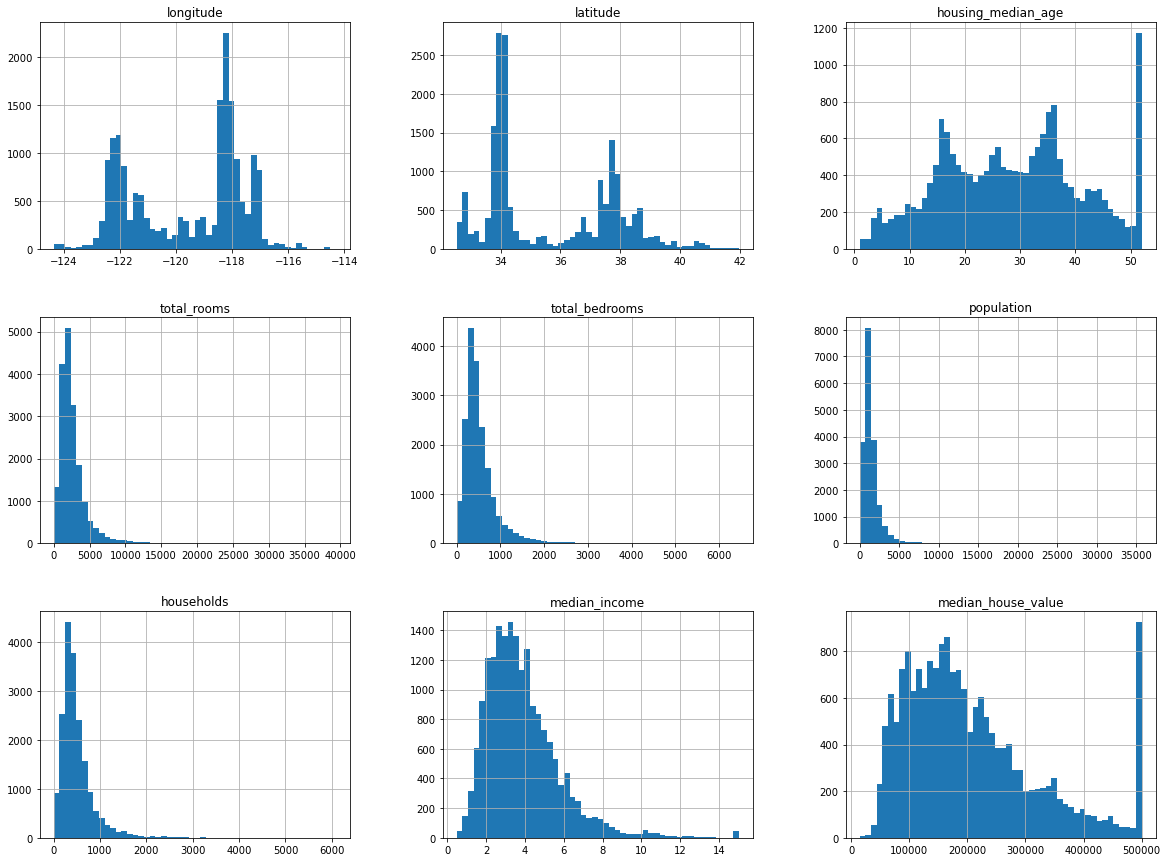

In [146]:
data_4.hist(bins = 50, figsize = (20,15))
plt.show()

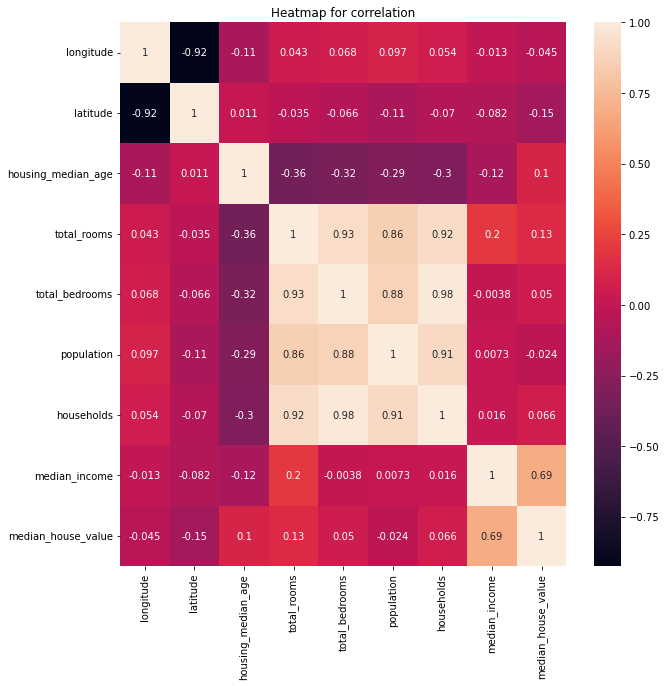

In [147]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(data_4.corr(),annot = True)
plt.title("Heatmap for correlation")
plt.show()

In [148]:
mean_households = data_4.loc[data_4.total_bedrooms.isnull()==False, 'households'].mean()
print("Mean Values of households is:", mean_households)
mean_bedrooms = data_4.loc[data_4.total_bedrooms.isnull()==False,'total_bedrooms'].mean()
print("Mean Value of bedrooms is:",mean_bedrooms)

Mean Values of households is: 499.3758707009142
Mean Value of bedrooms is: 537.7111993905094


In [149]:
data_4_non_null = data_4.copy(deep = True)
data_4_non_null.loc[data_4_non_null.total_bedrooms.isnull()==True,
                    'total_bedrooms'] = round(data_4_non_null.loc[data_4_non_null.total_bedrooms.isnull()==True,
                                                         'households']*mean_bedrooms/mean_households)

In [150]:
print(data_4.info())
print(data_4_non_null.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18565 entries, 0 to 18564
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           18565 non-null  float64
 1   latitude            18565 non-null  float64
 2   housing_median_age  18565 non-null  int64  
 3   total_rooms         18565 non-null  int64  
 4   total_bedrooms      18376 non-null  float64
 5   population          18565 non-null  int64  
 6   households          18565 non-null  int64  
 7   median_income       18565 non-null  float64
 8   median_house_value  18565 non-null  int64  
 9   ocean_proximity     18565 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.4+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18565 entries, 0 to 18564
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           1856

In [151]:
for i in range(len(data_4_non_null.columns)):
    print(data_4_non_null.iloc[:,i].value_counts(normalize = False).head(),"\n")

-118.31    151
-118.30    140
-118.32    132
-118.29    130
-118.27    130
Name: longitude, dtype: int64 

34.06    225
34.07    210
34.05    209
34.08    208
34.04    197
Name: latitude, dtype: int64 

52    1129
36     782
35     742
16     705
17     634
Name: housing_median_age, dtype: int64 

2127    16
1527    16
1613    15
1582    15
2053    15
Name: total_rooms, dtype: int64 

280.0    51
345.0    46
317.0    46
393.0    46
295.0    45
Name: total_bedrooms, dtype: int64 

891    24
761    23
825    23
999    22
850    21
Name: population, dtype: int64 

306    51
335    51
429    50
297    48
282    48
Name: households, dtype: int64 

3.1250     46
15.0001    44
4.1250     41
2.6250     39
3.8750     38
Name: median_income, dtype: int64 

500001    868
137500    112
162500    109
112500     97
187500     87
Name: median_house_value, dtype: int64 

<1H OCEAN     8188
INLAND        5921
NEAR OCEAN    2399
NEAR BAY      2052
ISLAND           5
Name: ocean_proximity, dtype: int64 


In [152]:
data_4_final = data_4_non_null.loc[data_4_non_null.median_house_value != max(data_4_non_null.median_house_value),:]

In [153]:
data_4_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17697 entries, 0 to 18564
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17697 non-null  float64
 1   latitude            17697 non-null  float64
 2   housing_median_age  17697 non-null  int64  
 3   total_rooms         17697 non-null  int64  
 4   total_bedrooms      17697 non-null  float64
 5   population          17697 non-null  int64  
 6   households          17697 non-null  int64  
 7   median_income       17697 non-null  float64
 8   median_house_value  17697 non-null  int64  
 9   ocean_proximity     17697 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.5+ MB


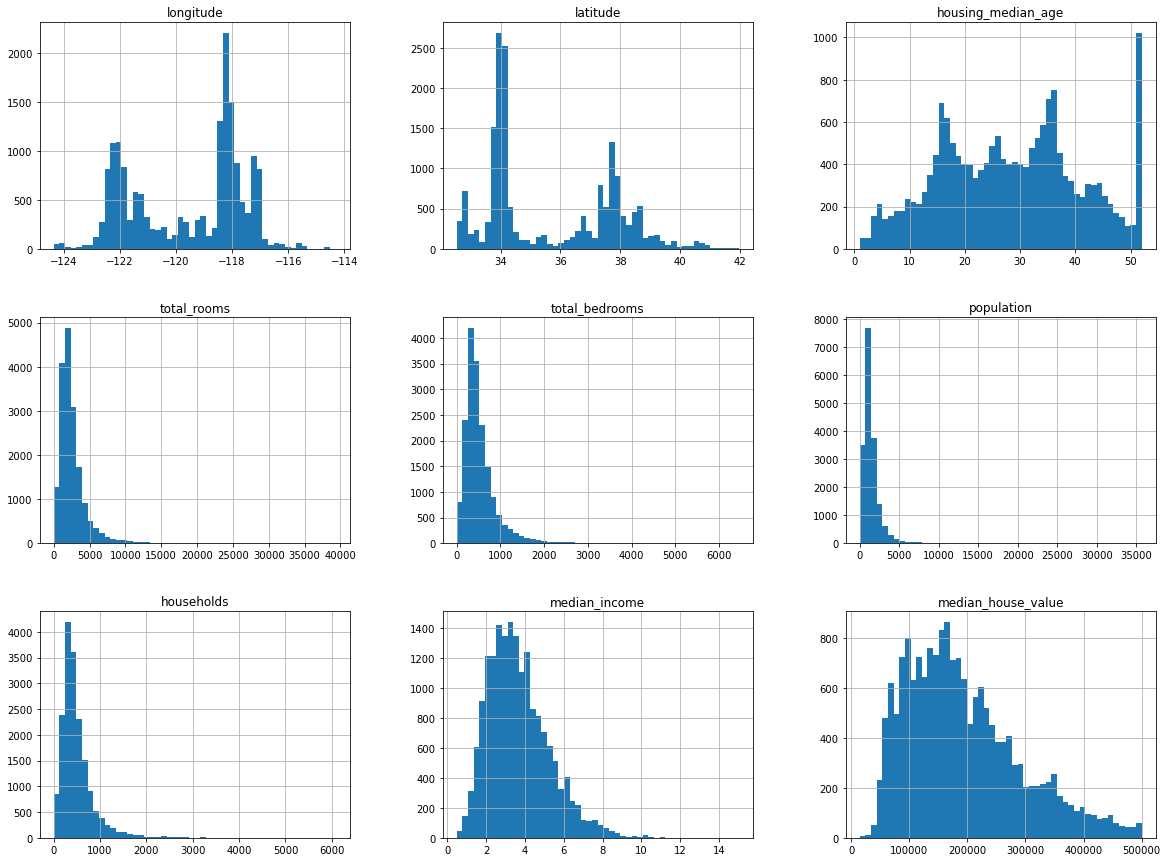

In [154]:
data_4_final.hist(bins = 50, figsize = (20,15))
plt.show()

### Data Preparation for Analytical Models:

#### Preparing data for Models
- Introducing the dummy variables to remove categorical data points
- Splitting the data into Train and Test Sets
- Standardize the X Variables

#### Running the models in following order

- Linear Regression
- Lasso Regression
- Decision Trees
- Ensemble Models
- Deep Neural Networks

In [155]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [156]:
data_final = pd.get_dummies(data_4_final, columns = data_4_final.select_dtypes('object').columns,
                           drop_first = True)

In [157]:
data_final.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.25     37.85                  52         1627           280.0   
3    -122.25     37.85                  52          919           213.0   
4    -122.25     37.84                  52         2535           489.0   

   population  households  median_income  median_house_value  \
0         322         126         8.3252              452600   
1        2401        1138         8.3014              358500   
2         565         259         3.8462              342200   
3         413         193         4.0368              269700   
4        1094         514         3.6591              299200   

   ocean_proximity_INLAND  ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                       0                       0                         1   
1                       0                       0                         1   
2                       0                       0                         1   
3                       0                       0                         1   
4                       0                       0                         1   

   ocean_proximity_NEAR OCEAN  
0                           0  
1                           0  
2                           0  
3                           0  
4                           0

In [158]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17697 entries, 0 to 18564
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   17697 non-null  float64
 1   latitude                    17697 non-null  float64
 2   housing_median_age          17697 non-null  int64  
 3   total_rooms                 17697 non-null  int64  
 4   total_bedrooms              17697 non-null  float64
 5   population                  17697 non-null  int64  
 6   households                  17697 non-null  int64  
 7   median_income               17697 non-null  float64
 8   median_house_value          17697 non-null  int64  
 9   ocean_proximity_INLAND      17697 non-null  uint8  
 10  ocean_proximity_ISLAND      17697 non-null  uint8  
 11  ocean_proximity_NEAR BAY    17697 non-null  uint8  
 12  ocean_proximity_NEAR OCEAN  17697 non-null  uint8  
dtypes: float64(4), int64(5), uint8(

In [159]:
x_variables = data_final.loc[:,data_final.columns != 'median_house_value']
y_variables = data_final.loc[:,data_final.columns == 'median_house_value']

In [160]:
x_variables.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.25     37.85                  52         1627           280.0   
3    -122.25     37.85                  52          919           213.0   
4    -122.25     37.84                  52         2535           489.0   

   population  households  median_income  ocean_proximity_INLAND  \
0         322         126         8.3252                       0   
1        2401        1138         8.3014                       0   
2         565         259         3.8462                       0   
3         413         193         4.0368                       0   
4        1094         514         3.6591                       0   

   ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                       0                         1   
1                       0                         1   
2                       0                         1   
3                       0                         1   
4                       0                         1   

   ocean_proximity_NEAR OCEAN  
0                           0  
1                           0  
2                           0  
3                           0  
4                           0

In [161]:
y_variables.head()

median_house_value
0              452600
1              358500
2              342200
3              269700
4              299200

In [162]:
X_train, X_test, y_train, y_test = train_test_split(x_variables, y_variables, test_size = 0.20, random_state = 1)

In [163]:
X_train_us = X_train.copy(deep = True)
X_test_us = X_test.copy(deep = True)
y_train_us = y_train.copy(deep = True)
y_test_us = y_test.copy(deep = True)

In [164]:
x_scaler = StandardScaler()

In [165]:
X_train.loc[:,
                   [col for col in X_train.columns 
                    if 'ocean_proximity' not in col]]= x_scaler.fit_transform(X_train.loc[:,
                                   [col for col in X_train.columns 
                                    if 'ocean_proximity' not in col ]])

In [166]:
X_train.describe().transpose()

count          mean       std       min  \
longitude                   14157.0 -2.214392e-15  1.000035 -2.387681   
latitude                    14157.0  4.035293e-16  1.000035 -1.446501   
housing_median_age          14157.0  6.223585e-17  1.000035 -2.192778   
total_rooms                 14157.0  2.158179e-17  1.000035 -1.180517   
total_bedrooms              14157.0  1.094146e-16  1.000035 -1.255110   
population                  14157.0  6.323966e-17  1.000035 -1.233388   
households                  14157.0 -2.710271e-17  1.000035 -1.284866   
median_income               14157.0 -3.011412e-17  1.000035 -2.035058   
ocean_proximity_INLAND      14157.0  3.340397e-01  0.471670  0.000000   
ocean_proximity_ISLAND      14157.0  2.119093e-04  0.014556  0.000000   
ocean_proximity_NEAR BAY    14157.0  1.072967e-01  0.309501  0.000000   
ocean_proximity_NEAR OCEAN  14157.0  1.231193e-01  0.328586  0.000000   

                                 25%       50%       75%        max  
longitude                  -1.096863  0.527874  0.782050   2.616108  
latitude                   -0.800553 -0.642551  0.965347   2.926426  
housing_median_age         -0.830361 -0.028939  0.692341   1.894474  
total_rooms                -0.535682 -0.233317  0.227215  16.536900  
total_bedrooms             -0.569967 -0.246039  0.255001  13.759778  
population                 -0.554472 -0.224859  0.256289  29.312698  
households                 -0.567968 -0.239069  0.269696  14.337840  
median_income              -0.736271 -0.143225  0.579038   6.095812  
ocean_proximity_INLAND      0.000000  0.000000  1.000000   1.000000  
ocean_proximity_ISLAND      0.000000  0.000000  0.000000   1.000000  
ocean_proximity_NEAR BAY    0.000000  0.000000  0.000000   1.000000  
ocean_proximity_NEAR OCEAN  0.000000  0.000000  0.000000   1.000000

In [167]:
X_test.loc[:,
                   [col for col in X_test.columns 
                    if 'ocean_proximity' not in col]]= x_scaler.fit_transform(X_test.loc[:,
                                   [col for col in X_test.columns 
                                    if 'ocean_proximity' not in col ]])

In [168]:
X_test.describe().transpose()

count          mean       std       min  \
longitude                   3540.0 -3.322891e-15  1.000141 -2.341622   
latitude                    3540.0  2.175786e-15  1.000141 -1.448145   
housing_median_age          3540.0  1.374920e-16  1.000141 -2.188676   
total_rooms                 3540.0  1.023663e-16  1.000141 -1.239126   
total_bedrooms              3540.0 -5.218675e-17  1.000141 -1.307702   
population                  3540.0  1.204310e-17  1.000141 -1.301677   
households                  3540.0 -1.806465e-17  1.000141 -1.334660   
median_income               3540.0  3.010774e-17  1.000141 -2.007323   
ocean_proximity_INLAND      3540.0  3.293785e-01  0.470054  0.000000   
ocean_proximity_ISLAND      3540.0  5.649718e-04  0.023766  0.000000   
ocean_proximity_NEAR BAY    3540.0  1.019774e-01  0.302661  0.000000   
ocean_proximity_NEAR OCEAN  3540.0  1.313559e-01  0.337837  0.000000   

                                 25%       50%       75%        max  
longitude                  -1.103965  0.513358  0.790613   2.499104  
latitude                   -0.800731 -0.637714  0.955202   2.930045  
housing_median_age         -0.832263 -0.034372  0.683729   1.880564  
total_rooms                -0.556852 -0.226487  0.225130  12.017580  
total_bedrooms             -0.580650 -0.241686  0.259391   8.949632  
population                 -0.585151 -0.240597  0.293142  12.433877  
households                 -0.584426 -0.234046  0.278308   9.690453  
median_income              -0.723343 -0.139015  0.595021   7.086919  
ocean_proximity_INLAND      0.000000  0.000000  1.000000   1.000000  
ocean_proximity_ISLAND      0.000000  0.000000  0.000000   1.000000  
ocean_proximity_NEAR BAY    0.000000  0.000000  0.000000   1.000000  
ocean_proximity_NEAR OCEAN  0.000000  0.000000  0.000000   1.000000

### Linear Regression

In [169]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
model_reg = reg.fit(X_train,y_train)
model_reg.score(X_train,y_train)

0.6112916971440276

In [170]:
reg = LinearRegression(fit_intercept = True)
model_reg = reg.fit(X_train,y_train)
model_reg.score(X_train,y_train)

0.6112916971440276

MAE 45254.2040660488
MSE 3820382977.3324175
RMSE 61809.24669766181
R2 Score Test Data Set 0.6186636787630462
R2 Score Train Data Set 0.6112916971440276


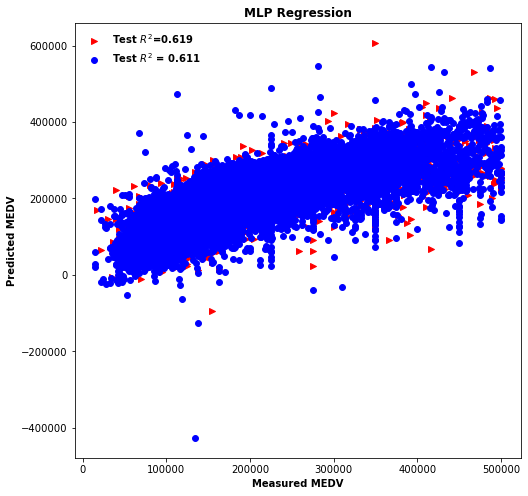

In [171]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_predict = model_reg.predict(X_test)
y_predict_train = model_reg.predict(X_train)
mae = mean_absolute_error(y_true = y_test, y_pred = model_reg.predict(X_test))
mse = mean_squared_error(y_true = y_test, y_pred = model_reg.predict(X_test))
rmse = mean_squared_error(y_true = y_test, y_pred = model_reg.predict(X_test), squared = False)

print("MAE", mae)
print("MSE", mse)
print("RMSE", rmse)
print("R2 Score Test Data Set", r2_score(y_test,y_predict))
print("R2 Score Train Data Set", r2_score(y_train,y_predict_train))

plt.figure(figsize = [8,8])
#plt.plot([0,-20000],[,4],color='black')
plt.scatter(y_test,model_reg.predict(X_test),
            s = 35, 
            color = 'red', 
            marker = '>', 
            label = 'Test $R^{2}$=''%.3f'%r2_score(y_test,y_predict),
           alpha = 1)

plt.scatter(y_train, y_predict_train,
           s = 35,
           color = 'blue',
           marker = 'o',
           label = 'Test $R^{2}$ = ''%0.3f'%r2_score(y_train, y_predict_train),
           alpha = 1)

#plt.xlim(0,60)
#plt.ylim(0,60)
plt.legend(frameon=False,prop={'weight':'bold'})
plt.xlabel('Measured MEDV',fontweight='bold')
plt.ylabel('Predicted MEDV',fontweight='bold')
plt.title('MLP Regression',fontweight='bold')
#plt.axis('square')


plt.show()

In [172]:
reg_results = pd.DataFrame([{'Model_Name':'OLS',
               'MAE': '{:,.0f}'.format(mae), 
               'MSE': '{:,.0f}'.format(mse),
               'RMSE': '{:,.0f}'.format(rmse),
              'R2_Train':'{:.2f}%'.format(r2_score(y_train,y_predict_train)*100),
              'R2_Test': '{:.2f}%'.format(r2_score(y_test,y_predict)*100)}])

#### Regularized Models
- Lasso
- Ridge
- Elastic Net

In [173]:
from sklearn.linear_model import Ridge
reg_ridge = Ridge(alpha = 2, max_iter = 5000)
reg_ridge.fit(X_train, y_train)

Ridge(alpha=2, max_iter=5000)

In [174]:
y_predict = reg_ridge.predict(X_test)
y_predict_train = reg_ridge.predict(X_train)
mae = mean_absolute_error(y_true = y_test, y_pred = y_predict)
mse = mean_squared_error(y_true = y_test, y_pred = y_predict)
rmse = mean_squared_error(y_true = y_test, y_pred = y_predict, squared = False)

print("MAE Ridge:", mae)
print("MSE Ridge:", mse)
print("RMSE Ridge:", rmse)
print("R2 Score Test Data Set", r2_score(y_test,y_predict))
print("R2 Score Train Data Set", r2_score(y_train,y_predict_train))


MAE Ridge: 45257.59922832194
MSE Ridge: 3821996689.7708817
RMSE Ridge: 61822.29929217193
R2 Score Test Data Set 0.6185026040308873
R2 Score Train Data Set 0.6111845059989005


#### Hyperparameter tuning for the Ridge and Lasso Regressions

In [175]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [176]:
ridge = Ridge()
params = {'alpha':(np.logspace(-8,8,1000))}
gscv = GridSearchCV(ridge, params,cv=10)

In [177]:
gscv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-08, 1.03756668e-08, 1.07654461e-08, 1.11698682e-08,
       1.15894830e-08, 1.20248614e-08, 1.24765955e-08, 1.29452998e-08,
       1.34316117e-08, 1.39361927e-08, 1.44597292e-08, 1.50029332e-08,
       1.55665436e-08, 1.61513269e-08, 1.67580786e-08, 1.73876240e-08,
       1.80408193e-08, 1.87185529e-08, 1.94217468e-08, 2...
       4.28185180e+07, 4.44270675e+07, 4.60960449e+07, 4.78277202e+07,
       4.96244488e+07, 5.14886745e+07, 5.34229330e+07, 5.54298552e+07,
       5.75121707e+07, 5.96727120e+07, 6.19144176e+07, 6.42403366e+07,
       6.66536327e+07, 6.91575883e+07, 7.17556092e+07, 7.44512291e+07,
       7.72481145e+07, 8.01500696e+07, 8.31610415e+07, 8.62851257e+07,
       8.95265713e+07, 9.28897872e+07, 9.63793480e+07, 1.00000000e+08])})

In [178]:
print(gscv.best_params_)
print(gscv.best_score_)

{'alpha': 0.2086024089248505}
0.6087317417000945


In [179]:
reg_ridge = Ridge(alpha = 0.2086024, max_iter = 5000)
reg_ridge.fit(X_train, y_train)
reg_ridge.score(X_train,y_train)

0.6112888674713397

In [180]:
y_predict = reg_ridge.predict(X_test)
y_predict_train = reg_ridge.predict(X_train)
mae = mean_absolute_error(y_true = y_test, y_pred = y_predict)
mse = mean_squared_error(y_true = y_test, y_pred = y_predict)
rmse = mean_squared_error(y_true = y_test, y_pred = y_predict, squared = False)

print("MAE Ridge:", mae)
print("MSE Ridge:", mse)
print("RMSE Ridge:", rmse)
print("R2 Score Test Data Set", r2_score(y_test,y_predict))
print("R2 Score Train Data Set", r2_score(y_train,y_predict_train))


MAE Ridge: 45254.80723306456
MSE Ridge: 3820267464.9383507
RMSE Ridge: 61808.31226411502
R2 Score Test Data Set 0.6186752087776213
R2 Score Train Data Set 0.6112888674713397


In [181]:
reg_results.loc[1] = ["RIDGE", 
                                           '{:,.0f}'.format(mae),
                                          '{:,.0f}'.format(mse),
                                          '{:,.0f}'.format(rmse),
                                          '{:,.2f}%'.format(r2_score(y_train,y_predict_train)*100),
                                          '{:,.2f}%'.format(r2_score(y_test,y_predict)*100)]

In [182]:
reg_results

Model_Name     MAE            MSE    RMSE R2_Train R2_Test
0        OLS  45,254  3,820,382,977  61,809   61.13%  61.87%
1      RIDGE  45,255  3,820,267,465  61,808   61.13%  61.87%

---------------------

In [183]:
from sklearn.linear_model import Lasso
lasso = Lasso()
params = {'alpha':(np.logspace(-8,8,100))}
gscv = GridSearchCV(lasso, params,cv=10)

In [184]:
gscv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': array([1.00000000e-08, 1.45082878e-08, 2.10490414e-08, 3.05385551e-08,
       4.43062146e-08, 6.42807312e-08, 9.32603347e-08, 1.35304777e-07,
       1.96304065e-07, 2.84803587e-07, 4.13201240e-07, 5.99484250e-07,
       8.69749003e-07, 1.26185688e-06, 1.83073828e-06, 2.65608778e-06,
       3.85352859e-06, 5.59081018e-06, 8.11130831e-06, 1...
       1.91791026e+04, 2.78255940e+04, 4.03701726e+04, 5.85702082e+04,
       8.49753436e+04, 1.23284674e+05, 1.78864953e+05, 2.59502421e+05,
       3.76493581e+05, 5.46227722e+05, 7.92482898e+05, 1.14975700e+06,
       1.66810054e+06, 2.42012826e+06, 3.51119173e+06, 5.09413801e+06,
       7.39072203e+06, 1.07226722e+07, 1.55567614e+07, 2.25701972e+07,
       3.27454916e+07, 4.75081016e+07, 6.89261210e+07, 1.00000000e+08])})

In [185]:
print(gscv.best_params_)
print(gscv.best_score_)

{'alpha': 0.572236765935022}
0.6087258370631455


In [186]:
reg_lasso = Lasso(alpha = 0.01, max_iter = 5000)
reg_lasso.fit(X_train, y_train)
reg_lasso.score(X_train,y_train)

0.6112916970928486

In [187]:
y_predict = reg_lasso.predict(X_test)
y_predict_train = reg_lasso.predict(X_train)

mse = mean_squared_error(y_true = y_test, y_pred = y_predict)
mae = mean_absolute_error(y_true = y_test, y_pred = y_predict)
rmse = mean_squared_error(y_true = y_test, y_pred = y_predict, squared = False)

print("MSE Lasso: ",mse)
print("MAE Lasso: ",mae)
print("RMSE Lasso: ",rmse)
print("R2 Train: ",r2_score(y_train, y_predict_train))
print("R2 Test: ",r2_score(y_test, y_predict))

MSE Lasso:  3820382590.0028615
MAE Lasso:  45254.20794337957
RMSE Lasso:  61809.24356439627
R2 Train:  0.6112916970928486
R2 Test:  0.618663717424832


In [188]:
reg_results.loc[2] = ["LASSO", 
                                           '{:,.0f}'.format(mae),
                                          '{:,.0f}'.format(mse),
                                          '{:,.0f}'.format(rmse),
                                          '{:,.2f}%'.format(r2_score(y_train,y_predict_train)*100),
                                          '{:,.2f}%'.format(r2_score(y_test,y_predict)*100)]

In [189]:
reg_results

Model_Name     MAE            MSE    RMSE R2_Train R2_Test
0        OLS  45,254  3,820,382,977  61,809   61.13%  61.87%
1      RIDGE  45,255  3,820,267,465  61,808   61.13%  61.87%
2      LASSO  45,254  3,820,382,590  61,809   61.13%  61.87%

In [190]:
coef_df = pd.DataFrame({'Params': X_train.columns.tolist(), 
                        'OLS': ['{:,.2f}'.format(elem) for elem in model_reg.coef_.flatten()], 
                        'Ridge': ['{:,.2f}'.format(elem) for elem in reg_ridge.coef_.flatten()],
                       'Lasso':['{:,.2f}'.format(elem) for elem in reg_lasso.coef_.flatten()]})

In [306]:
coef_df

Params         OLS       Ridge       Lasso
0                    longitude  -48,488.73  -48,484.90  -48,488.57
1                     latitude  -47,777.86  -47,776.28  -47,777.72
2           housing_median_age   11,740.07   11,742.61   11,740.07
3                  total_rooms  -15,845.03  -15,832.29  -15,844.79
4               total_bedrooms   37,960.31   37,952.49   37,960.11
5                   population  -32,989.04  -32,989.63  -32,988.98
6                   households   15,881.60   15,877.13   15,881.50
7                median_income   59,915.06   59,910.48   59,915.00
8       ocean_proximity_INLAND  -38,633.57  -38,638.71  -38,633.66
9       ocean_proximity_ISLAND  172,526.72  161,300.08  172,479.55
10    ocean_proximity_NEAR BAY   -6,470.55   -6,471.84   -6,470.37
11  ocean_proximity_NEAR OCEAN    3,875.09    3,870.29    3,875.04

#### KNN Regression

In [192]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [193]:
knn = KNeighborsRegressor(n_neighbors = 4).fit(X_train, y_train)
print("R2 Value for Train", r2_score(y_train,knn.predict(X_train)))
print("R2 Value for Test", r2_score(y_test,knn.predict(X_test)))

R2 Value for Train 0.8032958067997806
R2 Value for Test 0.6648370449552801


MAE 39560.32485875706
MSE 3357799340.833404
RMSE 57946.52138682187
R2 Score Test Data Set 0.6648370449552801
R2 Score Train Data Set 0.8032958067997806


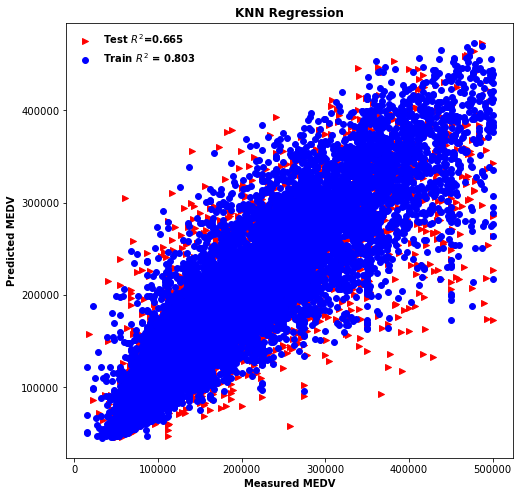

In [194]:
y_predict = knn.predict(X_test)
y_predict_train = knn.predict(X_train)
mae = mean_absolute_error(y_true = y_test, y_pred = knn.predict(X_test))
mse = mean_squared_error(y_true = y_test, y_pred = knn.predict(X_test))
rmse = mean_squared_error(y_true = y_test, y_pred = knn.predict(X_test), squared = False)

print("MAE", mae)
print("MSE", mse)
print("RMSE", rmse)
print("R2 Score Test Data Set", r2_score(y_test,y_predict))
print("R2 Score Train Data Set", r2_score(y_train,y_predict_train))

plt.figure(figsize = [8,8])

plt.scatter(y_test,knn.predict(X_test),
            s = 35, 
            color = 'red', 
            marker = '>', 
            label = 'Test $R^{2}$=''%.3f'%r2_score(y_test,y_predict),
           alpha = 1)

plt.scatter(y_train, y_predict_train,
           s = 35,
           color = 'blue',
           marker = 'o',
           label = 'Train $R^{2}$ = ''%0.3f'%r2_score(y_train, y_predict_train),
           alpha = 1)

#plt.xlim(0,60)
#plt.ylim(0,60)
plt.legend(frameon=False,prop={'weight':'bold'})
plt.xlabel('Measured MEDV',fontweight='bold')
plt.ylabel('Predicted MEDV',fontweight='bold')
plt.title('KNN Regression',fontweight='bold')
#plt.axis('square')


plt.show()

In [195]:
consolidated_results = reg_results.copy(deep = True)

In [196]:
consolidated_results

Model_Name     MAE            MSE    RMSE R2_Train R2_Test
0        OLS  45,254  3,820,382,977  61,809   61.13%  61.87%
1      RIDGE  45,255  3,820,267,465  61,808   61.13%  61.87%
2      LASSO  45,254  3,820,382,590  61,809   61.13%  61.87%

##### Grid Search for KNN Regressor

In [197]:
tuned_parameters = [{'n_neighbors':range(3,10),
                    'metric':['canberra','euclidean','minkowski']}]

reg_knn = GridSearchCV(KNeighborsRegressor(),
                      tuned_parameters,
                      cv = 10,
                      scoring = 'r2')

reg_knn.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid=[{'metric': ['canberra', 'euclidean', 'minkowski'],
                          'n_neighbors': range(3, 10)}],
             scoring='r2')

In [198]:
print(reg_knn.best_params_)
print(reg_knn.best_score_)

{'metric': 'euclidean', 'n_neighbors': 9}
0.6824815431505133


In [199]:
tuned_knn = KNeighborsRegressor(n_neighbors = 9, metric = 'euclidean')
tuned_knn.fit(X_train,y_train)

KNeighborsRegressor(metric='euclidean', n_neighbors=9)

MAE 38523.76340238544
MSE 3147722040.152773
RMSE 56104.56345211834
R2 Score Test Data Set 0.6858061743572956
R2 Score Train Data Set 0.7512671639224395


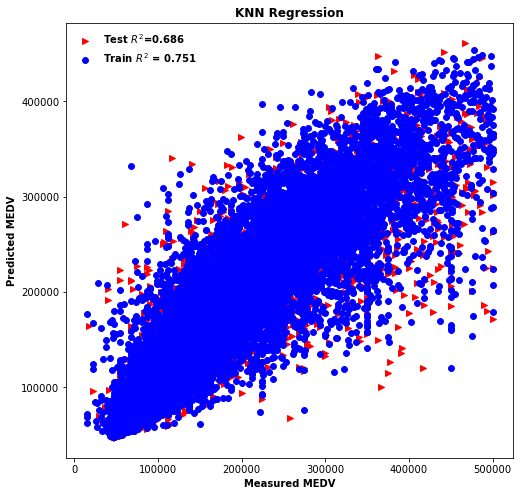

In [200]:
y_predict = tuned_knn.predict(X_test)
y_predict_train = tuned_knn.predict(X_train)
mae = mean_absolute_error(y_true = y_test, y_pred = tuned_knn.predict(X_test))
mse = mean_squared_error(y_true = y_test, y_pred = tuned_knn.predict(X_test))
rmse = mean_squared_error(y_true = y_test, y_pred = tuned_knn.predict(X_test), squared = False)

print("MAE", mae)
print("MSE", mse)
print("RMSE", rmse)
print("R2 Score Test Data Set", r2_score(y_test,y_predict))
print("R2 Score Train Data Set", r2_score(y_train,y_predict_train))

plt.figure(figsize = [8,8])

plt.scatter(y_test,tuned_knn.predict(X_test),
            s = 35, 
            color = 'red', 
            marker = '>', 
            label = 'Test $R^{2}$=''%.3f'%r2_score(y_test,y_predict),
           alpha = 1)

plt.scatter(y_train, y_predict_train,
           s = 35,
           color = 'blue',
           marker = 'o',
           label = 'Train $R^{2}$ = ''%0.3f'%r2_score(y_train, y_predict_train),
           alpha = 1)

#plt.xlim(0,60)
#plt.ylim(0,60)
plt.legend(frameon=False,prop={'weight':'bold'})
plt.xlabel('Measured MEDV',fontweight='bold')
plt.ylabel('Predicted MEDV',fontweight='bold')
plt.title('KNN Regression',fontweight='bold')
#plt.axis('square')


plt.show()

In [201]:
consolidated_results.loc[3] = ['KNN Regressor', '{:,.0f}'.format(mae),
                                          '{:,.0f}'.format(mse),
                                          '{:,.0f}'.format(rmse),
                                          '{:,.2f}%'.format(r2_score(y_train,y_predict_train)*100),
                                          '{:,.2f}%'.format(r2_score(y_test,y_predict)*100)]

In [202]:
consolidated_results

Model_Name     MAE            MSE    RMSE R2_Train R2_Test
0            OLS  45,254  3,820,382,977  61,809   61.13%  61.87%
1          RIDGE  45,255  3,820,267,465  61,808   61.13%  61.87%
2          LASSO  45,254  3,820,382,590  61,809   61.13%  61.87%
3  KNN Regressor  38,524  3,147,722,040  56,105   75.13%  68.58%

### Tree based Models

#### Decision Tree Regression

In [203]:
from sklearn.tree import DecisionTreeRegressor
reg_dtree = DecisionTreeRegressor(random_state = 1 , max_depth = 6)
reg_dtree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=6, random_state=1)

In [204]:
r2_score(y_train, reg_dtree.predict(X_train))

0.647311418313194

In [205]:
reg_dtree.fit(X_train_us,y_train_us)
r2_score(y_train_us, reg_dtree.predict(X_train_us))

0.647311418313194

The values for r2 do not change between scaled and unscaled versions therefore we will be working with the, unscaled data. 

In [206]:
y_predict = reg_dtree.predict(X_test_us)
y_predict_train = reg_dtree.predict(X_train_us)
mae = mean_absolute_error(y_true = y_test_us, y_pred = y_predict)
mse = mean_squared_error(y_true = y_test_us, y_pred = y_predict)
rmse = mean_squared_error(y_true = y_test_us, y_pred = y_predict, squared = False)

print("MAE", mae)
print("MSE", mse)
print("RMSE", rmse)
print("R2 Score Test Data Set", r2_score(y_test_us,y_predict))
print("R2 Score Train Data Set", r2_score(y_train_us,y_predict_train))

MAE 44214.08272685373
MSE 3779457497.4060526
RMSE 61477.29253477297
R2 Score Test Data Set 0.6227487069009514
R2 Score Train Data Set 0.647311418313194


##### Gridsearch for Decision Tree

In [207]:
tuned_parameters = [{'max_depth':range(2,30)}]

In [208]:
dtr = GridSearchCV(DecisionTreeRegressor(),
                  tuned_parameters,
                  cv = 10,
                  scoring = 'r2')
dtr.fit(X_train_us, y_train_us)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid=[{'max_depth': range(2, 30)}], scoring='r2')

In [209]:
print(dtr.best_params_)
print(dtr.best_score_)

{'max_depth': 9}
0.6630745325018215


In [210]:
dtr_f = DecisionTreeRegressor(max_depth = dtr.best_params_['max_depth'],random_state = 1)
dtr_f.fit(X_train_us, y_train_us)

DecisionTreeRegressor(max_depth=9, random_state=1)

In [211]:
y_predict = dtr_f.predict(X_test_us)
y_predict_train = dtr_f.predict(X_train_us)

mse = mean_squared_error(y_true = y_test_us, y_pred = y_predict)
mae = mean_absolute_error(y_true = y_test_us, y_pred = y_predict)
rmse = mean_squared_error(y_true = y_test_us, y_pred = y_predict, squared=False)
r2_test = r2_score(y_true = y_test_us, y_pred = y_predict)
r2_train = r2_score(y_true = y_train_us, y_pred = y_predict_train)

print("MSE:", mse)
print("MAE:",mae)
print("rmse", rmse)
print("R2 Train",r2_train)
print("R2 Test",r2_test)

MSE: 3461959346.5794754
MAE: 40501.1479173747
rmse 58838.417267797704
R2 Train 0.7630840513645432
R2 Test 0.6544401832670936


In [212]:
consolidated_results

Model_Name     MAE            MSE    RMSE R2_Train R2_Test
0            OLS  45,254  3,820,382,977  61,809   61.13%  61.87%
1          RIDGE  45,255  3,820,267,465  61,808   61.13%  61.87%
2          LASSO  45,254  3,820,382,590  61,809   61.13%  61.87%
3  KNN Regressor  38,524  3,147,722,040  56,105   75.13%  68.58%

In [213]:
consolidated_results.loc[4] = ["Decision Tree Regressor",
                              '{:,.0f}'.format(mae),
                              '{:,.0f}'.format(mse),
                              '{:,.0f}'.format(rmse),
                              '{:,.2f}%'.format(r2_train*100),
                              '{:,.2f}%'.format(r2_test*100)]

In [214]:
consolidated_results

Model_Name     MAE            MSE    RMSE R2_Train R2_Test
0                      OLS  45,254  3,820,382,977  61,809   61.13%  61.87%
1                    RIDGE  45,255  3,820,267,465  61,808   61.13%  61.87%
2                    LASSO  45,254  3,820,382,590  61,809   61.13%  61.87%
3            KNN Regressor  38,524  3,147,722,040  56,105   75.13%  68.58%
4  Decision Tree Regressor  40,501  3,461,959,347  58,838   76.31%  65.44%

### Ensemble Models
#### Random Forest Regression

In [215]:
from sklearn.ensemble import RandomForestRegressor

In [216]:
rfr = RandomForestRegressor(max_depth = 3).fit(X_train_us, y_train_us.values.ravel())

In [217]:
y_predict = rfr.predict(X_test_us)
y_predict_train = rfr.predict(X_train_us)

mae = mean_absolute_error(y_true = y_predict, y_pred = y_test_us)
mse = mean_squared_error(y_true = y_predict, y_pred = y_test_us)
rmse = mean_squared_error(y_true = y_predict, y_pred = y_test_us, squared=False)
r2_train = r2_score(y_train_us, y_predict_train)
r2_test = r2_score(y_test_us, y_predict)

print("MSE:", mse)
print("MAE:",mae)
print("rmse", rmse)
print("R2 Train",r2_train)
print("R2 Test",r2_test)

MSE: 4627931805.7146845
MAE: 50240.467005841216
rmse 68028.90419310519
R2 Train 0.5440091145422914
R2 Test 0.5380571790320872


#### Grid Search on the Random Forest Regressor

In [218]:
tuned_parameters = {'max_depth':[2,30],
                   'n_estimators': [10,20,30],
                   'max_features':[1,'sqrt','log2'],
                   'bootstrap':['False','True']}

RFR = GridSearchCV(RandomForestRegressor(),
                  tuned_parameters,
                  cv = 10,
                  scoring = 'r2')
RFR.fit(X_train_us, y_train_us.values.ravel())

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': ['False', 'True'], 'max_depth': [2, 30],
                         'max_features': [1, 'sqrt', 'log2'],
                         'n_estimators': [10, 20, 30]},
             scoring='r2')

In [219]:
print(RFR.best_params_)
print(RFR.best_score_)

{'bootstrap': 'False', 'max_depth': 30, 'max_features': 'sqrt', 'n_estimators': 30}
0.7738204371976606


In [220]:
y_predict = RFR.predict(X_test_us)
y_predict_train = RFR.predict(X_train_us)

mae = mean_absolute_error(y_true = y_predict, y_pred = y_test_us)
mse = mean_squared_error(y_true = y_predict, y_pred = y_test_us)
rmse = mean_squared_error(y_true = y_predict, y_pred = y_test_us, squared=False)
r2_train = r2_score(y_train_us, y_predict_train)
r2_test = r2_score(y_test_us, y_predict)

print("MSE:", mse)
print("MAE:",mae)
print("rmse", rmse)
print("R2 Train",r2_train)
print("R2 Test",r2_test)

MSE: 2355776953.274994
MAE: 32901.44545757705
rmse 48536.34672361522
R2 Train 0.96487807666913
R2 Test 0.7648551670482121


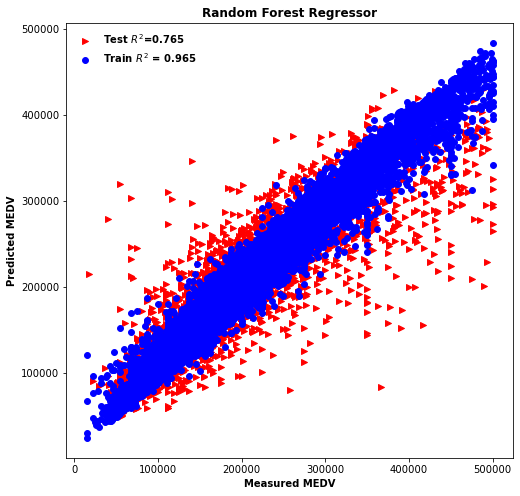

In [221]:
plt.figure(figsize = [8,8])

plt.scatter(y_test_us,RFR.predict(X_test_us),
            s = 35, 
            color = 'red', 
            marker = '>', 
            label = 'Test $R^{2}$=''%.3f'%r2_score(y_test_us,y_predict),
           alpha = 1)

plt.scatter(y_train_us, y_predict_train,
           s = 35,
           color = 'blue',
           marker = 'o',
           label = 'Train $R^{2}$ = ''%0.3f'%r2_score(y_train_us, y_predict_train),
           alpha = 1)

#plt.xlim(0,60)
#plt.ylim(0,60)
plt.legend(frameon=False,prop={'weight':'bold'})
plt.xlabel('Measured MEDV',fontweight='bold')
plt.ylabel('Predicted MEDV',fontweight='bold')
plt.title('Random Forest Regressor',fontweight='bold')
#plt.axis('square')


plt.show()

In [222]:
consolidated_results

Model_Name     MAE            MSE    RMSE R2_Train R2_Test
0                      OLS  45,254  3,820,382,977  61,809   61.13%  61.87%
1                    RIDGE  45,255  3,820,267,465  61,808   61.13%  61.87%
2                    LASSO  45,254  3,820,382,590  61,809   61.13%  61.87%
3            KNN Regressor  38,524  3,147,722,040  56,105   75.13%  68.58%
4  Decision Tree Regressor  40,501  3,461,959,347  58,838   76.31%  65.44%

In [223]:
consolidated_results.loc[5] = ["Random Forest Regressor",
                              '{:,.0f}'.format(mae),
                              '{:,.0f}'.format(mse),
                              '{:,.0f}'.format(rmse),
                              '{:,.2f}%'.format(r2_train*100),
                              '{:,.2f}%'.format(r2_test*100)]

In [224]:
consolidated_results

Model_Name     MAE            MSE    RMSE R2_Train R2_Test
0                      OLS  45,254  3,820,382,977  61,809   61.13%  61.87%
1                    RIDGE  45,255  3,820,267,465  61,808   61.13%  61.87%
2                    LASSO  45,254  3,820,382,590  61,809   61.13%  61.87%
3            KNN Regressor  38,524  3,147,722,040  56,105   75.13%  68.58%
4  Decision Tree Regressor  40,501  3,461,959,347  58,838   76.31%  65.44%
5  Random Forest Regressor  32,901  2,355,776,953  48,536   96.49%  76.49%

### Gradient Boosting

In [225]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators = 400,
                               verbose = 1).fit(X_train, y_train.values.ravel())

      Iter       Train Loss   Remaining Time 
         1  8482783311.6918            9.82s
         2  7710891869.2229            9.89s
         3  7075404604.9325            9.89s
         4  6558059273.1146            9.84s
         5  6128865354.5774            9.80s
         6  5765485652.1963            9.75s
         7  5467661336.4870            9.71s
         8  5217233505.4353            9.66s
         9  5005221618.5774            9.63s
        10  4826659600.0942            9.60s
        20  3898466321.8402            9.27s
        30  3425386701.7860            8.98s
        40  3121456047.4324            8.69s
        50  2909218868.3933            8.43s
        60  2786748795.2424            8.18s
        70  2678088725.5018            7.92s
        80  2567930627.5689            7.67s
        90  2451845946.7762            7.43s
       100  2361877896.4733            7.18s
       200  1921007849.2645            4.77s
       300  1709744253.5549            2.38s
       40

In [226]:
print(r2_score(y_test, gbr.predict(X_test)))
print(r2_score(y_train,gbr.predict(X_train)))

0.771561950507526
0.8330860583588625


In [227]:
gbr = GradientBoostingRegressor(n_estimators = 400,
                               verbose = 1).fit(X_train_us, y_train_us.values.ravel())
print(r2_score(y_test_us, gbr.predict(X_test_us)))
print(r2_score(y_train_us,gbr.predict(X_train_us)))

      Iter       Train Loss   Remaining Time 
         1  8482783311.6918            9.75s
         2  7710891869.2229            9.71s
         3  7075404604.9325            9.69s
         4  6558059273.1146            9.68s
         5  6128865354.5774            9.67s
         6  5765485652.1963            9.67s
         7  5467661336.4870            9.64s
         8  5217233505.4353            9.60s
         9  5005221618.5774            9.56s
        10  4826659600.0942            9.53s
        20  3898466321.8402            9.23s
        30  3425386701.7860            8.91s
        40  3121456047.4324            8.64s
        50  2909218868.3933            8.39s
        60  2786748795.2424            8.15s
        70  2678088725.5018            7.91s
        80  2567930627.5689            7.66s
        90  2451845946.7762            7.42s
       100  2361877896.4733            7.18s
       200  1921007849.2645            4.76s
       300  1709744253.5549            2.38s
       40

Again just like random forest and decision tree scaled and un-scaled variables give the same results therefore we can use unscaled input variables. This holds true in general for the Tree based algorithms.

In [228]:
y_predict = gbr.predict(X_test_us)
y_predict_train = gbr.predict(X_train_us)

mae = mean_absolute_error(y_true = y_predict, y_pred = y_test_us)
mse = mean_squared_error(y_true = y_predict, y_pred = y_test_us)
rmse = mean_squared_error(y_true = y_predict, y_pred = y_test_us, squared=False)
r2_train = r2_score(y_train_us, y_predict_train)
r2_test = r2_score(y_test_us, y_predict)

print("MSE:", mse)
print("MAE:",mae)
print("rmse", rmse)
print("R2 Train",r2_train)
print("R2 Test",r2_test)

MSE: 2133836667.7167814
MAE: 31452.83354445308
rmse 46193.46996834922
R2 Train 0.8330860583588626
R2 Test 0.7870084151731275


In [229]:
tuned_parameters = [{'n_estimators':[300,500],
                    'criterion':['friedman_mse','squared_error',],
                    'max_features':[1,'sqrt','log2'],
                    'max_depth':[2,10],
                    'verbose':[1]}]

GBR = GridSearchCV(GradientBoostingRegressor(),
                  tuned_parameters,
                  cv = 10,
                  scoring = 'r2')

GBR.fit(X_train_us, y_train_us.values.ravel())

      Iter       Train Loss   Remaining Time 
         1  9383294390.6817            0.56s
         2  8897530446.9232            0.48s
         3  8830199580.6006            0.48s
         4  8699445075.8197            0.46s
         5  8360541270.2327            0.46s
         6  8011966098.0278            0.51s
         7  7574158293.5829            0.54s
         8  7550496352.3583            0.56s
         9  7389656048.2087            0.56s
        10  7329636840.7805            0.54s
        20  5786284872.0193            0.51s
        30  5050058621.3739            0.50s
        40  4565195453.8610            0.49s
        50  4259890005.5868            0.47s
        60  4206398097.2137            0.43s
        70  4048138392.0307            0.41s
        80  3893341287.0433            0.39s
        90  3722088195.4666            0.38s
       100  3548497443.9813            0.36s
       200  3049534132.3930            0.17s
       300  2768273389.1071            0.00s
      Ite

         9  8107723976.4944            0.51s
        10  8024041788.6742            0.52s
        20  6992458873.2589            0.49s
        30  6245919037.2609            0.46s
        40  5562649418.0453            0.44s
        50  4919492421.6034            0.44s
        60  4548608353.5526            0.43s
        70  4296593204.2183            0.41s
        80  4080595414.6068            0.40s
        90  3917184624.5005            0.38s
       100  3707523163.3449            0.37s
       200  3053494535.4512            0.18s
       300  2813764673.0849            0.00s
      Iter       Train Loss   Remaining Time 
         1  9342049834.4522            0.30s
         2  9235877296.2359            0.37s
         3  9221509649.2615            0.40s
         4  8763583082.3260            0.41s
         5  8726192461.2038            0.44s
         6  8670537695.9223            0.51s
         7  8117867149.3175            0.53s
         8  7904796131.5671            0.54s
         

        20  6347319390.7375            0.84s
        30  5438685014.8756            0.85s
        40  4905045723.1701            0.82s
        50  4455402117.3960            0.82s
        60  4226458743.0732            0.79s
        70  3987134531.4600            0.77s
        80  3793612028.5172            0.76s
        90  3707099665.9614            0.73s
       100  3612709499.1955            0.71s
       200  3086222922.7821            0.53s
       300  2833929009.6811            0.36s
       400  2657546972.7910            0.18s
       500  2526350415.3102            0.00s
      Iter       Train Loss   Remaining Time 
         1  8900951222.4731            1.43s
         2  8501071549.7747            1.16s
         3  8134311580.4129            1.21s
         4  8101040887.0080            0.97s
         5  7903651720.7685            1.03s
         6  7623507384.4869            1.06s
         7  7580077849.2002            1.04s
         8  7519404487.8995            0.97s
         

        50  3698283237.2067            1.06s
        60  3542545655.8765            1.03s
        70  3408625859.7293            0.97s
        80  3297817574.9594            0.93s
        90  3216888487.0744            0.88s
       100  3140156329.9372            0.83s
       200  2684704868.7659            0.41s
       300  2471899650.7484            0.00s
      Iter       Train Loss   Remaining Time 
         1  8829166634.5187            1.61s
         2  8447075647.5613            1.56s
         3  7865844557.0316            1.42s
         4  7760268939.7581            1.27s
         5  7710035067.1689            1.16s
         6  7605986314.4545            1.16s
         7  7253889942.9482            1.19s
         8  6900469581.8747            1.23s
         9  6637880216.3237            1.21s
        10  6300742434.5064            1.18s
        20  4959221912.3072            1.15s
        30  4310161897.4792            1.10s
        40  3937050073.6613            1.05s
        5

       200  2634674171.8029            1.22s
       300  2431398976.9199            0.81s
       400  2289764219.7217            0.40s
       500  2199113905.8374            0.00s
      Iter       Train Loss   Remaining Time 
         1  8991139862.2482            1.46s
         2  8704119287.6128            1.72s
         3  8308156679.9919            1.78s
         4  7852160781.4316            1.88s
         5  7628140666.3309            2.00s
         6  7143826446.6476            2.12s
         7  6856459207.8595            2.18s
         8  6682635681.0147            2.11s
         9  6405265045.0674            2.12s
        10  6341899551.2824            2.11s
        20  4943806544.4195            2.03s
        30  4392738588.2199            1.93s
        40  4008769418.5803            1.82s
        50  3719109407.7782            1.84s
        60  3531773029.0991            1.84s
        70  3392390503.6964            1.79s
        80  3302964094.3538            1.75s
        9

        50  3746791547.7691            1.01s
        60  3542647698.8451            0.95s
        70  3420070921.7820            0.91s
        80  3281664199.0398            0.88s
        90  3158202569.4160            0.84s
       100  3066133840.3193            0.81s
       200  2620142792.0098            0.40s
       300  2414999106.9951            0.00s
      Iter       Train Loss   Remaining Time 
         1  8987521099.3015            1.03s
         2  8601743400.6615            1.27s
         3  7957553119.1125            1.23s
         4  7558658349.4026            1.27s
         5  7153385943.6866            1.34s
         6  6759221923.6826            1.41s
         7  6469498519.8444            1.35s
         8  6139429248.6510            1.35s
         9  5874463890.8662            1.35s
        10  5698249852.6899            1.34s
        20  4601743384.9732            1.19s
        30  4116764220.2721            1.11s
        40  3876335197.5339            1.09s
        5

       200  2664766283.5562            0.41s
       300  2459162672.5395            0.00s
      Iter       Train Loss   Remaining Time 
         1  8926779447.3360            1.30s
         2  8685552805.4865            1.22s
         3  8565373860.7837            1.22s
         4  8146308949.4348            1.23s
         5  7740543598.0835            1.11s
         6  7356385422.7047            1.15s
         7  7014843977.0926            1.15s
         8  6734326729.7985            1.15s
         9  6494819330.7500            1.14s
        10  6350141507.8822            1.11s
        20  5120039510.8473            1.12s
        30  4256661486.0398            1.15s
        40  3900674377.0129            1.09s
        50  3728229641.0973            1.03s
        60  3535250665.9612            0.97s
        70  3395051166.3905            0.93s
        80  3280627615.4992            0.90s
        90  3191552899.2582            0.85s
       100  3127729124.8236            0.81s
       20

        50  3700417995.7773            1.83s
        60  3539120190.6711            1.78s
        70  3401242833.6579            1.74s
        80  3299440180.9988            1.69s
        90  3209619059.2365            1.64s
       100  3117362269.6027            1.61s
       200  2641394908.0777            1.21s
       300  2429216228.5316            0.82s
       400  2289538961.0215            0.41s
       500  2203661722.2072            0.00s
      Iter       Train Loss   Remaining Time 
         1  8799815014.0931            2.27s
         2  8344606280.1231            2.09s
         3  7980973809.2039            2.13s
         4  7902426186.6454            1.86s
         5  7787770041.9368            1.96s
         6  7508600045.7284            1.94s
         7  7107183861.5834            1.98s
         8  6932750904.0844            1.99s
         9  6733024592.0797            2.00s
        10  6445935663.0932            2.02s
        20  5117560358.4490            2.08s
        3

        50   794939107.0877            2.19s
        60   649922816.2875            2.10s
        70   561557568.9047            2.00s
        80   498781895.8174            1.90s
        90   433623674.2619            1.81s
       100   391639498.7293            1.72s
       200   126511995.9684            0.86s
       300    45839594.4141            0.00s
      Iter       Train Loss   Remaining Time 
         1  8610866311.8069            2.60s
         2  7715832551.9802            2.66s
         3  6912378822.2148            2.61s
         4  6157570637.6076            2.56s
         5  5482112297.2546            2.62s
         6  4957124511.2094            2.65s
         7  4494850616.9390            2.63s
         8  4089824190.8001            2.64s
         9  3767317742.1416            2.62s
        10  3553961800.2341            2.59s
        20  1944427527.4290            2.47s
        30  1314765209.1593            2.37s
        40   972426869.0107            2.28s
        5

        80   497521206.4223            3.65s
        90   446758738.5424            3.57s
       100   403047275.7151            3.47s
       200   131412636.5700            2.57s
       300    48283690.7464            1.72s
       400    19670828.2682            0.86s
       500     7585330.2213            0.00s
      Iter       Train Loss   Remaining Time 
         1  8529383591.5994            4.61s
         2  7670365297.4231            4.38s
         3  6891802449.3993            4.39s
         4  6258234016.4519            4.41s
         5  5669413270.5749            4.48s
         6  5109819367.7514            4.47s
         7  4638829491.4727            4.42s
         8  4236300570.3128            4.39s
         9  3913405558.4571            4.36s
        10  3634684603.3961            4.37s
        20  1894699074.3238            4.44s
        30  1312832344.0480            4.30s
        40   997702071.0593            4.18s
        50   804679335.2964            4.06s
        6

        20  1275964733.6446            5.15s
        30   800264192.1429            5.00s
        40   598417777.3720            4.81s
        50   468799394.7166            4.62s
        60   374546307.4638            4.47s
        70   318555148.7510            4.30s
        80   268643238.3736            4.10s
        90   221477278.1958            3.92s
       100   187826713.0485            3.73s
       200    50224869.2948            1.85s
       300    14358327.9338            0.00s
      Iter       Train Loss   Remaining Time 
         1  8159181488.3369            5.65s
         2  7116983708.5681            5.49s
         3  6205499474.5871            5.51s
         4  5395581477.9474            5.44s
         5  4775727188.8867            5.39s
         6  4250500630.3745            5.34s
         7  3771305051.2537            5.36s
         8  3379887850.6620            5.34s
         9  3039947141.1257            5.34s
        10  2761065706.0225            5.35s
        2

        90   240713821.2196            3.85s
       100   203944017.0875            3.67s
       200    54479568.7169            1.85s
       300    15767498.4436            0.00s
      Iter       Train Loss   Remaining Time 
         1  8103149111.2650            5.58s
         2  7031318088.4770            5.57s
         3  6101788188.8103            5.43s
         4  5342524330.9007            5.38s
         5  4726589802.4291            5.33s
         6  4189670167.0278            5.25s
         7  3718422259.1952            5.29s
         8  3312511737.5247            5.25s
         9  2989319918.1091            5.24s
        10  2708512966.8427            5.22s
        20  1281727071.7918            5.13s
        30   819541086.1013            4.94s
        40   586877447.2046            4.79s
        50   465948377.8017            4.60s
        60   381452377.9586            4.43s
        70   320366169.8027            4.24s
        80   269176104.2308            4.07s
        9

        40   599152489.7864            8.45s
        50   475279302.9839            8.29s
        60   395512716.3246            8.09s
        70   323977487.3511            7.94s
        80   272695187.3303            7.73s
        90   232491644.9166            7.56s
       100   202362279.2028            7.38s
       200    50273739.2720            5.52s
       300    16418077.9761            3.67s
       400     5067727.8768            1.84s
       500     1668677.4569            0.00s
      Iter       Train Loss   Remaining Time 
         1  8117477205.3603            9.34s
         2  7063292890.2061            9.23s
         3  6142748625.6668            9.11s
         4  5390192319.1482            9.09s
         5  4749706454.8349            9.08s
         6  4209865188.0042            9.15s
         7  3717940226.0075            9.10s
         8  3335904345.4452            9.10s
         9  3009163106.3258            8.98s
        10  2727366486.1277            9.00s
        2

        30   822053762.2862            4.96s
        40   610621841.6285            4.77s
        50   486322423.9970            4.58s
        60   397109955.0096            4.44s
        70   330342843.2172            4.26s
        80   278444679.8623            4.07s
        90   238103178.5586            3.89s
       100   201892347.5133            3.70s
       200    52528770.6086            1.84s
       300    14529964.5677            0.00s
      Iter       Train Loss   Remaining Time 
         1  8226998762.4703            5.11s
         2  7104372298.7355            5.47s
         3  6170015225.0485            5.41s
         4  5417611627.6044            5.29s
         5  4767232533.5964            5.35s
         6  4233438223.7506            5.35s
         7  3782461196.0363            5.30s
         8  3396372008.1964            5.31s
         9  3062350969.2989            5.33s
        10  2751367665.3561            5.33s
        20  1309126244.2125            5.04s
        3

        60   385677408.6287            8.13s
        70   321607378.6614            7.98s
        80   276805582.7180            7.74s
        90   234901780.3436            7.55s
       100   204209399.1247            7.39s
       200    56914682.9804            5.49s
       300    17818237.9071            3.66s
       400     5960139.7205            1.84s
       500     2086010.5647            0.00s
      Iter       Train Loss   Remaining Time 
         1  8169883459.3087            9.68s
         2  7058372399.2825            9.51s
         3  6106072785.3786            9.48s
         4  5385166441.9081            9.37s
         5  4739078691.2559            9.17s
         6  4171774017.5340            8.94s
         7  3710291537.7705            8.97s
         8  3309307901.7796            8.90s
         9  2966578950.7406            8.94s
        10  2699161957.3994            8.87s
        20  1245925465.0660            8.68s
        30   811953618.8343            8.52s
        4

       100  3630116509.5897            0.35s
       200  2975914497.1759            0.17s
       300  2712653375.0085            0.00s
      Iter       Train Loss   Remaining Time 
         1  9323452401.8568            0.37s
         2  8828170287.8716            0.58s
         3  8753287220.5137            0.61s
         4  8339236458.7945            0.57s
         5  8315262444.5636            0.51s
         6  8125239549.6172            0.50s
         7  8092301773.4186            0.50s
         8  7804680883.6120            0.47s
         9  7747667752.4185            0.47s
        10  7696026832.8822            0.47s
        20  6391012131.5669            0.51s
        30  5622289217.0162            0.47s
        40  5291352355.6524            0.44s
        50  4872657876.7354            0.42s
        60  4599088692.2207            0.40s
        70  4311704044.5562            0.38s
        80  4081366679.9329            0.37s
        90  3924762278.1591            0.36s
       10

        20  6091515095.6142            0.56s
        30  5661146790.7382            0.53s
        40  5063340453.3032            0.50s
        50  4561577545.3455            0.47s
        60  4420027556.1057            0.45s
        70  4190500418.9400            0.43s
        80  3940568309.4198            0.41s
        90  3734281075.2153            0.39s
       100  3625493962.0777            0.37s
       200  2998256884.3400            0.18s
       300  2746617153.1153            0.00s
      Iter       Train Loss   Remaining Time 
         1  9430180549.5800            0.57s
         2  8983406162.9180            0.45s
         3  8548433866.2675            0.68s
         4  8416799026.9121            0.67s
         5  8342320657.8748            0.68s
         6  8017801784.4117            0.78s
         7  7918861707.4887            0.79s
         8  7836271676.7103            0.81s
         9  7472370516.5901            0.86s
        10  7464046881.3916            0.89s
        2

         4  8629159162.3990            0.89s
         5  8582845689.9088            0.98s
         6  8544079749.7841            1.03s
         7  8103857022.4295            1.06s
         8  8039008832.7648            1.03s
         9  7799778987.3732            1.06s
        10  7772071337.9208            1.04s
        20  6829215266.3482            0.96s
        30  6059354847.5571            0.90s
        40  5404404674.5108            0.86s
        50  4905319099.3366            0.84s
        60  4587696512.6916            0.81s
        70  4318028844.6888            0.79s
        80  4118805093.8889            0.76s
        90  4022497453.3861            0.74s
       100  3843376681.8924            0.73s
       200  3087797699.8123            0.55s
       300  2800576012.9908            0.36s
       400  2623647079.9941            0.18s
       500  2491625249.4883            0.00s
      Iter       Train Loss   Remaining Time 
         1  9306760652.6328            1.09s
         

        50  3692805165.0038            1.02s
        60  3503950491.3347            0.97s
        70  3374874759.6872            0.92s
        80  3274359055.2719            0.89s
        90  3173964229.3799            0.85s
       100  3112250383.6233            0.81s
       200  2636156913.2043            0.40s
       300  2440096788.5107            0.00s
      Iter       Train Loss   Remaining Time 
         1  9272289089.5299            1.26s
         2  8799100147.7141            1.23s
         3  8434749732.0591            1.11s
         4  8209881963.8596            1.10s
         5  8051223307.9737            1.13s
         6  7950911241.0521            1.16s
         7  7510100348.3141            1.22s
         8  7141280615.0328            1.28s
         9  6826426098.6223            1.26s
        10  6541072755.1329            1.30s
        20  5184006734.2309            1.18s
        30  4386400121.2227            1.15s
        40  3952570290.6243            1.09s
        5

        50  3708125879.4379            1.86s
        60  3541786335.8555            1.84s
        70  3406103720.1614            1.81s
        80  3274925244.5697            1.78s
        90  3192352201.4589            1.73s
       100  3125711641.7264            1.69s
       200  2665921118.4595            1.23s
       300  2451265034.8547            0.82s
       400  2319260074.8575            0.41s
       500  2214471470.0154            0.00s
      Iter       Train Loss   Remaining Time 
         1  9242991020.4567            2.02s
         2  8556549639.0863            2.13s
         3  8448373951.2554            1.97s
         4  7902438781.6590            1.93s
         5  7560028001.4758            1.92s
         6  7167222960.3960            1.94s
         7  6840471069.8707            1.93s
         8  6559299436.3446            1.98s
         9  6437043900.1957            2.00s
        10  6211533163.1634            2.00s
        20  4853082204.2072            1.98s
        3

        50  3686113686.5119            1.02s
        60  3519341025.6183            0.99s
        70  3334403802.6995            0.95s
        80  3233097028.4462            0.91s
        90  3156558016.3833            0.88s
       100  3094442126.0187            0.84s
       200  2641197936.6570            0.41s
       300  2417158941.6561            0.00s
      Iter       Train Loss   Remaining Time 
         1  8925381008.6390            1.20s
         2  8594605471.2734            1.35s
         3  8417775404.4357            1.21s
         4  7912654484.2240            1.31s
         5  7738739441.0289            1.30s
         6  7510296487.4214            1.31s
         7  7324188273.4064            1.29s
         8  6886529233.3877            1.30s
         9  6609227232.4037            1.32s
        10  6340253898.1988            1.31s
        20  5054926354.5439            1.24s
        30  4316874476.4677            1.18s
        40  3862057944.1874            1.14s
        5

       200  2613674178.0442            0.41s
       300  2434809418.7091            0.00s
      Iter       Train Loss   Remaining Time 
         1  8939612266.8441            1.91s
         2  8424881328.3024            2.12s
         3  8370319504.9739            2.02s
         4  7917061322.9961            2.03s
         5  7679828478.9154            2.05s
         6  7297316563.1381            2.20s
         7  7083477141.7899            2.21s
         8  6777778753.8958            2.12s
         9  6398055488.0227            2.09s
        10  6118076712.4618            2.09s
        20  5111241709.9660            1.93s
        30  4520390673.8248            1.80s
        40  4042276359.4747            1.78s
        50  3824455781.1724            1.76s
        60  3610762234.9928            1.72s
        70  3484834121.1266            1.68s
        80  3323298087.5862            1.64s
        90  3221448778.9174            1.59s
       100  3111215861.2972            1.56s
       20

        50  3696803923.1986            1.84s
        60  3511589197.1141            1.81s
        70  3414461400.5018            1.72s
        80  3310270929.2515            1.64s
        90  3207168203.7431            1.62s
       100  3110555560.5448            1.57s
       200  2608523824.6071            1.19s
       300  2402261101.0888            0.80s
       400  2277410503.6475            0.40s
       500  2171250752.5608            0.00s
      Iter       Train Loss   Remaining Time 
         1  9302691526.7205            1.38s
         2  8814378958.6613            1.34s
         3  8333148167.9476            1.36s
         4  7969486433.0070            1.61s
         5  7793431486.7641            1.66s
         6  7566965477.7502            1.69s
         7  7269501780.4975            1.67s
         8  7062033705.3244            1.63s
         9  6958397360.7866            1.62s
        10  6881814475.0931            1.60s
        20  5189000945.9622            1.83s
        3

        50   779371402.5255            2.18s
        60   658896960.7332            2.09s
        70   576513170.2086            1.98s
        80   507175210.2939            1.89s
        90   457494419.6936            1.80s
       100   404084585.2833            1.71s
       200   128227589.0584            0.85s
       300    44964922.3352            0.00s
      Iter       Train Loss   Remaining Time 
         1  8247928274.8618            2.87s
         2  7297911677.7478            2.67s
         3  6593188263.6410            2.53s
         4  5874788106.2364            2.51s
         5  5517974378.1014            2.50s
         6  5100208398.2458            2.48s
         7  4643673866.3528            2.48s
         8  4256353662.4129            2.50s
         9  3898111884.1939            2.51s
        10  3545414554.5006            2.50s
        20  1873880365.2271            2.44s
        30  1287343524.9141            2.35s
        40   981363907.3691            2.27s
        5

        50   801195133.8680            3.90s
        60   684704431.4986            3.81s
        70   587579456.6596            3.73s
        80   505737172.1839            3.64s
        90   451372150.7967            3.56s
       100   394574183.1721            3.47s
       200   124919974.3605            2.58s
       300    43109862.8394            1.71s
       400    16753555.1982            0.86s
       500     7286306.3605            0.00s
      Iter       Train Loss   Remaining Time 
         1  8459530646.2736            4.29s
         2  7789291060.6541            4.31s
         3  6972108203.3352            4.31s
         4  6305472046.1632            4.29s
         5  5615141822.6668            4.32s
         6  5098410471.1382            4.35s
         7  4776407314.8935            4.31s
         8  4354543669.6852            4.29s
         9  4011177508.6820            4.29s
        10  3676968086.7102            4.27s
        20  1878172428.8540            4.17s
        3

        10  2750529545.0236            5.24s
        20  1325980874.7263            5.06s
        30   831641017.1939            4.95s
        40   617393821.5860            4.75s
        50   488885119.7504            4.60s
        60   401089434.3671            4.42s
        70   330675967.0108            4.23s
        80   282306186.0320            4.05s
        90   233606719.0046            3.85s
       100   200217879.0955            3.66s
       200    54002028.1607            1.82s
       300    15840001.3552            0.00s
      Iter       Train Loss   Remaining Time 
         1  8121875462.2808            5.48s
         2  7064562133.4180            5.50s
         3  6130594121.9050            5.38s
         4  5377866249.7142            5.37s
         5  4736944982.1621            5.40s
         6  4186687297.0386            5.38s
         7  3712874458.2911            5.35s
         8  3313538572.9772            5.34s
         9  2971410306.7751            5.31s
        1

        70   339792695.4566            4.24s
        80   287131865.0538            4.05s
        90   239637175.0646            3.86s
       100   206282834.8069            3.68s
       200    54068290.1804            1.84s
       300    16802946.5896            0.00s
      Iter       Train Loss   Remaining Time 
         1  8122494922.8808            9.53s
         2  7036727867.9701            9.66s
         3  6106655604.6057            9.41s
         4  5368679770.7694            9.30s
         5  4737489481.5924            9.32s
         6  4186636447.6288            9.23s
         7  3696585838.9672            9.17s
         8  3305510587.8764            9.12s
         9  2987110998.7472            8.98s
        10  2721459026.2230            8.95s
        20  1265881361.0252            8.71s
        30   836508972.2921            8.49s
        40   607236028.3795            8.41s
        50   478891351.3186            8.28s
        60   379894455.1263            8.11s
        7

         9  3006527565.9529            9.09s
        10  2726929510.3100            9.02s
        20  1273711216.2925            8.92s
        30   804335036.6377            8.71s
        40   606464888.2806            8.54s
        50   477359996.0665            8.37s
        60   394171145.7724            8.19s
        70   326659341.2129            8.00s
        80   272379583.6082            7.80s
        90   235811436.5359            7.63s
       100   207136839.0212            7.47s
       200    52438040.2840            5.57s
       300    16109794.8421            3.70s
       400     5341471.7295            1.85s
       500     1731850.0344            0.00s
      Iter       Train Loss   Remaining Time 
         1  8142575442.3238            9.12s
         2  7007999088.4050            8.92s
         3  6113782002.5447            8.97s
         4  5341177594.1359            9.12s
         5  4675756824.3091            9.21s
         6  4120587776.3759            9.17s
         

        10  2782445323.9901            5.37s
        20  1290093813.6273            5.16s
        30   830419891.6655            4.97s
        40   604212710.4803            4.78s
        50   478767251.1180            4.58s
        60   380593633.2767            4.38s
        70   330770383.8025            4.19s
        80   275852384.5651            4.00s
        90   233370523.1349            3.81s
       100   199798318.3220            3.63s
       200    52420645.8627            1.82s
       300    15952951.9982            0.00s
      Iter       Train Loss   Remaining Time 
         1  8021795508.0019            5.84s
         2  6917359470.7921            5.70s
         3  5993295554.7226            5.71s
         4  5237784780.4975            5.74s
         5  4613610190.3403            5.61s
         6  4081624322.3612            5.53s
         7  3660463507.5829            5.50s
         8  3241216895.3260            5.44s
         9  2898944481.5258            5.44s
        1

        30   795921132.0802            8.53s
        40   587788677.7942            8.29s
        50   476325544.0748            8.17s
        60   392784877.7945            8.03s
        70   330279961.0467            7.85s
        80   280518848.8925            7.68s
        90   243394241.5746            7.48s
       100   209265853.4673            7.31s
       200    52727458.4903            5.47s
       300    15200387.9620            3.64s
       400     5019687.2200            1.83s
       500     1751967.3078            0.00s
      Iter       Train Loss   Remaining Time 
         1  8104731474.3830            8.58s
         2  7031581727.3506            8.96s
         3  6139760284.2239            9.01s
         4  5334141473.5552            8.97s
         5  4699278960.0091            9.03s
         6  4130696830.5155            8.96s
         7  3659660895.5221            8.95s
         8  3271519389.5652            9.09s
         9  2945664162.8968            9.13s
        1

GridSearchCV(cv=10, estimator=GradientBoostingRegressor(),
             param_grid=[{'criterion': ['friedman_mse', 'squared_error'],
                          'max_depth': [2, 10],
                          'max_features': [1, 'sqrt', 'log2'],
                          'n_estimators': [300, 500], 'verbose': [1]}],
             scoring='r2')

In [230]:
GBR.best_params_

{'criterion': 'squared_error',
 'max_depth': 10,
 'max_features': 'sqrt',
 'n_estimators': 500,
 'verbose': 1}

In [231]:
GBR.best_score_

0.8033069581692599

In [232]:
y_predict = GBR.predict(X_test_us)
y_predict_train = GBR.predict(X_train_us)

mae = mean_absolute_error(y_true = y_test_us, y_pred = y_predict)
mse = mean_squared_error(y_true = y_test_us, y_pred = y_predict)
rmse = mean_squared_error(y_true = y_test_us, y_pred = y_predict, squared=False)
r2_train = r2_score(y_true = y_train_us,y_pred =  y_predict_train)
r2_test = r2_score(y_true = y_test_us, y_pred = y_predict)

print("MSE:", mse)
print("MAE:",mae)
print("rmse", rmse)
print("R2 Train",r2_train)
print("R2 Test",r2_test)

MSE: 2058940716.7001913
MAE: 29797.048176086697
rmse 45375.55197130048
R2 Train 0.9997135203520741
R2 Test 0.794484248513834


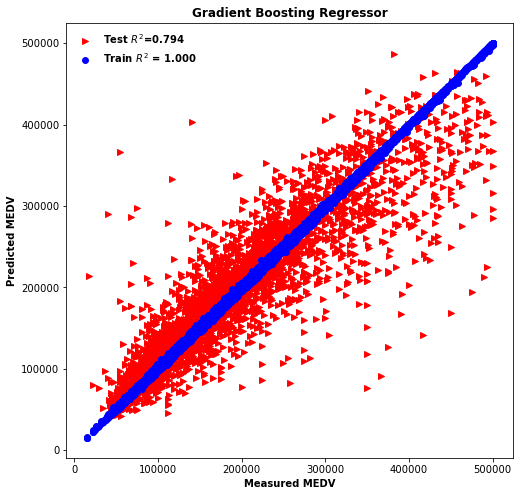

In [233]:
plt.figure(figsize = [8,8])

plt.scatter(y_test_us,GBR.predict(X_test_us),
            s = 35, 
            color = 'red', 
            marker = '>', 
            label = 'Test $R^{2}$=''%.3f'%r2_score(y_test_us,y_predict),
           alpha = 1)

plt.scatter(y_train_us, y_predict_train,
           s = 35,
           color = 'blue',
           marker = 'o',
           label = 'Train $R^{2}$ = ''%0.3f'%r2_score(y_train_us, y_predict_train),
           alpha = 1)

#plt.xlim(0,60)
#plt.ylim(0,60)
plt.legend(frameon=False,prop={'weight':'bold'})
plt.xlabel('Measured MEDV',fontweight='bold')
plt.ylabel('Predicted MEDV',fontweight='bold')
plt.title('Gradient Boosting Regressor',fontweight='bold')
#plt.axis('square')


plt.show()

In [234]:
consolidated_results

Model_Name     MAE            MSE    RMSE R2_Train R2_Test
0                      OLS  45,254  3,820,382,977  61,809   61.13%  61.87%
1                    RIDGE  45,255  3,820,267,465  61,808   61.13%  61.87%
2                    LASSO  45,254  3,820,382,590  61,809   61.13%  61.87%
3            KNN Regressor  38,524  3,147,722,040  56,105   75.13%  68.58%
4  Decision Tree Regressor  40,501  3,461,959,347  58,838   76.31%  65.44%
5  Random Forest Regressor  32,901  2,355,776,953  48,536   96.49%  76.49%

In [235]:
consolidated_results.loc[6] = ["Gradient Boosting Regressor",
                              '{:,.0f}'.format(mae),
                              '{:,.0f}'.format(mse),
                              '{:,.0f}'.format(rmse),
                              '{:,.2f}%'.format(r2_train*100),
                              '{:,.2f}%'.format(r2_test*100)]

In [236]:
consolidated_results

Model_Name     MAE            MSE    RMSE R2_Train R2_Test
0                          OLS  45,254  3,820,382,977  61,809   61.13%  61.87%
1                        RIDGE  45,255  3,820,267,465  61,808   61.13%  61.87%
2                        LASSO  45,254  3,820,382,590  61,809   61.13%  61.87%
3                KNN Regressor  38,524  3,147,722,040  56,105   75.13%  68.58%
4      Decision Tree Regressor  40,501  3,461,959,347  58,838   76.31%  65.44%
5      Random Forest Regressor  32,901  2,355,776,953  48,536   96.49%  76.49%
6  Gradient Boosting Regressor  29,797  2,058,940,717  45,376   99.97%  79.45%

-------------

### Support Vector Regression

In [237]:
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf')
svr.fit(X_train, y_train.values.ravel())

SVR()

We need to scale the y variables as well for the Support Vector Machine. 

In [238]:
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train)
y_test_scaled = y_scaler.fit_transform(y_test)

In [239]:
svr.fit(X_train,y_train_scaled.ravel())

SVR()

In [240]:
print(r2_score(y_train_scaled,svr.predict(X_train)))
print(r2_score(y_test_scaled,svr.predict(X_test)))

0.7382938603921764
0.728205429046479


In [241]:
y_predict = svr.predict(X_test)
y_predict_train = svr.predict(X_train)

mae = mean_absolute_error(y_true = y_test_scaled, y_pred = y_predict)
mse = mean_squared_error(y_true = y_test_scaled, y_pred = y_predict)
rmse = mean_squared_error(y_true = y_test_scaled, y_pred = y_predict, squared=False)
r2_train = r2_score(y_true = y_train_scaled, y_pred = y_predict_train)
r2_test = r2_score(y_true = y_test_scaled,y_pred= y_predict)

print("MSE:", mse)
print("MAE:",mae)
print("rmse", rmse)
print("R2 Train",r2_train)
print("R2 Test",r2_test)

MSE: 0.27179457095352094
MAE: 0.3522886992728093
rmse 0.5213392091081592
R2 Train 0.7382938603921764
R2 Test 0.728205429046479


##### Grid Search for Support Vector Regression
NOTE: SVR takes too much time therefore we will use the halving grid search instead of GridSearchCV.

In [242]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

In [243]:
parameter_list = {'C':[0.1,1,10,100],
                  'gamma':[1,0.1,0.01,0.001],
                  'kernel':['rbf','poly','sigmoid','linear'],
                 'verbose':[1]}

SVR_1 = HalvingGridSearchCV(SVR(),
                            parameter_list, 
                            cv = 5, 
                            scoring = 'r2',
                            n_jobs = -1, 
                            verbose = 5)
SVR_1.fit(X_train,y_train_scaled.ravel())

n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 524
max_resources_: 14157
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 64
n_resources: 524
Fitting 5 folds for each of 64 candidates, totalling 320 fits
*
optimization finished, #iter = 215
obj = -23.690512, rho = 0.140439
nSV = 360, nBSV = 325
.*
optimization finished, #iter = 217
obj = -24.614378, rho = 0.178655
nSV = 365, nBSV = 332
*
optimization finished, #iter = 231
obj = -22.229252, rho = 0.236664
nSV = 375, nBSV = 335
...*
optimization finished, #iter = 226
obj = -23.326054, rho = 0.161223
nSV = 371, nBSV = 325
*
optimization finished, #iter = 223
obj = -25.563239, rho = 0.255519
nSV = 379, nBSV = 344
....................................................................................*
optimization finished, #iter = 393
obj = -78.910557, rho = -0.012316
nSV = 418, nBSV = 418
................*
optimization finished, #iter = 393
obj = -74.035149, rho = -1.008054
nSV = 416

..........................*
optimization finished, #iter = 702
.obj = -123.589813, rho = -0.031821
nSV = 366, nBSV = 138
....................................*.........................*
optimization finished, #iter = 438
obj = -8049.880729, rho = 0.414974
nSV = 419, nBSV = 417
.......*
optimization finished, #iter = 457
obj = -7837.696908, rho = -9.396139
nSV = 419, nBSV = 416
...........................................................................*.............................................*.*
optimization finished, #iter = 33024
obj = -160.181796, rho = -0.073544
nSV = 350, nBSV = 337
...........*
optimization finished, #iter = 427
obj = -7387.882678, rho = 8.755006
nSV = 419, nBSV = 416
............................*
optimization finished, #iter = 403753
.obj = -11.011427, rho = -0.098435
nSV = 362, nBSV = 240
*
optimization finished, #iter = 364240
.obj = -12.550963, rho = -0.047909
nSV = 375, nBSV = 256
*
optimization finished, #iter = 541
obj = -125.444522, rho = -0.261140
nSV

..............................*....*
optimization finished, #iter = 2217
obj = -225.313360, rho = -0.119194
nSV = 364, nBSV = 6
..*.*.
optimization finished, #iter = 1815
.obj = -198.695762, rho = -0.250995
nSV = 371, nBSV = 9
..................................................*
optimization finished, #iter = 257
obj = -64584.515800, rho = -12.841498
nSV = 417, nBSV = 412
............*
optimization finished, #iter = 451
obj = -788752.951444, rho = 94.042739
nSV = 419, nBSV = 417
............................................................*.................*
optimization finished, #iter = 27451
obj = -1388.877177, rho = 0.038356
nSV = 358, nBSV = 272
.....................*....................................................................*
optimization finished, #iter = 320
.obj = -764019.060933, rho = -61.998681
nSV = 419, nBSV = 417
............*..................................................................................................................*.*
optimization finished, 

...............................................................*
optimization finished, #iter = 243
obj = -1758.185984, rho = 0.042763
nSV = 351, nBSV = 344
.............................................*.....................................*.............................................*...........*
optimization finished, #iter = 348
obj = -1945.628255, rho = -0.008182
nSV = 351, nBSV = 344
....................................*..........*...........................*................................................................................................*.......................................................................................................................................................*..........*.............*......................................*..............*
optimization finished, #iter = 126367
obj = -1559.622070, rho = -0.044856
nSV = 357, nBSV = 344
................................................................................................*.........

.....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................*.....................................................................................................................................................*............*..............................................................*................................................................

...............................................................................................................................................................................*...................*....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

......................................................................................................................................................................................................................................................................*
optimization finished, #iter = 2771421
obj = -74.136477, rho = -0.012387
nSV = 356, nBSV = 186
.......................................................................................................*
optimization finished, #iter = 2677261
obj = -86.749591, rho = -0.123269
nSV = 371, nBSV = 201


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

................................................................................................................................................................................................................................................................................................................................*.......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

...........................................................................................................................................................................................................................................................*............................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................*.................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

..................................................................................................*.....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

..................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................*.....................................................................................................................................................................................................................................................................................................................................................................................................................................

...........................................................................................[LibSVM][CV 1/5] END C=0.1, gamma=1, kernel=poly, verbose=1;, score=(train=0.805, test=-0.058) total time=   0.6s
[LibSVM][CV 3/5] END C=1, gamma=0.001, kernel=rbf, verbose=1;, score=(train=0.337, test=0.326) total time=   0.0s
[LibSVM][CV 4/5] END C=1, gamma=0.001, kernel=rbf, verbose=1;, score=(train=0.341, test=0.298) total time=   0.0s
[LibSVM][CV 5/5] END C=1, gamma=0.001, kernel=rbf, verbose=1;, score=(train=0.359, test=0.325) total time=   0.0s
[LibSVM][CV 1/5] END C=1, gamma=0.001, kernel=poly, verbose=1;, score=(train=-0.026, test=-0.039) total time=   0.0s
[LibSVM][CV 4/5] END C=10, gamma=1, kernel=linear, verbose=1;, score=(train=0.575, test=0.546) total time=   0.1s
[LibSVM][CV 5/5] END C=10, gamma=1, kernel=linear, verbose=1;, score=(train=0.628, test=0.645) total time=   0.1s
[LibSVM][CV 1/5] END C=10, gamma=0.1, kernel=rbf, verbose=1;, score=(train=0.828, test=0.626) total time=   

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

....................................................................................................................................................................................................................................................*...................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

.........................................................................................................................................................................*..............................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................*.......................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

..............................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................*.........................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

...........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................*............

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................*...............................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

...............................................................................................................*...................................................................................................................................................................................................................................................................................................................................*....................................*.........................................................................................................................................................*........................................................................................*...................................................................................................................*........................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

.........................................................................................................................................................................*........................................................................................................................................................................................................................................................................................................................................................................................................................................................................*....................................................................................*...................................................*...........................................................................*................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

...............................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................*........................................................................

....................................................................................................................................................*...................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................*................*..............................................................................................................................................................................................................................................................................................................................................

.obj = -44587.097640, rho = -0.068396
nSV = 1063, nBSV = 1049
...............................................................................................................................................................
*....
.*
optimization finished, #iter = 3473
obj = -46.715927, rho = -0.049758
nSV = 1049, nBSV = 1036
.........................................................
*.......
*
optimization finished, #iter = 3690
.obj = -44.922379, rho = -0.051382
nSV = 1043, nBSV = 1031
............................................................................................
.*.....*..*
optimization finished, #iter = 3759
.obj = -45.114682, rho = 0.014860
nSV = 1049, nBSV = 1033
..........................................................
*..*.
*
optimization finished, #iter = 4353
obj = -45.235558, rho = -0.065524
nSV = 1060, nBSV = 1048
.
*..
*
optimization finished, #iter = 3473
obj = -46.715927, rho = -0.049758
nSV = 1049, nBSV = 1036
.................
*...*....*
optimization finishe

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

......................................................*....................................................................................................................................................................................................................................................*..........................................................................................................................................................................................................................................................................................................................................................................*.......................................................................*.........................................................................................................................................................................................................................................................................

..............................................................................................................................................................................................................................................................*.........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

.......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................*................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................*...............................................................................................................................................................................................................................................................................................................................................................................................................................................................................

....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................*...................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

..............................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................*.................................................................................................*.......................................................................................................................................................................................................................................................................................

.....................................................................................................................................................................................................................................................*..................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

.............................................................................................................................................................................................................*..........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

.............................................................................................................................................................................................................................................................................................................................................................................................*...................................................................................................................................................................................................................................................................................................................................................................................................................................................................*......................................................................................................................................................................

...............................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................*...................................................................................................*....................................................................................................

.............................................................................................................................................................................................................................................................................................................................................................*..........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

.....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................*..................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................*...............................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................*.................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

...................................................................................................................................................................*....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

HalvingGridSearchCV(estimator=SVR(), n_jobs=-1,
                    param_grid={'C': [0.1, 1, 10, 100],
                                'gamma': [1, 0.1, 0.01, 0.001],
                                'kernel': ['rbf', 'poly', 'sigmoid', 'linear'],
                                'verbose': [1]},
                    scoring='r2', verbose=5)

In [244]:
SVR_1.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf', 'verbose': 1}

In [245]:
SVR_final = SVR(C=100,gamma = 0.1, kernel = 'rbf', verbose = 1)
SVR_final.fit(X_train,y_train_scaled.ravel())

[LibSVM].........................................................................................................................................................................................................................................................................................................................................................................................................................................................*................................................................................................................................................................................................................................................................................................................................................................................................................*.............................................................*
optimization finished, #iter = 902270
obj = -306158.367808, rho = -0.825783
nSV = 1039

SVR(C=100, gamma=0.1, verbose=1)

In [246]:
y_predict  = SVR_final.predict(X_test)*np.std(y_test)[0] + np.mean(y_test,axis=0)[0]
y_predict_train = SVR_final.predict(X_train)*np.std(y_train)[0] + np.mean(y_train,axis=0)[0]

mae = mean_absolute_error(y_true = y_test, y_pred = y_predict)
mse = mean_squared_error(y_true = y_test, y_pred = y_predict)
rmse = mean_squared_error(y_true = y_test, y_pred = y_predict, squared=False)
r2_train = r2_score(y_true = y_train, y_pred = y_predict_train)
r2_test = r2_score(y_true = y_test,y_pred= y_predict)

print("MSE:", mse)
print("MAE:",mae)
print("rmse", rmse)
print("R2 Train",r2_train)
print("R2 Test",r2_test)

MSE: 2525698494.5105524
MAE: 33605.68388856003
rmse 50256.32790515591
R2 Train 0.7981166448142248
R2 Test 0.7478942351683078


In [247]:
consolidated_results

Model_Name     MAE            MSE    RMSE R2_Train R2_Test
0                          OLS  45,254  3,820,382,977  61,809   61.13%  61.87%
1                        RIDGE  45,255  3,820,267,465  61,808   61.13%  61.87%
2                        LASSO  45,254  3,820,382,590  61,809   61.13%  61.87%
3                KNN Regressor  38,524  3,147,722,040  56,105   75.13%  68.58%
4      Decision Tree Regressor  40,501  3,461,959,347  58,838   76.31%  65.44%
5      Random Forest Regressor  32,901  2,355,776,953  48,536   96.49%  76.49%
6  Gradient Boosting Regressor  29,797  2,058,940,717  45,376   99.97%  79.45%

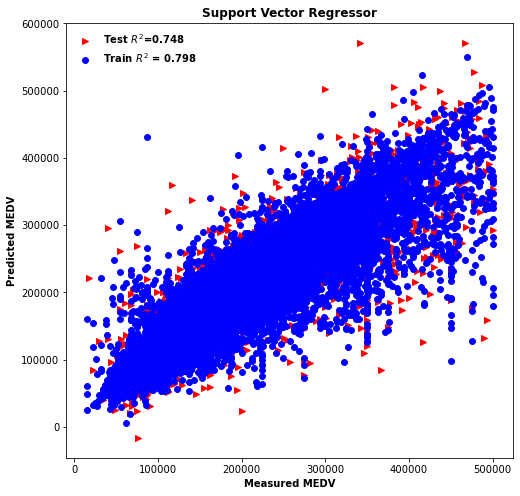

In [248]:
plt.figure(figsize = [8,8])

plt.scatter(y_test_us,y_predict,
            s = 35, 
            color = 'red', 
            marker = '>', 
            label = 'Test $R^{2}$=''%.3f'%r2_score(y_test_us,y_predict),
           alpha = 1)

plt.scatter(y_train_us, y_predict_train,
           s = 35,
           color = 'blue',
           marker = 'o',
           label = 'Train $R^{2}$ = ''%0.3f'%r2_score(y_train_us, y_predict_train),
           alpha = 1)

#plt.xlim(0,60)
#plt.ylim(0,60)
plt.legend(frameon=False,prop={'weight':'bold'})
plt.xlabel('Measured MEDV',fontweight='bold')
plt.ylabel('Predicted MEDV',fontweight='bold')
plt.title('Support Vector Regressor',fontweight='bold')
#plt.axis('square')


plt.show()

In [249]:
consolidated_results.loc[7] = ["Support Vector Regressor",
                              '{:,.0f}'.format(mae),
                              '{:,.0f}'.format(mse),
                              '{:,.0f}'.format(rmse),
                              '{:,.2f}%'.format(r2_train*100),
                              '{:,.2f}%'.format(r2_test*100)]

In [250]:
consolidated_results

Model_Name     MAE            MSE    RMSE R2_Train R2_Test
0                          OLS  45,254  3,820,382,977  61,809   61.13%  61.87%
1                        RIDGE  45,255  3,820,267,465  61,808   61.13%  61.87%
2                        LASSO  45,254  3,820,382,590  61,809   61.13%  61.87%
3                KNN Regressor  38,524  3,147,722,040  56,105   75.13%  68.58%
4      Decision Tree Regressor  40,501  3,461,959,347  58,838   76.31%  65.44%
5      Random Forest Regressor  32,901  2,355,776,953  48,536   96.49%  76.49%
6  Gradient Boosting Regressor  29,797  2,058,940,717  45,376   99.97%  79.45%
7     Support Vector Regressor  33,606  2,525,698,495  50,256   79.81%  74.79%

### Artificial Neural Network 

In [251]:
import math
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam,RMSprop
from tensorflow.keras.layers import Dense, Dropout, InputLayer
from tensorflow.keras.losses import MeanSquaredLogarithmicError, MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError,mean_absolute_error
from tensorflow.keras.optimizers import SGD

In [266]:
def r_square(y_test, y_predtest):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_test - y_predtest)) 
    SS_tot = K.sum(K.square(y_test - K.mean(y_test))) 
    return (1 - (SS_res)/(SS_tot))

In [267]:
from math import sqrt
#Architcture of NN with dropout layer
def create_model():
    model = Sequential()
    model.add(Dense(400, input_dim=12, activation='tanh'))
    model.add(Dropout(0.20))
    model.add(Dense(400, activation='relu'))
    model.add(Dropout(0.20))
    model.add(Dense(400, activation='relu'))
    #model.add(Dropout(0.20))
    model.add(Dense(300, activation='relu'))
    #model.add(Dropout(0.20))
    model.add(Dense(1))
    # Compile model
    sgd = keras.optimizers.Adam(learning_rate=0.01)
    model.compile(loss = tf.keras.losses.MeanSquaredError(), optimizer=sgd, metrics = [r_square])
    return model
#Model is called here
model=create_model()

In [268]:
model_1 = model.fit(X_train.values, # Features
                      y_train.values, # Target vector
                      epochs = 100,
                      verbose = 1,
                      validation_data = (X_test.values,y_test.values)) # Data for evaluation

Epoch 1/100
  8/443 [..............................] - ETA: 3s - loss: 39647264768.0000 - r_square: -3.8182  

2022-08-13 10:38:06.548465: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


443/443 [==============================] - ETA: 0s - loss: 5306999296.0000 - r_square: 0.4052

2022-08-13 10:38:09.915202: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


443/443 [==============================] - 4s 8ms/step - loss: 5306999296.0000 - r_square: 0.4052 - val_loss: 3612019712.0000 - val_r_square: 0.6107
Epoch 2/100
443/443 [==============================] - 3s 8ms/step - loss: 3632973824.0000 - r_square: 0.5891 - val_loss: 3228479488.0000 - val_r_square: 0.6554
Epoch 3/100
443/443 [==============================] - 4s 8ms/step - loss: 3223846912.0000 - r_square: 0.6395 - val_loss: 3227134976.0000 - val_r_square: 0.6479
Epoch 4/100
443/443 [==============================] - 4s 8ms/step - loss: 3096876288.0000 - r_square: 0.6508 - val_loss: 2990811904.0000 - val_r_square: 0.6850
Epoch 5/100
443/443 [==============================] - 4s 8ms/step - loss: 3023905280.0000 - r_square: 0.6598 - val_loss: 3002695424.0000 - val_r_square: 0.6818
Epoch 6/100
443/443 [==============================] - 4s 8ms/step - loss: 2947808256.0000 - r_square: 0.6650 - val_loss: 3070141184.0000 - val_r_square: 0.6806
Epoch 7/100
443/443 [=========================

Epoch 52/100
443/443 [==============================] - 3s 7ms/step - loss: 1990691072.0000 - r_square: 0.7777 - val_loss: 2456782848.0000 - val_r_square: 0.7457
Epoch 53/100
443/443 [==============================] - 3s 8ms/step - loss: 2007504000.0000 - r_square: 0.7751 - val_loss: 2599603200.0000 - val_r_square: 0.7311
Epoch 54/100
443/443 [==============================] - 3s 8ms/step - loss: 1964343168.0000 - r_square: 0.7785 - val_loss: 2623803904.0000 - val_r_square: 0.7277
Epoch 55/100
443/443 [==============================] - 3s 8ms/step - loss: 1968720512.0000 - r_square: 0.7797 - val_loss: 2395451392.0000 - val_r_square: 0.7485
Epoch 56/100
443/443 [==============================] - 3s 8ms/step - loss: 1968003072.0000 - r_square: 0.7763 - val_loss: 2593603584.0000 - val_r_square: 0.7307
Epoch 57/100
443/443 [==============================] - 3s 8ms/step - loss: 1944321152.0000 - r_square: 0.7799 - val_loss: 2475203584.0000 - val_r_square: 0.7383
Epoch 58/100
443/443 [======

In [269]:
y_pred = model.predict(X_test)

2022-08-13 10:44:08.846585: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [265]:
print("Test Score:",r2_score(y_true = y_test,y_pred = y_pred))
print("Train Score:", r2_score(y_true= y_train, y_pred= model.predict(X_train)))

Test Score: 0.7531891621727242
Train Score: 0.8311358107973864


In [270]:
print("Test Score:",r2_score(y_true = y_test,y_pred = y_pred))
print("Train Score:", r2_score(y_true= y_train, y_pred= model.predict(X_train)))

Test Score: 0.7196901704835378
Train Score: 0.8054957559941833


In [263]:
consolidated_results

Model_Name     MAE            MSE    RMSE R2_Train R2_Test
0                          OLS  45,254  3,820,382,977  61,809   61.13%  61.87%
1                        RIDGE  45,255  3,820,267,465  61,808   61.13%  61.87%
2                        LASSO  45,254  3,820,382,590  61,809   61.13%  61.87%
3                KNN Regressor  38,524  3,147,722,040  56,105   75.13%  68.58%
4      Decision Tree Regressor  40,501  3,461,959,347  58,838   76.31%  65.44%
5      Random Forest Regressor  32,901  2,355,776,953  48,536   96.49%  76.49%
6  Gradient Boosting Regressor  29,797  2,058,940,717  45,376   99.97%  79.45%
7     Support Vector Regressor  33,606  2,525,698,495  50,256   79.81%  74.79%

##### Grid Search on the ANN

In [271]:
def create_model(Optimizer_test):
    model = Sequential()
    model.add(Dense(400, input_dim=12, activation='tanh'))
    model.add(Dropout(0.20))
    model.add(Dense(400, activation='relu'))
    model.add(Dropout(0.20))
    model.add(Dense(400, activation='relu'))
    #model.add(Dropout(0.20))
    model.add(Dense(300, activation='relu'))
    #model.add(Dropout(0.20))
    model.add(Dense(1))
    # Compile model
    sgd = keras.optimizers.Adam(learning_rate=0.01)
    model.compile(loss = tf.keras.losses.MeanSquaredError(), optimizer=Optimizer_test, metrics = [r_square])
    return model

In [299]:
tuned_parameters = {'batch_size':[32],
                   'epochs':[500],
                   'Optimizer_test':['adam','rmsprop','sgd']}
tune_parameters_1 = {'batch_size':[100],
                    'epochs':[20],
                    'Optimizer_test':['adam']}

In [300]:
from sklearn.metrics import make_scorer

In [301]:
my_scoring = make_scorer(r_square,greater_is_better=True)

In [302]:
from keras.wrappers.scikit_learn import KerasRegressor

In [303]:
RegModelANN = KerasRegressor(create_model, verbose = 0)

/var/folders/_2/wkdg5x312kv10z8lrkqv6s980000gn/T/ipykernel_4671/535905774.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  RegModelANN = KerasRegressor(create_model, verbose = 0)


In [304]:
gridsearchANN = GridSearchCV(estimator = RegModelANN,
                            param_grid = tuned_parameters,
                            scoring = my_scoring,
                            cv = 10)

In [305]:
import time
StartTime = time.time()
gridsearchANN.fit(X_train.values, y_train.values,verbose = 1)
EndTime = time.time()

Epoch 1/500


2022-08-14 09:34:47.078630: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


399/399 [==============================] - 4s 8ms/step - loss: 11491643392.0000 - r_square: -0.3195
Epoch 2/500
399/399 [==============================] - 3s 7ms/step - loss: 3568809472.0000 - r_square: 0.6013
Epoch 3/500
399/399 [==============================] - 3s 7ms/step - loss: 3411654656.0000 - r_square: 0.6187
Epoch 4/500
399/399 [==============================] - 3s 7ms/step - loss: 3303435776.0000 - r_square: 0.6260
Epoch 5/500
399/399 [==============================] - 3s 7ms/step - loss: 3225092864.0000 - r_square: 0.6421
Epoch 6/500
399/399 [==============================] - 3s 7ms/step - loss: 3139577088.0000 - r_square: 0.6505
Epoch 7/500
399/399 [==============================] - 3s 7ms/step - loss: 3099228416.0000 - r_square: 0.6525
Epoch 8/500
399/399 [==============================] - 3s 7ms/step - loss: 3063159040.0000 - r_square: 0.6562
Epoch 9/500
399/399 [==============================] - 3s 7ms/step - loss: 3039622144.0000 - r_square: 0.6587
Epoch 10/500
399/399

Epoch 75/500
399/399 [==============================] - 3s 7ms/step - loss: 2267556096.0000 - r_square: 0.7470
Epoch 76/500
399/399 [==============================] - 3s 7ms/step - loss: 2254938624.0000 - r_square: 0.7486
Epoch 77/500
399/399 [==============================] - 3s 7ms/step - loss: 2257449216.0000 - r_square: 0.7487
Epoch 78/500
399/399 [==============================] - 3s 7ms/step - loss: 2238822144.0000 - r_square: 0.7510
Epoch 79/500
399/399 [==============================] - 3s 7ms/step - loss: 2223071232.0000 - r_square: 0.7469
Epoch 80/500
399/399 [==============================] - 3s 7ms/step - loss: 2222797056.0000 - r_square: 0.7506
Epoch 81/500
399/399 [==============================] - 3s 7ms/step - loss: 2200802304.0000 - r_square: 0.7521
Epoch 82/500
399/399 [==============================] - 3s 7ms/step - loss: 2192260096.0000 - r_square: 0.7563
Epoch 83/500
399/399 [==============================] - 3s 7ms/step - loss: 2195412224.0000 - r_square: 0.7522
E

399/399 [==============================] - 3s 7ms/step - loss: 1868574080.0000 - r_square: 0.7885
Epoch 149/500
399/399 [==============================] - 3s 7ms/step - loss: 1847935744.0000 - r_square: 0.7936
Epoch 150/500
399/399 [==============================] - 3s 7ms/step - loss: 1854565632.0000 - r_square: 0.7908
Epoch 151/500
399/399 [==============================] - 3s 7ms/step - loss: 1868552192.0000 - r_square: 0.7901
Epoch 152/500
399/399 [==============================] - 3s 7ms/step - loss: 1866692992.0000 - r_square: 0.7908
Epoch 153/500
399/399 [==============================] - 3s 7ms/step - loss: 1858863616.0000 - r_square: 0.7915
Epoch 154/500
399/399 [==============================] - 3s 7ms/step - loss: 1853023104.0000 - r_square: 0.7945
Epoch 155/500
399/399 [==============================] - 3s 7ms/step - loss: 1832864384.0000 - r_square: 0.7947
Epoch 156/500
399/399 [==============================] - 3s 7ms/step - loss: 1856546176.0000 - r_square: 0.7926
Epoch 

399/399 [==============================] - 3s 7ms/step - loss: 1617736832.0000 - r_square: 0.8180
Epoch 222/500
399/399 [==============================] - 3s 7ms/step - loss: 1628601344.0000 - r_square: 0.8156
Epoch 223/500
399/399 [==============================] - 3s 7ms/step - loss: 1602376192.0000 - r_square: 0.8189
Epoch 224/500
399/399 [==============================] - 3s 7ms/step - loss: 1586984832.0000 - r_square: 0.8231
Epoch 225/500
399/399 [==============================] - 3s 7ms/step - loss: 1617285504.0000 - r_square: 0.8189
Epoch 226/500
399/399 [==============================] - 3s 7ms/step - loss: 1602701568.0000 - r_square: 0.8187
Epoch 227/500
399/399 [==============================] - 3s 7ms/step - loss: 1596955264.0000 - r_square: 0.8205
Epoch 228/500
399/399 [==============================] - 3s 7ms/step - loss: 1583144192.0000 - r_square: 0.8223
Epoch 229/500
399/399 [==============================] - 3s 7ms/step - loss: 1591746944.0000 - r_square: 0.8171
Epoch 

399/399 [==============================] - 3s 7ms/step - loss: 1370262144.0000 - r_square: 0.8443
Epoch 295/500
399/399 [==============================] - 3s 7ms/step - loss: 1386378240.0000 - r_square: 0.8418
Epoch 296/500
399/399 [==============================] - 3s 7ms/step - loss: 1372946816.0000 - r_square: 0.8444
Epoch 297/500
399/399 [==============================] - 3s 7ms/step - loss: 1392105600.0000 - r_square: 0.8423
Epoch 298/500
399/399 [==============================] - 3s 7ms/step - loss: 1369125120.0000 - r_square: 0.8467
Epoch 299/500
399/399 [==============================] - 3s 7ms/step - loss: 1352444288.0000 - r_square: 0.8473
Epoch 300/500
399/399 [==============================] - 3s 7ms/step - loss: 1374493696.0000 - r_square: 0.8445
Epoch 301/500
399/399 [==============================] - 3s 7ms/step - loss: 1378524800.0000 - r_square: 0.8442
Epoch 302/500
399/399 [==============================] - 3s 7ms/step - loss: 1332174208.0000 - r_square: 0.8504
Epoch 

399/399 [==============================] - 3s 7ms/step - loss: 1153714816.0000 - r_square: 0.8669
Epoch 368/500
399/399 [==============================] - 3s 7ms/step - loss: 1167695744.0000 - r_square: 0.8656
Epoch 369/500
399/399 [==============================] - 3s 7ms/step - loss: 1157514752.0000 - r_square: 0.8694
Epoch 370/500
399/399 [==============================] - 3s 8ms/step - loss: 1159643520.0000 - r_square: 0.8692
Epoch 371/500
399/399 [==============================] - 3s 7ms/step - loss: 1172958336.0000 - r_square: 0.8668
Epoch 372/500
399/399 [==============================] - 3s 7ms/step - loss: 1161727232.0000 - r_square: 0.8688
Epoch 373/500
399/399 [==============================] - 3s 7ms/step - loss: 1149745920.0000 - r_square: 0.8703
Epoch 374/500
399/399 [==============================] - 3s 7ms/step - loss: 1150110848.0000 - r_square: 0.8687
Epoch 375/500
399/399 [==============================] - 3s 7ms/step - loss: 1153245568.0000 - r_square: 0.8681
Epoch 

399/399 [==============================] - 3s 7ms/step - loss: 974130304.0000 - r_square: 0.8881
Epoch 441/500
399/399 [==============================] - 3s 7ms/step - loss: 954962432.0000 - r_square: 0.8917
Epoch 442/500
399/399 [==============================] - 3s 7ms/step - loss: 980108544.0000 - r_square: 0.8877
Epoch 443/500
399/399 [==============================] - 3s 7ms/step - loss: 954397632.0000 - r_square: 0.8927
Epoch 444/500
399/399 [==============================] - 3s 7ms/step - loss: 948102080.0000 - r_square: 0.8903
Epoch 445/500
399/399 [==============================] - 3s 7ms/step - loss: 965081984.0000 - r_square: 0.8897
Epoch 446/500
399/399 [==============================] - 3s 7ms/step - loss: 935719936.0000 - r_square: 0.8935
Epoch 447/500
399/399 [==============================] - 3s 7ms/step - loss: 964445248.0000 - r_square: 0.8918
Epoch 448/500
399/399 [==============================] - 3s 7ms/step - loss: 936185536.0000 - r_square: 0.8929
Epoch 449/500
3

2022-08-14 09:57:41.867149: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/500


2022-08-14 09:57:42.474409: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


399/399 [==============================] - 3s 7ms/step - loss: 11636334592.0000 - r_square: -0.3059
Epoch 2/500
399/399 [==============================] - 3s 7ms/step - loss: 3593862400.0000 - r_square: 0.5996
Epoch 3/500
399/399 [==============================] - 3s 7ms/step - loss: 3409568512.0000 - r_square: 0.6194
Epoch 4/500
399/399 [==============================] - 3s 7ms/step - loss: 3274820096.0000 - r_square: 0.6348
Epoch 5/500
399/399 [==============================] - 3s 7ms/step - loss: 3169915392.0000 - r_square: 0.6409
Epoch 6/500
399/399 [==============================] - 3s 7ms/step - loss: 3107577344.0000 - r_square: 0.6521
Epoch 7/500
399/399 [==============================] - 3s 7ms/step - loss: 3064017920.0000 - r_square: 0.6522
Epoch 8/500
399/399 [==============================] - 3s 7ms/step - loss: 3004628736.0000 - r_square: 0.6670
Epoch 9/500
399/399 [==============================] - 3s 7ms/step - loss: 2991818240.0000 - r_square: 0.6568
Epoch 10/500
399/399

Epoch 75/500
399/399 [==============================] - 3s 7ms/step - loss: 2250177280.0000 - r_square: 0.7474
Epoch 76/500
399/399 [==============================] - 3s 7ms/step - loss: 2255993088.0000 - r_square: 0.7488
Epoch 77/500
399/399 [==============================] - 3s 7ms/step - loss: 2259011840.0000 - r_square: 0.7438
Epoch 78/500
399/399 [==============================] - 3s 7ms/step - loss: 2238365952.0000 - r_square: 0.7486
Epoch 79/500
399/399 [==============================] - 3s 7ms/step - loss: 2237364480.0000 - r_square: 0.7505
Epoch 80/500
399/399 [==============================] - 3s 7ms/step - loss: 2213081344.0000 - r_square: 0.7550
Epoch 81/500
399/399 [==============================] - 3s 7ms/step - loss: 2205644544.0000 - r_square: 0.7521
Epoch 82/500
399/399 [==============================] - 3s 7ms/step - loss: 2218526976.0000 - r_square: 0.7523
Epoch 83/500
399/399 [==============================] - 3s 7ms/step - loss: 2208541952.0000 - r_square: 0.7511
E

399/399 [==============================] - 3s 7ms/step - loss: 1881954816.0000 - r_square: 0.7872
Epoch 149/500
399/399 [==============================] - 3s 7ms/step - loss: 1894363904.0000 - r_square: 0.7885
Epoch 150/500
399/399 [==============================] - 3s 7ms/step - loss: 1880649728.0000 - r_square: 0.7875
Epoch 151/500
399/399 [==============================] - 3s 7ms/step - loss: 1864935680.0000 - r_square: 0.7818
Epoch 152/500
399/399 [==============================] - 3s 7ms/step - loss: 1873084416.0000 - r_square: 0.7876
Epoch 153/500
399/399 [==============================] - 3s 7ms/step - loss: 1862819712.0000 - r_square: 0.7871
Epoch 154/500
399/399 [==============================] - 3s 7ms/step - loss: 1869941248.0000 - r_square: 0.7882
Epoch 155/500
399/399 [==============================] - 3s 7ms/step - loss: 1848701696.0000 - r_square: 0.7923
Epoch 156/500
399/399 [==============================] - 3s 7ms/step - loss: 1859256192.0000 - r_square: 0.7917
Epoch 

399/399 [==============================] - 3s 7ms/step - loss: 1646128128.0000 - r_square: 0.8147
Epoch 222/500
399/399 [==============================] - 3s 7ms/step - loss: 1647392128.0000 - r_square: 0.8139
Epoch 223/500
399/399 [==============================] - 3s 7ms/step - loss: 1652437760.0000 - r_square: 0.8128
Epoch 224/500
399/399 [==============================] - 3s 7ms/step - loss: 1627506944.0000 - r_square: 0.8160
Epoch 225/500
399/399 [==============================] - 3s 7ms/step - loss: 1618859136.0000 - r_square: 0.8171
Epoch 226/500
399/399 [==============================] - 3s 7ms/step - loss: 1619307264.0000 - r_square: 0.8151
Epoch 227/500
399/399 [==============================] - 3s 7ms/step - loss: 1618026368.0000 - r_square: 0.8169
Epoch 228/500
399/399 [==============================] - 3s 7ms/step - loss: 1627920128.0000 - r_square: 0.8149
Epoch 229/500
399/399 [==============================] - 3s 7ms/step - loss: 1616307456.0000 - r_square: 0.8155
Epoch 

399/399 [==============================] - 3s 7ms/step - loss: 1410352256.0000 - r_square: 0.8401
Epoch 295/500
399/399 [==============================] - 3s 7ms/step - loss: 1427394176.0000 - r_square: 0.8370
Epoch 296/500
399/399 [==============================] - 3s 7ms/step - loss: 1402134656.0000 - r_square: 0.8381
Epoch 297/500
399/399 [==============================] - 3s 7ms/step - loss: 1409206016.0000 - r_square: 0.8371
Epoch 298/500
399/399 [==============================] - 3s 7ms/step - loss: 1401758464.0000 - r_square: 0.8402
Epoch 299/500
399/399 [==============================] - 3s 7ms/step - loss: 1396744960.0000 - r_square: 0.8408
Epoch 300/500
399/399 [==============================] - 3s 7ms/step - loss: 1404660864.0000 - r_square: 0.8423
Epoch 301/500
399/399 [==============================] - 3s 7ms/step - loss: 1377705856.0000 - r_square: 0.8451
Epoch 302/500
399/399 [==============================] - 3s 7ms/step - loss: 1381161088.0000 - r_square: 0.8439
Epoch 

399/399 [==============================] - 3s 7ms/step - loss: 1182039808.0000 - r_square: 0.8648
Epoch 368/500
399/399 [==============================] - 3s 7ms/step - loss: 1197087104.0000 - r_square: 0.8629
Epoch 369/500
399/399 [==============================] - 3s 7ms/step - loss: 1190259712.0000 - r_square: 0.8629
Epoch 370/500
399/399 [==============================] - 3s 7ms/step - loss: 1213029888.0000 - r_square: 0.8602
Epoch 371/500
399/399 [==============================] - 3s 7ms/step - loss: 1167844992.0000 - r_square: 0.8674
Epoch 372/500
399/399 [==============================] - 3s 7ms/step - loss: 1160299904.0000 - r_square: 0.8673
Epoch 373/500
399/399 [==============================] - 3s 7ms/step - loss: 1186315904.0000 - r_square: 0.8633
Epoch 374/500
399/399 [==============================] - 3s 7ms/step - loss: 1166256640.0000 - r_square: 0.8611
Epoch 375/500
399/399 [==============================] - 3s 7ms/step - loss: 1171173248.0000 - r_square: 0.8666
Epoch 

399/399 [==============================] - 3s 7ms/step - loss: 986523904.0000 - r_square: 0.8860
Epoch 441/500
399/399 [==============================] - 3s 7ms/step - loss: 978487616.0000 - r_square: 0.8871
Epoch 442/500
399/399 [==============================] - 3s 8ms/step - loss: 981835328.0000 - r_square: 0.8859
Epoch 443/500
399/399 [==============================] - 3s 8ms/step - loss: 968426688.0000 - r_square: 0.8905
Epoch 444/500
399/399 [==============================] - 3s 8ms/step - loss: 988300096.0000 - r_square: 0.8873
Epoch 445/500
399/399 [==============================] - 3s 7ms/step - loss: 981412032.0000 - r_square: 0.8883
Epoch 446/500
399/399 [==============================] - 3s 7ms/step - loss: 969930176.0000 - r_square: 0.8877
Epoch 447/500
399/399 [==============================] - 3s 7ms/step - loss: 974216704.0000 - r_square: 0.8881
Epoch 448/500
399/399 [==============================] - 3s 7ms/step - loss: 965333888.0000 - r_square: 0.8897
Epoch 449/500
3

2022-08-14 10:20:22.835876: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/500


2022-08-14 10:20:23.297265: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


399/399 [==============================] - 3s 7ms/step - loss: 11556824064.0000 - r_square: -0.3300
Epoch 2/500
399/399 [==============================] - 3s 7ms/step - loss: 3580108288.0000 - r_square: 0.5981
Epoch 3/500
399/399 [==============================] - 3s 7ms/step - loss: 3417572352.0000 - r_square: 0.6164
Epoch 4/500
399/399 [==============================] - 3s 6ms/step - loss: 3303016448.0000 - r_square: 0.6299
Epoch 5/500
399/399 [==============================] - 3s 6ms/step - loss: 3228557568.0000 - r_square: 0.6379
Epoch 6/500
399/399 [==============================] - 3s 7ms/step - loss: 3152456448.0000 - r_square: 0.6411
Epoch 7/500
399/399 [==============================] - 3s 7ms/step - loss: 3102700544.0000 - r_square: 0.6546
Epoch 8/500
399/399 [==============================] - 3s 7ms/step - loss: 3080804352.0000 - r_square: 0.6431
Epoch 9/500
399/399 [==============================] - 3s 7ms/step - loss: 3041574912.0000 - r_square: 0.6578
Epoch 10/500
399/399

Epoch 75/500
399/399 [==============================] - 3s 7ms/step - loss: 2291575808.0000 - r_square: 0.7407
Epoch 76/500
399/399 [==============================] - 3s 7ms/step - loss: 2270268416.0000 - r_square: 0.7467
Epoch 77/500
399/399 [==============================] - 3s 7ms/step - loss: 2249088512.0000 - r_square: 0.7433
Epoch 78/500
399/399 [==============================] - 3s 7ms/step - loss: 2284060416.0000 - r_square: 0.7453
Epoch 79/500
399/399 [==============================] - 3s 7ms/step - loss: 2245681664.0000 - r_square: 0.7466
Epoch 80/500
399/399 [==============================] - 3s 7ms/step - loss: 2258276864.0000 - r_square: 0.7444
Epoch 81/500
399/399 [==============================] - 3s 7ms/step - loss: 2250331392.0000 - r_square: 0.7430
Epoch 82/500
399/399 [==============================] - 3s 7ms/step - loss: 2235342848.0000 - r_square: 0.7487
Epoch 83/500
399/399 [==============================] - 3s 7ms/step - loss: 2221313792.0000 - r_square: 0.7528
E

399/399 [==============================] - 3s 7ms/step - loss: 1886534400.0000 - r_square: 0.7872
Epoch 149/500
399/399 [==============================] - 3s 7ms/step - loss: 1889141120.0000 - r_square: 0.7859
Epoch 150/500
399/399 [==============================] - 3s 6ms/step - loss: 1877951232.0000 - r_square: 0.7873
Epoch 151/500
399/399 [==============================] - 3s 7ms/step - loss: 1883144576.0000 - r_square: 0.7899
Epoch 152/500
399/399 [==============================] - 3s 7ms/step - loss: 1886649472.0000 - r_square: 0.7885
Epoch 153/500
399/399 [==============================] - 3s 7ms/step - loss: 1859922560.0000 - r_square: 0.7855
Epoch 154/500
399/399 [==============================] - 3s 7ms/step - loss: 1861015168.0000 - r_square: 0.7888
Epoch 155/500
399/399 [==============================] - 3s 7ms/step - loss: 1867376128.0000 - r_square: 0.7899
Epoch 156/500
399/399 [==============================] - 3s 7ms/step - loss: 1857934720.0000 - r_square: 0.7919
Epoch 

399/399 [==============================] - 3s 7ms/step - loss: 1679374592.0000 - r_square: 0.8127
Epoch 222/500
399/399 [==============================] - 3s 7ms/step - loss: 1646048128.0000 - r_square: 0.8151
Epoch 223/500
399/399 [==============================] - 3s 7ms/step - loss: 1634802432.0000 - r_square: 0.8144
Epoch 224/500
399/399 [==============================] - 3s 7ms/step - loss: 1639446784.0000 - r_square: 0.8143
Epoch 225/500
399/399 [==============================] - 3s 7ms/step - loss: 1635352192.0000 - r_square: 0.8107
Epoch 226/500
399/399 [==============================] - 3s 7ms/step - loss: 1645098496.0000 - r_square: 0.8083
Epoch 227/500
399/399 [==============================] - 3s 7ms/step - loss: 1643319168.0000 - r_square: 0.8156
Epoch 228/500
399/399 [==============================] - 3s 7ms/step - loss: 1640342016.0000 - r_square: 0.8152
Epoch 229/500
399/399 [==============================] - 3s 6ms/step - loss: 1636423040.0000 - r_square: 0.8153
Epoch 

399/399 [==============================] - 3s 7ms/step - loss: 1452888832.0000 - r_square: 0.8349
Epoch 295/500
399/399 [==============================] - 3s 7ms/step - loss: 1432291584.0000 - r_square: 0.8369
Epoch 296/500
399/399 [==============================] - 3s 7ms/step - loss: 1440108928.0000 - r_square: 0.8355
Epoch 297/500
399/399 [==============================] - 3s 7ms/step - loss: 1438134016.0000 - r_square: 0.8379
Epoch 298/500
399/399 [==============================] - 3s 7ms/step - loss: 1431307136.0000 - r_square: 0.8381
Epoch 299/500
399/399 [==============================] - 3s 7ms/step - loss: 1430273280.0000 - r_square: 0.8370
Epoch 300/500
399/399 [==============================] - 3s 7ms/step - loss: 1430442752.0000 - r_square: 0.8343
Epoch 301/500
399/399 [==============================] - 3s 7ms/step - loss: 1415123584.0000 - r_square: 0.8409
Epoch 302/500
399/399 [==============================] - 3s 7ms/step - loss: 1421218688.0000 - r_square: 0.8378
Epoch 

399/399 [==============================] - 3s 7ms/step - loss: 1235476352.0000 - r_square: 0.8609
Epoch 368/500
399/399 [==============================] - 3s 7ms/step - loss: 1212704384.0000 - r_square: 0.8620
Epoch 369/500
399/399 [==============================] - 3s 7ms/step - loss: 1219839616.0000 - r_square: 0.8619
Epoch 370/500
399/399 [==============================] - 3s 7ms/step - loss: 1236494208.0000 - r_square: 0.8578
Epoch 371/500
399/399 [==============================] - 3s 7ms/step - loss: 1222732288.0000 - r_square: 0.8593
Epoch 372/500
399/399 [==============================] - 3s 7ms/step - loss: 1201957888.0000 - r_square: 0.8634
Epoch 373/500
399/399 [==============================] - 3s 7ms/step - loss: 1211362176.0000 - r_square: 0.8617
Epoch 374/500
399/399 [==============================] - 3s 7ms/step - loss: 1214422016.0000 - r_square: 0.8611
Epoch 375/500
399/399 [==============================] - 3s 7ms/step - loss: 1193605888.0000 - r_square: 0.8644
Epoch 

399/399 [==============================] - 3s 7ms/step - loss: 988572736.0000 - r_square: 0.8878
Epoch 441/500
399/399 [==============================] - 3s 7ms/step - loss: 1008978944.0000 - r_square: 0.8838
Epoch 442/500
399/399 [==============================] - 3s 7ms/step - loss: 1002898368.0000 - r_square: 0.8846
Epoch 443/500
399/399 [==============================] - 3s 7ms/step - loss: 1014458880.0000 - r_square: 0.8845
Epoch 444/500
399/399 [==============================] - 3s 7ms/step - loss: 987273728.0000 - r_square: 0.8862
Epoch 445/500
399/399 [==============================] - 3s 7ms/step - loss: 993150656.0000 - r_square: 0.8856
Epoch 446/500
399/399 [==============================] - 3s 7ms/step - loss: 1001945728.0000 - r_square: 0.8863
Epoch 447/500
399/399 [==============================] - 3s 6ms/step - loss: 1014363136.0000 - r_square: 0.8842
Epoch 448/500
399/399 [==============================] - 3s 7ms/step - loss: 966235904.0000 - r_square: 0.8888
Epoch 449/

2022-08-14 10:42:29.007001: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/500


2022-08-14 10:42:29.451673: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


399/399 [==============================] - 3s 7ms/step - loss: 11851170816.0000 - r_square: -0.3085
Epoch 2/500
399/399 [==============================] - 3s 7ms/step - loss: 3576434432.0000 - r_square: 0.6016
Epoch 3/500
399/399 [==============================] - 3s 7ms/step - loss: 3378280192.0000 - r_square: 0.6175
Epoch 4/500
399/399 [==============================] - 3s 6ms/step - loss: 3259628800.0000 - r_square: 0.6375
Epoch 5/500
399/399 [==============================] - 3s 7ms/step - loss: 3159431168.0000 - r_square: 0.6498
Epoch 6/500
399/399 [==============================] - 3s 7ms/step - loss: 3106455552.0000 - r_square: 0.6534
Epoch 7/500
399/399 [==============================] - 3s 7ms/step - loss: 3056421376.0000 - r_square: 0.6552
Epoch 8/500
399/399 [==============================] - 3s 7ms/step - loss: 2997683712.0000 - r_square: 0.6667
Epoch 9/500
399/399 [==============================] - 3s 7ms/step - loss: 2992371456.0000 - r_square: 0.6639
Epoch 10/500
399/399

Epoch 75/500
399/399 [==============================] - 3s 7ms/step - loss: 2269901056.0000 - r_square: 0.7446
Epoch 76/500
399/399 [==============================] - 3s 7ms/step - loss: 2270652160.0000 - r_square: 0.7434
Epoch 77/500
399/399 [==============================] - 3s 7ms/step - loss: 2253471232.0000 - r_square: 0.7479
Epoch 78/500
399/399 [==============================] - 3s 7ms/step - loss: 2247124480.0000 - r_square: 0.7459
Epoch 79/500
399/399 [==============================] - 3s 7ms/step - loss: 2245052160.0000 - r_square: 0.7486
Epoch 80/500
399/399 [==============================] - 3s 7ms/step - loss: 2236867328.0000 - r_square: 0.7525
Epoch 81/500
399/399 [==============================] - 3s 7ms/step - loss: 2235030784.0000 - r_square: 0.7502
Epoch 82/500
399/399 [==============================] - 3s 7ms/step - loss: 2222133760.0000 - r_square: 0.7528
Epoch 83/500
399/399 [==============================] - 3s 7ms/step - loss: 2215111424.0000 - r_square: 0.7537
E

399/399 [==============================] - 3s 6ms/step - loss: 1875977088.0000 - r_square: 0.7912
Epoch 149/500
399/399 [==============================] - 3s 7ms/step - loss: 1837173120.0000 - r_square: 0.7931
Epoch 150/500
399/399 [==============================] - 3s 7ms/step - loss: 1859609984.0000 - r_square: 0.7922
Epoch 151/500
399/399 [==============================] - 3s 7ms/step - loss: 1857814400.0000 - r_square: 0.7935
Epoch 152/500
399/399 [==============================] - 3s 7ms/step - loss: 1840020480.0000 - r_square: 0.7939
Epoch 153/500
399/399 [==============================] - 3s 7ms/step - loss: 1826739968.0000 - r_square: 0.7972
Epoch 154/500
399/399 [==============================] - 3s 7ms/step - loss: 1829530624.0000 - r_square: 0.7946
Epoch 155/500
399/399 [==============================] - 3s 7ms/step - loss: 1831186176.0000 - r_square: 0.7934
Epoch 156/500
399/399 [==============================] - 3s 7ms/step - loss: 1843018496.0000 - r_square: 0.7924
Epoch 

399/399 [==============================] - 3s 7ms/step - loss: 1601297408.0000 - r_square: 0.8200
Epoch 222/500
399/399 [==============================] - 3s 7ms/step - loss: 1602790656.0000 - r_square: 0.8218
Epoch 223/500
399/399 [==============================] - 3s 7ms/step - loss: 1615459968.0000 - r_square: 0.8204
Epoch 224/500
399/399 [==============================] - 3s 7ms/step - loss: 1607948800.0000 - r_square: 0.8186
Epoch 225/500
399/399 [==============================] - 3s 7ms/step - loss: 1597288448.0000 - r_square: 0.8209
Epoch 226/500
399/399 [==============================] - 3s 7ms/step - loss: 1587655168.0000 - r_square: 0.8202
Epoch 227/500
399/399 [==============================] - 3s 7ms/step - loss: 1593394304.0000 - r_square: 0.8205
Epoch 228/500
399/399 [==============================] - 3s 7ms/step - loss: 1568669312.0000 - r_square: 0.8252
Epoch 229/500
399/399 [==============================] - 3s 7ms/step - loss: 1553469184.0000 - r_square: 0.8245
Epoch 

399/399 [==============================] - 3s 7ms/step - loss: 1352588288.0000 - r_square: 0.8476
Epoch 295/500
399/399 [==============================] - 3s 7ms/step - loss: 1365958528.0000 - r_square: 0.8446
Epoch 296/500
399/399 [==============================] - 3s 7ms/step - loss: 1354781056.0000 - r_square: 0.8472
Epoch 297/500
399/399 [==============================] - 3s 7ms/step - loss: 1351211136.0000 - r_square: 0.8477
Epoch 298/500
399/399 [==============================] - 3s 7ms/step - loss: 1340858368.0000 - r_square: 0.8484
Epoch 299/500
399/399 [==============================] - 3s 7ms/step - loss: 1320356352.0000 - r_square: 0.8514
Epoch 300/500
399/399 [==============================] - 3s 7ms/step - loss: 1326220288.0000 - r_square: 0.8508
Epoch 301/500
399/399 [==============================] - 3s 7ms/step - loss: 1316801280.0000 - r_square: 0.8506
Epoch 302/500
399/399 [==============================] - 3s 7ms/step - loss: 1330492544.0000 - r_square: 0.8490
Epoch 

399/399 [==============================] - 3s 7ms/step - loss: 1082777344.0000 - r_square: 0.8774
Epoch 368/500
399/399 [==============================] - 3s 7ms/step - loss: 1101219840.0000 - r_square: 0.8733
Epoch 369/500
399/399 [==============================] - 3s 7ms/step - loss: 1094912512.0000 - r_square: 0.8736
Epoch 370/500
399/399 [==============================] - 3s 7ms/step - loss: 1100046592.0000 - r_square: 0.8738
Epoch 371/500
399/399 [==============================] - 3s 7ms/step - loss: 1077683328.0000 - r_square: 0.8754
Epoch 372/500
399/399 [==============================] - 3s 7ms/step - loss: 1074985216.0000 - r_square: 0.8789
Epoch 373/500
399/399 [==============================] - 3s 7ms/step - loss: 1083193856.0000 - r_square: 0.8779
Epoch 374/500
399/399 [==============================] - 3s 7ms/step - loss: 1083370624.0000 - r_square: 0.8767
Epoch 375/500
399/399 [==============================] - 3s 7ms/step - loss: 1068109376.0000 - r_square: 0.8782
Epoch 

399/399 [==============================] - 3s 7ms/step - loss: 909039808.0000 - r_square: 0.8963
Epoch 441/500
399/399 [==============================] - 3s 7ms/step - loss: 906477952.0000 - r_square: 0.8974
Epoch 442/500
399/399 [==============================] - 3s 7ms/step - loss: 909100864.0000 - r_square: 0.8955
Epoch 443/500
399/399 [==============================] - 3s 7ms/step - loss: 875921152.0000 - r_square: 0.8998
Epoch 444/500
399/399 [==============================] - 3s 7ms/step - loss: 887374912.0000 - r_square: 0.8977
Epoch 445/500
399/399 [==============================] - 3s 7ms/step - loss: 883648768.0000 - r_square: 0.8989
Epoch 446/500
399/399 [==============================] - 3s 7ms/step - loss: 876434688.0000 - r_square: 0.8997
Epoch 447/500
399/399 [==============================] - 3s 7ms/step - loss: 861383232.0000 - r_square: 0.9009
Epoch 448/500
399/399 [==============================] - 3s 7ms/step - loss: 894253568.0000 - r_square: 0.8925
Epoch 449/500
3

2022-08-14 11:04:38.318378: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/500


2022-08-14 11:04:38.747853: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


399/399 [==============================] - 3s 7ms/step - loss: 11777784832.0000 - r_square: -0.3138
Epoch 2/500
399/399 [==============================] - 3s 7ms/step - loss: 3602919680.0000 - r_square: 0.5880
Epoch 3/500
399/399 [==============================] - 3s 7ms/step - loss: 3414282496.0000 - r_square: 0.6189
Epoch 4/500
399/399 [==============================] - 3s 7ms/step - loss: 3329057280.0000 - r_square: 0.6261
Epoch 5/500
399/399 [==============================] - 3s 7ms/step - loss: 3237333760.0000 - r_square: 0.6337
Epoch 6/500
399/399 [==============================] - 3s 7ms/step - loss: 3185197824.0000 - r_square: 0.6429
Epoch 7/500
399/399 [==============================] - 3s 7ms/step - loss: 3098477568.0000 - r_square: 0.6547
Epoch 8/500
399/399 [==============================] - 3s 7ms/step - loss: 3106353408.0000 - r_square: 0.6532
Epoch 9/500
399/399 [==============================] - 3s 7ms/step - loss: 3021184256.0000 - r_square: 0.6581
Epoch 10/500
399/399

Epoch 75/500
399/399 [==============================] - 3s 7ms/step - loss: 2257574656.0000 - r_square: 0.7480
Epoch 76/500
399/399 [==============================] - 3s 7ms/step - loss: 2241135616.0000 - r_square: 0.7479
Epoch 77/500
399/399 [==============================] - 3s 7ms/step - loss: 2233786112.0000 - r_square: 0.7497
Epoch 78/500
399/399 [==============================] - 3s 7ms/step - loss: 2213573376.0000 - r_square: 0.7492
Epoch 79/500
399/399 [==============================] - 3s 7ms/step - loss: 2231599872.0000 - r_square: 0.7503
Epoch 80/500
399/399 [==============================] - 3s 7ms/step - loss: 2209567488.0000 - r_square: 0.7497
Epoch 81/500
399/399 [==============================] - 3s 7ms/step - loss: 2205458944.0000 - r_square: 0.7531
Epoch 82/500
399/399 [==============================] - 3s 7ms/step - loss: 2215404544.0000 - r_square: 0.7514
Epoch 83/500
399/399 [==============================] - 3s 7ms/step - loss: 2200980224.0000 - r_square: 0.7542
E

399/399 [==============================] - 3s 7ms/step - loss: 1880196864.0000 - r_square: 0.7894
Epoch 149/500
399/399 [==============================] - 3s 7ms/step - loss: 1881075200.0000 - r_square: 0.7888
Epoch 150/500
399/399 [==============================] - 3s 7ms/step - loss: 1886487552.0000 - r_square: 0.7869
Epoch 151/500
399/399 [==============================] - 3s 7ms/step - loss: 1880737536.0000 - r_square: 0.7874
Epoch 152/500
399/399 [==============================] - 3s 7ms/step - loss: 1871007872.0000 - r_square: 0.7876
Epoch 153/500
399/399 [==============================] - 3s 7ms/step - loss: 1869372544.0000 - r_square: 0.7905
Epoch 154/500
399/399 [==============================] - 3s 7ms/step - loss: 1878651904.0000 - r_square: 0.7867
Epoch 155/500
399/399 [==============================] - 3s 7ms/step - loss: 1839982336.0000 - r_square: 0.7948
Epoch 156/500
399/399 [==============================] - 3s 7ms/step - loss: 1841298304.0000 - r_square: 0.7915
Epoch 

399/399 [==============================] - 3s 7ms/step - loss: 1673612672.0000 - r_square: 0.8104
Epoch 222/500
399/399 [==============================] - 3s 7ms/step - loss: 1636155264.0000 - r_square: 0.8143
Epoch 223/500
399/399 [==============================] - 3s 7ms/step - loss: 1635864320.0000 - r_square: 0.8149
Epoch 224/500
399/399 [==============================] - 3s 7ms/step - loss: 1674942976.0000 - r_square: 0.8102
Epoch 225/500
399/399 [==============================] - 3s 7ms/step - loss: 1631918208.0000 - r_square: 0.8136
Epoch 226/500
399/399 [==============================] - 3s 7ms/step - loss: 1629466368.0000 - r_square: 0.8162
Epoch 227/500
399/399 [==============================] - 3s 7ms/step - loss: 1652432640.0000 - r_square: 0.8137
Epoch 228/500
399/399 [==============================] - 3s 7ms/step - loss: 1624795136.0000 - r_square: 0.8168
Epoch 229/500
399/399 [==============================] - 3s 7ms/step - loss: 1609198464.0000 - r_square: 0.8154
Epoch 

399/399 [==============================] - 3s 7ms/step - loss: 1400274688.0000 - r_square: 0.8418
Epoch 295/500
399/399 [==============================] - 3s 7ms/step - loss: 1396143232.0000 - r_square: 0.8436
Epoch 296/500
399/399 [==============================] - 3s 7ms/step - loss: 1394762112.0000 - r_square: 0.8409
Epoch 297/500
399/399 [==============================] - 3s 7ms/step - loss: 1406310144.0000 - r_square: 0.8386
Epoch 298/500
399/399 [==============================] - 3s 7ms/step - loss: 1393382912.0000 - r_square: 0.8420
Epoch 299/500
399/399 [==============================] - 3s 7ms/step - loss: 1412140544.0000 - r_square: 0.8385
Epoch 300/500
399/399 [==============================] - 3s 7ms/step - loss: 1390985600.0000 - r_square: 0.8418
Epoch 301/500
399/399 [==============================] - 3s 7ms/step - loss: 1393780736.0000 - r_square: 0.8417
Epoch 302/500
399/399 [==============================] - 3s 7ms/step - loss: 1381289344.0000 - r_square: 0.8435
Epoch 

399/399 [==============================] - 3s 7ms/step - loss: 1198904960.0000 - r_square: 0.8584
Epoch 368/500
399/399 [==============================] - 3s 6ms/step - loss: 1174068352.0000 - r_square: 0.8659
Epoch 369/500
399/399 [==============================] - 3s 7ms/step - loss: 1192529280.0000 - r_square: 0.8647
Epoch 370/500
399/399 [==============================] - 3s 7ms/step - loss: 1207856512.0000 - r_square: 0.8635
Epoch 371/500
399/399 [==============================] - 3s 7ms/step - loss: 1170449024.0000 - r_square: 0.8658
Epoch 372/500
399/399 [==============================] - 3s 7ms/step - loss: 1173725440.0000 - r_square: 0.8620
Epoch 373/500
399/399 [==============================] - 3s 7ms/step - loss: 1175278848.0000 - r_square: 0.8625
Epoch 374/500
399/399 [==============================] - 3s 7ms/step - loss: 1179482368.0000 - r_square: 0.8624
Epoch 375/500
399/399 [==============================] - 3s 7ms/step - loss: 1178553216.0000 - r_square: 0.8641
Epoch 

399/399 [==============================] - 3s 7ms/step - loss: 982541632.0000 - r_square: 0.8858
Epoch 441/500
399/399 [==============================] - 3s 7ms/step - loss: 982046080.0000 - r_square: 0.8872
Epoch 442/500
399/399 [==============================] - 3s 7ms/step - loss: 978134912.0000 - r_square: 0.8873
Epoch 443/500
399/399 [==============================] - 3s 7ms/step - loss: 992274688.0000 - r_square: 0.8872
Epoch 444/500
399/399 [==============================] - 3s 7ms/step - loss: 989088768.0000 - r_square: 0.8853
Epoch 445/500
399/399 [==============================] - 3s 7ms/step - loss: 951693504.0000 - r_square: 0.8906
Epoch 446/500
399/399 [==============================] - 3s 7ms/step - loss: 966923008.0000 - r_square: 0.8880
Epoch 447/500
399/399 [==============================] - 3s 7ms/step - loss: 970657920.0000 - r_square: 0.8891
Epoch 448/500
399/399 [==============================] - 3s 7ms/step - loss: 945322816.0000 - r_square: 0.8918
Epoch 449/500
3

2022-08-14 11:27:14.360796: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/500


2022-08-14 11:27:14.834926: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


399/399 [==============================] - 3s 7ms/step - loss: 11729481728.0000 - r_square: -0.3362
Epoch 2/500
399/399 [==============================] - 3s 7ms/step - loss: 3634520320.0000 - r_square: 0.5960
Epoch 3/500
399/399 [==============================] - 3s 7ms/step - loss: 3432436736.0000 - r_square: 0.6183
Epoch 4/500
399/399 [==============================] - 3s 7ms/step - loss: 3301691904.0000 - r_square: 0.6300
Epoch 5/500
399/399 [==============================] - 3s 7ms/step - loss: 3203732224.0000 - r_square: 0.6395
Epoch 6/500
399/399 [==============================] - 3s 7ms/step - loss: 3164589568.0000 - r_square: 0.6471
Epoch 7/500
399/399 [==============================] - 3s 7ms/step - loss: 3106974464.0000 - r_square: 0.6549
Epoch 8/500
399/399 [==============================] - 3s 7ms/step - loss: 3080033280.0000 - r_square: 0.6567
Epoch 9/500
399/399 [==============================] - 3s 7ms/step - loss: 3018008832.0000 - r_square: 0.6648
Epoch 10/500
399/399

Epoch 75/500
399/399 [==============================] - 3s 7ms/step - loss: 2313043200.0000 - r_square: 0.7374
Epoch 76/500
399/399 [==============================] - 3s 7ms/step - loss: 2252839168.0000 - r_square: 0.7481
Epoch 77/500
399/399 [==============================] - 3s 7ms/step - loss: 2260330240.0000 - r_square: 0.7456
Epoch 78/500
399/399 [==============================] - 3s 7ms/step - loss: 2263122176.0000 - r_square: 0.7468
Epoch 79/500
399/399 [==============================] - 3s 7ms/step - loss: 2266416128.0000 - r_square: 0.7456
Epoch 80/500
399/399 [==============================] - 3s 7ms/step - loss: 2233422592.0000 - r_square: 0.7475
Epoch 81/500
399/399 [==============================] - 3s 7ms/step - loss: 2237416192.0000 - r_square: 0.7504
Epoch 82/500
399/399 [==============================] - 3s 7ms/step - loss: 2245028352.0000 - r_square: 0.7468
Epoch 83/500
399/399 [==============================] - 3s 7ms/step - loss: 2223725312.0000 - r_square: 0.7474
E

399/399 [==============================] - 3s 7ms/step - loss: 1891815424.0000 - r_square: 0.7875
Epoch 149/500
399/399 [==============================] - 3s 7ms/step - loss: 1884738048.0000 - r_square: 0.7890
Epoch 150/500
399/399 [==============================] - 3s 7ms/step - loss: 1881374464.0000 - r_square: 0.7870
Epoch 151/500
399/399 [==============================] - 3s 7ms/step - loss: 1868197120.0000 - r_square: 0.7917
Epoch 152/500
399/399 [==============================] - 3s 7ms/step - loss: 1856411264.0000 - r_square: 0.7885
Epoch 153/500
399/399 [==============================] - 3s 7ms/step - loss: 1860560768.0000 - r_square: 0.7927
Epoch 154/500
399/399 [==============================] - 3s 7ms/step - loss: 1858343168.0000 - r_square: 0.7904
Epoch 155/500
399/399 [==============================] - 3s 7ms/step - loss: 1868573312.0000 - r_square: 0.7908
Epoch 156/500
399/399 [==============================] - 3s 7ms/step - loss: 1845686272.0000 - r_square: 0.7929
Epoch 

399/399 [==============================] - 3s 7ms/step - loss: 1639916160.0000 - r_square: 0.8144
Epoch 222/500
399/399 [==============================] - 3s 7ms/step - loss: 1643348096.0000 - r_square: 0.8161
Epoch 223/500
399/399 [==============================] - 3s 7ms/step - loss: 1611703296.0000 - r_square: 0.8172
Epoch 224/500
399/399 [==============================] - 3s 7ms/step - loss: 1624753408.0000 - r_square: 0.8171
Epoch 225/500
399/399 [==============================] - 3s 7ms/step - loss: 1622400896.0000 - r_square: 0.8149
Epoch 226/500
399/399 [==============================] - 3s 7ms/step - loss: 1610696320.0000 - r_square: 0.8193
Epoch 227/500
399/399 [==============================] - 3s 7ms/step - loss: 1638414720.0000 - r_square: 0.8147
Epoch 228/500
399/399 [==============================] - 3s 7ms/step - loss: 1599331072.0000 - r_square: 0.8225
Epoch 229/500
399/399 [==============================] - 3s 7ms/step - loss: 1601951488.0000 - r_square: 0.8186
Epoch 

399/399 [==============================] - 3s 7ms/step - loss: 1398785024.0000 - r_square: 0.8414
Epoch 295/500
399/399 [==============================] - 3s 7ms/step - loss: 1396492416.0000 - r_square: 0.8412
Epoch 296/500
399/399 [==============================] - 3s 7ms/step - loss: 1418294144.0000 - r_square: 0.8396
Epoch 297/500
399/399 [==============================] - 3s 7ms/step - loss: 1410918400.0000 - r_square: 0.8393
Epoch 298/500
399/399 [==============================] - 3s 7ms/step - loss: 1410351360.0000 - r_square: 0.8397
Epoch 299/500
399/399 [==============================] - 3s 7ms/step - loss: 1392498816.0000 - r_square: 0.8435
Epoch 300/500
399/399 [==============================] - 3s 7ms/step - loss: 1379859456.0000 - r_square: 0.8436
Epoch 301/500
399/399 [==============================] - 3s 7ms/step - loss: 1396542208.0000 - r_square: 0.8402
Epoch 302/500
399/399 [==============================] - 3s 7ms/step - loss: 1414993920.0000 - r_square: 0.8409
Epoch 

399/399 [==============================] - 3s 7ms/step - loss: 1182323840.0000 - r_square: 0.8618
Epoch 368/500
399/399 [==============================] - 3s 7ms/step - loss: 1175085952.0000 - r_square: 0.8658
Epoch 369/500
399/399 [==============================] - 3s 7ms/step - loss: 1158811648.0000 - r_square: 0.8668
Epoch 370/500
399/399 [==============================] - 3s 7ms/step - loss: 1169323904.0000 - r_square: 0.8678
Epoch 371/500
399/399 [==============================] - 3s 7ms/step - loss: 1157808640.0000 - r_square: 0.8678
Epoch 372/500
399/399 [==============================] - 3s 7ms/step - loss: 1155828608.0000 - r_square: 0.8682
Epoch 373/500
399/399 [==============================] - 3s 7ms/step - loss: 1154877056.0000 - r_square: 0.8692
Epoch 374/500
399/399 [==============================] - 3s 7ms/step - loss: 1157412736.0000 - r_square: 0.8683
Epoch 375/500
399/399 [==============================] - 3s 7ms/step - loss: 1177221376.0000 - r_square: 0.8651
Epoch 

399/399 [==============================] - 3s 7ms/step - loss: 955294016.0000 - r_square: 0.8890
Epoch 441/500
399/399 [==============================] - 3s 7ms/step - loss: 962226432.0000 - r_square: 0.8908
Epoch 442/500
399/399 [==============================] - 3s 7ms/step - loss: 956903232.0000 - r_square: 0.8910
Epoch 443/500
399/399 [==============================] - 3s 7ms/step - loss: 946520768.0000 - r_square: 0.8899
Epoch 444/500
399/399 [==============================] - 3s 7ms/step - loss: 968359872.0000 - r_square: 0.8889
Epoch 445/500
399/399 [==============================] - 3s 7ms/step - loss: 937342912.0000 - r_square: 0.8927
Epoch 446/500
399/399 [==============================] - 3s 7ms/step - loss: 939948672.0000 - r_square: 0.8917
Epoch 447/500
399/399 [==============================] - 3s 7ms/step - loss: 926496256.0000 - r_square: 0.8949
Epoch 448/500
399/399 [==============================] - 3s 7ms/step - loss: 947426816.0000 - r_square: 0.8917
Epoch 449/500
3

2022-08-14 11:50:03.956181: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/500


2022-08-14 11:50:04.519245: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


399/399 [==============================] - 4s 8ms/step - loss: 11533605888.0000 - r_square: -0.3333
Epoch 2/500
399/399 [==============================] - 3s 7ms/step - loss: 3552769536.0000 - r_square: 0.6040
Epoch 3/500
399/399 [==============================] - 3s 7ms/step - loss: 3401054208.0000 - r_square: 0.6185
Epoch 4/500
399/399 [==============================] - 3s 7ms/step - loss: 3316889856.0000 - r_square: 0.6246
Epoch 5/500
399/399 [==============================] - 3s 7ms/step - loss: 3205722624.0000 - r_square: 0.6373
Epoch 6/500
399/399 [==============================] - 3s 8ms/step - loss: 3169217280.0000 - r_square: 0.6403
Epoch 7/500
399/399 [==============================] - 3s 7ms/step - loss: 3104807168.0000 - r_square: 0.6384
Epoch 8/500
399/399 [==============================] - 3s 7ms/step - loss: 3065060096.0000 - r_square: 0.6557
Epoch 9/500
399/399 [==============================] - 3s 7ms/step - loss: 3018499328.0000 - r_square: 0.6620
Epoch 10/500
399/399

Epoch 75/500
399/399 [==============================] - 3s 7ms/step - loss: 2258117632.0000 - r_square: 0.7448
Epoch 76/500
399/399 [==============================] - 3s 7ms/step - loss: 2252536320.0000 - r_square: 0.7441
Epoch 77/500
399/399 [==============================] - 3s 7ms/step - loss: 2228658688.0000 - r_square: 0.7501
Epoch 78/500
399/399 [==============================] - 3s 7ms/step - loss: 2234889216.0000 - r_square: 0.7461
Epoch 79/500
399/399 [==============================] - 3s 7ms/step - loss: 2217220864.0000 - r_square: 0.7502
Epoch 80/500
399/399 [==============================] - 3s 7ms/step - loss: 2206797568.0000 - r_square: 0.7501
Epoch 81/500
399/399 [==============================] - 3s 7ms/step - loss: 2207313920.0000 - r_square: 0.7504
Epoch 82/500
399/399 [==============================] - 3s 7ms/step - loss: 2208482560.0000 - r_square: 0.7528
Epoch 83/500
399/399 [==============================] - 3s 7ms/step - loss: 2209357056.0000 - r_square: 0.7521
E

399/399 [==============================] - 3s 7ms/step - loss: 1853084416.0000 - r_square: 0.7921
Epoch 149/500
399/399 [==============================] - 3s 7ms/step - loss: 1847019904.0000 - r_square: 0.7925
Epoch 150/500
399/399 [==============================] - 3s 6ms/step - loss: 1858202112.0000 - r_square: 0.7878
Epoch 151/500
399/399 [==============================] - 3s 7ms/step - loss: 1858230528.0000 - r_square: 0.7922
Epoch 152/500
399/399 [==============================] - 3s 7ms/step - loss: 1841578112.0000 - r_square: 0.7917
Epoch 153/500
399/399 [==============================] - 3s 6ms/step - loss: 1839007232.0000 - r_square: 0.7902
Epoch 154/500
399/399 [==============================] - 3s 7ms/step - loss: 1836144512.0000 - r_square: 0.7942
Epoch 155/500
399/399 [==============================] - 3s 7ms/step - loss: 1817327872.0000 - r_square: 0.7924
Epoch 156/500
399/399 [==============================] - 3s 7ms/step - loss: 1841671552.0000 - r_square: 0.7924
Epoch 

399/399 [==============================] - 3s 7ms/step - loss: 1615120256.0000 - r_square: 0.8162
Epoch 222/500
399/399 [==============================] - 3s 7ms/step - loss: 1603483264.0000 - r_square: 0.8194
Epoch 223/500
399/399 [==============================] - 3s 6ms/step - loss: 1582141952.0000 - r_square: 0.8201
Epoch 224/500
399/399 [==============================] - 3s 7ms/step - loss: 1597821056.0000 - r_square: 0.8200
Epoch 225/500
399/399 [==============================] - 3s 7ms/step - loss: 1593051648.0000 - r_square: 0.8201
Epoch 226/500
399/399 [==============================] - 3s 7ms/step - loss: 1565613184.0000 - r_square: 0.8149
Epoch 227/500
399/399 [==============================] - 3s 7ms/step - loss: 1584261760.0000 - r_square: 0.8203
Epoch 228/500
399/399 [==============================] - 3s 7ms/step - loss: 1563531264.0000 - r_square: 0.8235
Epoch 229/500
399/399 [==============================] - 3s 7ms/step - loss: 1564470784.0000 - r_square: 0.8204
Epoch 

399/399 [==============================] - 3s 7ms/step - loss: 1369884800.0000 - r_square: 0.8423
Epoch 295/500
399/399 [==============================] - 3s 7ms/step - loss: 1345135232.0000 - r_square: 0.8463
Epoch 296/500
399/399 [==============================] - 3s 7ms/step - loss: 1351557888.0000 - r_square: 0.8466
Epoch 297/500
399/399 [==============================] - 3s 7ms/step - loss: 1334137728.0000 - r_square: 0.8483
Epoch 298/500
399/399 [==============================] - 3s 7ms/step - loss: 1353240192.0000 - r_square: 0.8468
Epoch 299/500
399/399 [==============================] - 3s 7ms/step - loss: 1346166528.0000 - r_square: 0.8458
Epoch 300/500
399/399 [==============================] - 3s 7ms/step - loss: 1344420096.0000 - r_square: 0.8462
Epoch 301/500
399/399 [==============================] - 3s 7ms/step - loss: 1318101888.0000 - r_square: 0.8502
Epoch 302/500
399/399 [==============================] - 3s 7ms/step - loss: 1328253568.0000 - r_square: 0.8499
Epoch 

399/399 [==============================] - 3s 6ms/step - loss: 1140762368.0000 - r_square: 0.8691
Epoch 368/500
399/399 [==============================] - 3s 6ms/step - loss: 1126195712.0000 - r_square: 0.8728
Epoch 369/500
399/399 [==============================] - 3s 6ms/step - loss: 1141943296.0000 - r_square: 0.8694
Epoch 370/500
399/399 [==============================] - 3s 6ms/step - loss: 1146330880.0000 - r_square: 0.8673
Epoch 371/500
399/399 [==============================] - 3s 6ms/step - loss: 1122505088.0000 - r_square: 0.8697
Epoch 372/500
399/399 [==============================] - 3s 7ms/step - loss: 1127124864.0000 - r_square: 0.8716
Epoch 373/500
399/399 [==============================] - 3s 6ms/step - loss: 1117842176.0000 - r_square: 0.8714
Epoch 374/500
399/399 [==============================] - 3s 6ms/step - loss: 1110247680.0000 - r_square: 0.8655
Epoch 375/500
399/399 [==============================] - 3s 7ms/step - loss: 1110053632.0000 - r_square: 0.8707
Epoch 

399/399 [==============================] - 3s 7ms/step - loss: 934184640.0000 - r_square: 0.8914
Epoch 441/500
399/399 [==============================] - 3s 7ms/step - loss: 929566208.0000 - r_square: 0.8943
Epoch 442/500
399/399 [==============================] - 3s 7ms/step - loss: 924170240.0000 - r_square: 0.8939
Epoch 443/500
399/399 [==============================] - 3s 7ms/step - loss: 922968640.0000 - r_square: 0.8918
Epoch 444/500
399/399 [==============================] - 3s 7ms/step - loss: 919480832.0000 - r_square: 0.8956
Epoch 445/500
399/399 [==============================] - 3s 7ms/step - loss: 920392128.0000 - r_square: 0.8936
Epoch 446/500
399/399 [==============================] - 3s 7ms/step - loss: 923309056.0000 - r_square: 0.8891
Epoch 447/500
399/399 [==============================] - 3s 7ms/step - loss: 924105728.0000 - r_square: 0.8951
Epoch 448/500
399/399 [==============================] - 3s 7ms/step - loss: 916137408.0000 - r_square: 0.8957
Epoch 449/500
3

2022-08-14 12:12:25.324787: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/500


2022-08-14 12:12:25.761005: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


399/399 [==============================] - 4s 8ms/step - loss: 11898379264.0000 - r_square: -0.3426
Epoch 2/500
399/399 [==============================] - 3s 7ms/step - loss: 3559172864.0000 - r_square: 0.5969
Epoch 3/500
399/399 [==============================] - 3s 7ms/step - loss: 3370946048.0000 - r_square: 0.6173
Epoch 4/500
399/399 [==============================] - 3s 7ms/step - loss: 3263090176.0000 - r_square: 0.6301
Epoch 5/500
399/399 [==============================] - 3s 7ms/step - loss: 3197085696.0000 - r_square: 0.6392
Epoch 6/500
399/399 [==============================] - 3s 7ms/step - loss: 3146942208.0000 - r_square: 0.6444
Epoch 7/500
399/399 [==============================] - 3s 6ms/step - loss: 3086558208.0000 - r_square: 0.6518
Epoch 8/500
399/399 [==============================] - 3s 6ms/step - loss: 3048293376.0000 - r_square: 0.6557
Epoch 9/500
399/399 [==============================] - 3s 6ms/step - loss: 3017124352.0000 - r_square: 0.6583
Epoch 10/500
399/399

Epoch 75/500
399/399 [==============================] - 3s 7ms/step - loss: 2245646080.0000 - r_square: 0.7473
Epoch 76/500
399/399 [==============================] - 3s 7ms/step - loss: 2215845376.0000 - r_square: 0.7469
Epoch 77/500
399/399 [==============================] - 3s 7ms/step - loss: 2211624960.0000 - r_square: 0.7412
Epoch 78/500
399/399 [==============================] - 3s 7ms/step - loss: 2211084544.0000 - r_square: 0.7525
Epoch 79/500
399/399 [==============================] - 3s 6ms/step - loss: 2192836864.0000 - r_square: 0.7532
Epoch 80/500
399/399 [==============================] - 3s 7ms/step - loss: 2194330880.0000 - r_square: 0.7515
Epoch 81/500
399/399 [==============================] - 3s 7ms/step - loss: 2164412928.0000 - r_square: 0.7549
Epoch 82/500
399/399 [==============================] - 3s 7ms/step - loss: 2157093632.0000 - r_square: 0.7564
Epoch 83/500
399/399 [==============================] - 3s 7ms/step - loss: 2160854784.0000 - r_square: 0.7583
E

399/399 [==============================] - 3s 7ms/step - loss: 1855375616.0000 - r_square: 0.7906
Epoch 149/500
399/399 [==============================] - 3s 7ms/step - loss: 1847104128.0000 - r_square: 0.7910
Epoch 150/500
399/399 [==============================] - 3s 6ms/step - loss: 1843457792.0000 - r_square: 0.7916
Epoch 151/500
399/399 [==============================] - 3s 6ms/step - loss: 1842491008.0000 - r_square: 0.7924
Epoch 152/500
399/399 [==============================] - 3s 7ms/step - loss: 1850600576.0000 - r_square: 0.7877
Epoch 153/500
399/399 [==============================] - 3s 7ms/step - loss: 1847592832.0000 - r_square: 0.7940
Epoch 154/500
399/399 [==============================] - 3s 7ms/step - loss: 1815879040.0000 - r_square: 0.7963
Epoch 155/500
399/399 [==============================] - 3s 7ms/step - loss: 1818810880.0000 - r_square: 0.7934
Epoch 156/500
399/399 [==============================] - 3s 7ms/step - loss: 1821381376.0000 - r_square: 0.7931
Epoch 

399/399 [==============================] - 3s 7ms/step - loss: 1617098112.0000 - r_square: 0.8157
Epoch 222/500
399/399 [==============================] - 3s 7ms/step - loss: 1591017984.0000 - r_square: 0.8195
Epoch 223/500
399/399 [==============================] - 3s 7ms/step - loss: 1597228672.0000 - r_square: 0.8184
Epoch 224/500
399/399 [==============================] - 3s 7ms/step - loss: 1585892352.0000 - r_square: 0.8204
Epoch 225/500
399/399 [==============================] - 3s 7ms/step - loss: 1605027840.0000 - r_square: 0.8180
Epoch 226/500
399/399 [==============================] - 3s 7ms/step - loss: 1581642624.0000 - r_square: 0.8173
Epoch 227/500
399/399 [==============================] - 3s 7ms/step - loss: 1610117760.0000 - r_square: 0.8160
Epoch 228/500
399/399 [==============================] - 3s 7ms/step - loss: 1591230848.0000 - r_square: 0.8199
Epoch 229/500
399/399 [==============================] - 3s 7ms/step - loss: 1582611200.0000 - r_square: 0.8183
Epoch 

399/399 [==============================] - 3s 7ms/step - loss: 1384183680.0000 - r_square: 0.8424
Epoch 295/500
399/399 [==============================] - 3s 7ms/step - loss: 1360905984.0000 - r_square: 0.8441
Epoch 296/500
399/399 [==============================] - 3s 7ms/step - loss: 1371811840.0000 - r_square: 0.8436
Epoch 297/500
399/399 [==============================] - 3s 7ms/step - loss: 1375493760.0000 - r_square: 0.8423
Epoch 298/500
399/399 [==============================] - 3s 7ms/step - loss: 1350626688.0000 - r_square: 0.8461
Epoch 299/500
399/399 [==============================] - 3s 6ms/step - loss: 1347872768.0000 - r_square: 0.8468
Epoch 300/500
399/399 [==============================] - 3s 7ms/step - loss: 1342042112.0000 - r_square: 0.8476
Epoch 301/500
399/399 [==============================] - 3s 7ms/step - loss: 1344935680.0000 - r_square: 0.8470
Epoch 302/500
399/399 [==============================] - 3s 7ms/step - loss: 1338518784.0000 - r_square: 0.8466
Epoch 

399/399 [==============================] - 3s 6ms/step - loss: 1163377152.0000 - r_square: 0.8672
Epoch 368/500
399/399 [==============================] - 3s 7ms/step - loss: 1153226624.0000 - r_square: 0.8678
Epoch 369/500
399/399 [==============================] - 3s 7ms/step - loss: 1144875136.0000 - r_square: 0.8669
Epoch 370/500
399/399 [==============================] - 3s 7ms/step - loss: 1135017344.0000 - r_square: 0.8702
Epoch 371/500
399/399 [==============================] - 3s 7ms/step - loss: 1139824640.0000 - r_square: 0.8696
Epoch 372/500
399/399 [==============================] - 3s 7ms/step - loss: 1146508544.0000 - r_square: 0.8554
Epoch 373/500
399/399 [==============================] - 3s 7ms/step - loss: 1156215168.0000 - r_square: 0.8677
Epoch 374/500
399/399 [==============================] - 3s 7ms/step - loss: 1133346048.0000 - r_square: 0.8707
Epoch 375/500
399/399 [==============================] - 3s 7ms/step - loss: 1137912320.0000 - r_square: 0.8631
Epoch 

399/399 [==============================] - 3s 7ms/step - loss: 942415552.0000 - r_square: 0.8922
Epoch 441/500
399/399 [==============================] - 3s 7ms/step - loss: 963156416.0000 - r_square: 0.8900
Epoch 442/500
399/399 [==============================] - 3s 6ms/step - loss: 940533312.0000 - r_square: 0.8924
Epoch 443/500
399/399 [==============================] - 3s 7ms/step - loss: 971452224.0000 - r_square: 0.8888
Epoch 444/500
399/399 [==============================] - 3s 6ms/step - loss: 938187136.0000 - r_square: 0.8927
Epoch 445/500
399/399 [==============================] - 3s 7ms/step - loss: 962453504.0000 - r_square: 0.8888
Epoch 446/500
399/399 [==============================] - 3s 6ms/step - loss: 940180096.0000 - r_square: 0.8932
Epoch 447/500
399/399 [==============================] - 3s 7ms/step - loss: 940731712.0000 - r_square: 0.8914
Epoch 448/500
399/399 [==============================] - 3s 7ms/step - loss: 948004096.0000 - r_square: 0.8908
Epoch 449/500
3

2022-08-14 12:34:36.664925: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/500


2022-08-14 12:34:37.254650: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


399/399 [==============================] - 3s 7ms/step - loss: 11796588544.0000 - r_square: -0.2949
Epoch 2/500
399/399 [==============================] - 3s 7ms/step - loss: 3568926208.0000 - r_square: 0.6016
Epoch 3/500
399/399 [==============================] - 3s 7ms/step - loss: 3401068800.0000 - r_square: 0.6167
Epoch 4/500
399/399 [==============================] - 3s 7ms/step - loss: 3307214080.0000 - r_square: 0.6307
Epoch 5/500
399/399 [==============================] - 3s 7ms/step - loss: 3215289344.0000 - r_square: 0.6415
Epoch 6/500
399/399 [==============================] - 3s 7ms/step - loss: 3159675648.0000 - r_square: 0.6439
Epoch 7/500
399/399 [==============================] - 3s 7ms/step - loss: 3117081856.0000 - r_square: 0.6454
Epoch 8/500
399/399 [==============================] - 3s 7ms/step - loss: 3060013568.0000 - r_square: 0.6582
Epoch 9/500
399/399 [==============================] - 3s 7ms/step - loss: 3030251008.0000 - r_square: 0.6629
Epoch 10/500
399/399

Epoch 75/500
399/399 [==============================] - 3s 7ms/step - loss: 2278069760.0000 - r_square: 0.7452
Epoch 76/500
399/399 [==============================] - 3s 7ms/step - loss: 2278926592.0000 - r_square: 0.7431
Epoch 77/500
399/399 [==============================] - 3s 7ms/step - loss: 2265618688.0000 - r_square: 0.7479
Epoch 78/500
399/399 [==============================] - 3s 7ms/step - loss: 2231587584.0000 - r_square: 0.7503
Epoch 79/500
399/399 [==============================] - 3s 7ms/step - loss: 2252348672.0000 - r_square: 0.7466
Epoch 80/500
399/399 [==============================] - 3s 7ms/step - loss: 2258138112.0000 - r_square: 0.7397
Epoch 81/500
399/399 [==============================] - 3s 7ms/step - loss: 2235240704.0000 - r_square: 0.7525
Epoch 82/500
399/399 [==============================] - 3s 7ms/step - loss: 2239038720.0000 - r_square: 0.7507
Epoch 83/500
399/399 [==============================] - 3s 7ms/step - loss: 2223848960.0000 - r_square: 0.7502
E

399/399 [==============================] - 3s 7ms/step - loss: 1897205504.0000 - r_square: 0.7882
Epoch 149/500
399/399 [==============================] - 3s 6ms/step - loss: 1917321344.0000 - r_square: 0.7841
Epoch 150/500
399/399 [==============================] - 3s 6ms/step - loss: 1908948352.0000 - r_square: 0.7840
Epoch 151/500
399/399 [==============================] - 3s 6ms/step - loss: 1913890304.0000 - r_square: 0.7875
Epoch 152/500
399/399 [==============================] - 3s 7ms/step - loss: 1914187776.0000 - r_square: 0.7835
Epoch 153/500
399/399 [==============================] - 3s 7ms/step - loss: 1892345472.0000 - r_square: 0.7866
Epoch 154/500
399/399 [==============================] - 3s 7ms/step - loss: 1903288064.0000 - r_square: 0.7860
Epoch 155/500
399/399 [==============================] - 3s 6ms/step - loss: 1909886208.0000 - r_square: 0.7824
Epoch 156/500
399/399 [==============================] - 3s 6ms/step - loss: 1868838784.0000 - r_square: 0.7914
Epoch 

399/399 [==============================] - 3s 7ms/step - loss: 1658833664.0000 - r_square: 0.8143
Epoch 222/500
399/399 [==============================] - 3s 7ms/step - loss: 1674820864.0000 - r_square: 0.8071
Epoch 223/500
399/399 [==============================] - 3s 7ms/step - loss: 1666908544.0000 - r_square: 0.8103
Epoch 224/500
399/399 [==============================] - 3s 7ms/step - loss: 1666510080.0000 - r_square: 0.8111
Epoch 225/500
399/399 [==============================] - 3s 7ms/step - loss: 1651697152.0000 - r_square: 0.8118
Epoch 226/500
399/399 [==============================] - 3s 7ms/step - loss: 1650040320.0000 - r_square: 0.8161
Epoch 227/500
399/399 [==============================] - 3s 7ms/step - loss: 1666893184.0000 - r_square: 0.8116
Epoch 228/500
399/399 [==============================] - 3s 7ms/step - loss: 1673361280.0000 - r_square: 0.8117
Epoch 229/500
399/399 [==============================] - 3s 7ms/step - loss: 1655520384.0000 - r_square: 0.8153
Epoch 

399/399 [==============================] - 3s 7ms/step - loss: 1483001344.0000 - r_square: 0.8330
Epoch 295/500
399/399 [==============================] - 3s 7ms/step - loss: 1450341760.0000 - r_square: 0.8371
Epoch 296/500
399/399 [==============================] - 3s 7ms/step - loss: 1442163072.0000 - r_square: 0.8371
Epoch 297/500
399/399 [==============================] - 3s 7ms/step - loss: 1449248896.0000 - r_square: 0.8359
Epoch 298/500
399/399 [==============================] - 3s 7ms/step - loss: 1445448448.0000 - r_square: 0.8382
Epoch 299/500
399/399 [==============================] - 3s 7ms/step - loss: 1470010752.0000 - r_square: 0.8329
Epoch 300/500
399/399 [==============================] - 3s 7ms/step - loss: 1436449920.0000 - r_square: 0.8383
Epoch 301/500
399/399 [==============================] - 3s 7ms/step - loss: 1440717312.0000 - r_square: 0.8372
Epoch 302/500
399/399 [==============================] - 3s 7ms/step - loss: 1433768320.0000 - r_square: 0.8366
Epoch 

399/399 [==============================] - 3s 7ms/step - loss: 1263435008.0000 - r_square: 0.8572
Epoch 368/500
399/399 [==============================] - 3s 7ms/step - loss: 1261480448.0000 - r_square: 0.8561
Epoch 369/500
399/399 [==============================] - 3s 7ms/step - loss: 1237487744.0000 - r_square: 0.8571
Epoch 370/500
399/399 [==============================] - 3s 7ms/step - loss: 1229161984.0000 - r_square: 0.8608
Epoch 371/500
399/399 [==============================] - 3s 7ms/step - loss: 1238988416.0000 - r_square: 0.8604
Epoch 372/500
399/399 [==============================] - 3s 7ms/step - loss: 1237968128.0000 - r_square: 0.8606
Epoch 373/500
399/399 [==============================] - 3s 7ms/step - loss: 1242667392.0000 - r_square: 0.8577
Epoch 374/500
399/399 [==============================] - 3s 7ms/step - loss: 1237008128.0000 - r_square: 0.8598
Epoch 375/500
399/399 [==============================] - 3s 7ms/step - loss: 1249043328.0000 - r_square: 0.8563
Epoch 

399/399 [==============================] - 3s 7ms/step - loss: 1060059840.0000 - r_square: 0.8779
Epoch 441/500
399/399 [==============================] - 3s 7ms/step - loss: 1041813760.0000 - r_square: 0.8814
Epoch 442/500
399/399 [==============================] - 3s 7ms/step - loss: 1042131904.0000 - r_square: 0.8820
Epoch 443/500
399/399 [==============================] - 3s 8ms/step - loss: 1054257920.0000 - r_square: 0.8780
Epoch 444/500
399/399 [==============================] - 3s 7ms/step - loss: 1038090880.0000 - r_square: 0.8808
Epoch 445/500
399/399 [==============================] - 3s 7ms/step - loss: 1054304384.0000 - r_square: 0.8802
Epoch 446/500
399/399 [==============================] - 3s 7ms/step - loss: 1037668288.0000 - r_square: 0.8819
Epoch 447/500
399/399 [==============================] - 3s 7ms/step - loss: 1049028096.0000 - r_square: 0.8791
Epoch 448/500
399/399 [==============================] - 3s 7ms/step - loss: 1024750016.0000 - r_square: 0.8817
Epoch 

2022-08-14 12:57:11.791543: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/500
  1/399 [..............................] - ETA: 2:36 - loss: 55643688960.0000 - r_square: -5.1176

2022-08-14 12:57:13.610615: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


399/399 [==============================] - 3s 7ms/step - loss: 11468256256.0000 - r_square: -0.3435
Epoch 2/500
399/399 [==============================] - 3s 7ms/step - loss: 3563309568.0000 - r_square: 0.5999
Epoch 3/500
399/399 [==============================] - 3s 7ms/step - loss: 3376871936.0000 - r_square: 0.6193
Epoch 4/500
399/399 [==============================] - 3s 7ms/step - loss: 3292456704.0000 - r_square: 0.6276
Epoch 5/500
399/399 [==============================] - 3s 7ms/step - loss: 3209987328.0000 - r_square: 0.6353
Epoch 6/500
399/399 [==============================] - 3s 7ms/step - loss: 3144667904.0000 - r_square: 0.6446
Epoch 7/500
399/399 [==============================] - 3s 7ms/step - loss: 3074726144.0000 - r_square: 0.6530
Epoch 8/500
399/399 [==============================] - 3s 7ms/step - loss: 3047190016.0000 - r_square: 0.6598
Epoch 9/500
399/399 [==============================] - 3s 7ms/step - loss: 3005811712.0000 - r_square: 0.6599
Epoch 10/500
399/399

Epoch 75/500
399/399 [==============================] - 3s 6ms/step - loss: 2260608512.0000 - r_square: 0.7421
Epoch 76/500
399/399 [==============================] - 3s 7ms/step - loss: 2229514496.0000 - r_square: 0.7459
Epoch 77/500
399/399 [==============================] - 3s 7ms/step - loss: 2213001984.0000 - r_square: 0.7502
Epoch 78/500
399/399 [==============================] - 3s 7ms/step - loss: 2218349312.0000 - r_square: 0.7472
Epoch 79/500
399/399 [==============================] - 3s 7ms/step - loss: 2231209216.0000 - r_square: 0.7462
Epoch 80/500
399/399 [==============================] - 3s 6ms/step - loss: 2216232448.0000 - r_square: 0.7503
Epoch 81/500
399/399 [==============================] - 3s 6ms/step - loss: 2196325120.0000 - r_square: 0.7521
Epoch 82/500
399/399 [==============================] - 3s 6ms/step - loss: 2208842240.0000 - r_square: 0.7497
Epoch 83/500
399/399 [==============================] - 3s 6ms/step - loss: 2199645440.0000 - r_square: 0.7485
E

399/399 [==============================] - 3s 7ms/step - loss: 1876207232.0000 - r_square: 0.7902
Epoch 149/500
399/399 [==============================] - 3s 7ms/step - loss: 1870016896.0000 - r_square: 0.7868
Epoch 150/500
399/399 [==============================] - 3s 7ms/step - loss: 1884834048.0000 - r_square: 0.7856
Epoch 151/500
399/399 [==============================] - 3s 7ms/step - loss: 1864558976.0000 - r_square: 0.7879
Epoch 152/500
399/399 [==============================] - 3s 7ms/step - loss: 1860040960.0000 - r_square: 0.7879
Epoch 153/500
399/399 [==============================] - 3s 7ms/step - loss: 1859786496.0000 - r_square: 0.7898
Epoch 154/500
399/399 [==============================] - 3s 7ms/step - loss: 1857644672.0000 - r_square: 0.7864
Epoch 155/500
399/399 [==============================] - 3s 7ms/step - loss: 1829813248.0000 - r_square: 0.7928
Epoch 156/500
399/399 [==============================] - 3s 6ms/step - loss: 1844856704.0000 - r_square: 0.7903
Epoch 

399/399 [==============================] - 3s 6ms/step - loss: 1624753024.0000 - r_square: 0.8142
Epoch 222/500
399/399 [==============================] - 3s 6ms/step - loss: 1628421632.0000 - r_square: 0.8148
Epoch 223/500
399/399 [==============================] - 3s 7ms/step - loss: 1617189120.0000 - r_square: 0.8163
Epoch 224/500
399/399 [==============================] - 3s 6ms/step - loss: 1629183616.0000 - r_square: 0.8160
Epoch 225/500
399/399 [==============================] - 3s 6ms/step - loss: 1608934784.0000 - r_square: 0.8136
Epoch 226/500
399/399 [==============================] - 3s 6ms/step - loss: 1628247296.0000 - r_square: 0.8150
Epoch 227/500
399/399 [==============================] - 3s 7ms/step - loss: 1605622016.0000 - r_square: 0.8180
Epoch 228/500
399/399 [==============================] - 3s 6ms/step - loss: 1614694528.0000 - r_square: 0.8138
Epoch 229/500
399/399 [==============================] - 3s 6ms/step - loss: 1585407488.0000 - r_square: 0.8135
Epoch 

399/399 [==============================] - 3s 7ms/step - loss: 1402016000.0000 - r_square: 0.8400
Epoch 295/500
399/399 [==============================] - 3s 6ms/step - loss: 1384210432.0000 - r_square: 0.8436
Epoch 296/500
399/399 [==============================] - 3s 6ms/step - loss: 1392677504.0000 - r_square: 0.8418
Epoch 297/500
399/399 [==============================] - 3s 6ms/step - loss: 1364369664.0000 - r_square: 0.8440
Epoch 298/500
399/399 [==============================] - 3s 6ms/step - loss: 1387525504.0000 - r_square: 0.8412
Epoch 299/500
399/399 [==============================] - 3s 7ms/step - loss: 1355218304.0000 - r_square: 0.8462
Epoch 300/500
399/399 [==============================] - 3s 7ms/step - loss: 1382669568.0000 - r_square: 0.8406
Epoch 301/500
399/399 [==============================] - 3s 7ms/step - loss: 1378938752.0000 - r_square: 0.8411
Epoch 302/500
399/399 [==============================] - 3s 7ms/step - loss: 1361719040.0000 - r_square: 0.8432
Epoch 

399/399 [==============================] - 3s 6ms/step - loss: 1185518720.0000 - r_square: 0.8591
Epoch 368/500
399/399 [==============================] - 3s 7ms/step - loss: 1213860096.0000 - r_square: 0.8617
Epoch 369/500
399/399 [==============================] - 3s 7ms/step - loss: 1183839872.0000 - r_square: 0.8641
Epoch 370/500
399/399 [==============================] - 3s 6ms/step - loss: 1167612160.0000 - r_square: 0.8658
Epoch 371/500
399/399 [==============================] - 3s 7ms/step - loss: 1179632000.0000 - r_square: 0.8650
Epoch 372/500
399/399 [==============================] - 3s 7ms/step - loss: 1191344896.0000 - r_square: 0.8646
Epoch 373/500
399/399 [==============================] - 3s 7ms/step - loss: 1154255872.0000 - r_square: 0.8665
Epoch 374/500
399/399 [==============================] - 3s 7ms/step - loss: 1151466624.0000 - r_square: 0.8676
Epoch 375/500
399/399 [==============================] - 3s 7ms/step - loss: 1159566720.0000 - r_square: 0.8671
Epoch 

399/399 [==============================] - 3s 7ms/step - loss: 968870016.0000 - r_square: 0.8893
Epoch 441/500
399/399 [==============================] - 3s 6ms/step - loss: 983788992.0000 - r_square: 0.8887
Epoch 442/500
399/399 [==============================] - 3s 6ms/step - loss: 971445120.0000 - r_square: 0.8893
Epoch 443/500
399/399 [==============================] - 3s 6ms/step - loss: 978383104.0000 - r_square: 0.8882
Epoch 444/500
399/399 [==============================] - 3s 6ms/step - loss: 979617152.0000 - r_square: 0.8857
Epoch 445/500
399/399 [==============================] - 3s 7ms/step - loss: 967066752.0000 - r_square: 0.8881
Epoch 446/500
399/399 [==============================] - 3s 7ms/step - loss: 959723008.0000 - r_square: 0.8895
Epoch 447/500
399/399 [==============================] - 3s 7ms/step - loss: 955738624.0000 - r_square: 0.8905
Epoch 448/500
399/399 [==============================] - 3s 7ms/step - loss: 959320000.0000 - r_square: 0.8889
Epoch 449/500
3

2022-08-14 13:19:12.690869: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/500


2022-08-14 13:19:13.215149: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


399/399 [==============================] - 5s 9ms/step - loss: 9864781824.0000 - r_square: -0.1278
Epoch 2/500
399/399 [==============================] - 3s 9ms/step - loss: 3570922240.0000 - r_square: 0.6028
Epoch 3/500
399/399 [==============================] - 3s 9ms/step - loss: 3432991232.0000 - r_square: 0.6183
Epoch 4/500
399/399 [==============================] - 3s 9ms/step - loss: 3330951424.0000 - r_square: 0.6292
Epoch 5/500
399/399 [==============================] - 3s 9ms/step - loss: 3268374784.0000 - r_square: 0.6352
Epoch 6/500
399/399 [==============================] - 3s 8ms/step - loss: 3209008896.0000 - r_square: 0.6377
Epoch 7/500
399/399 [==============================] - 3s 8ms/step - loss: 3167541504.0000 - r_square: 0.6447
Epoch 8/500
399/399 [==============================] - 3s 9ms/step - loss: 3123763968.0000 - r_square: 0.6522
Epoch 9/500
399/399 [==============================] - 3s 8ms/step - loss: 3085446400.0000 - r_square: 0.6553
Epoch 10/500
399/399 

Epoch 75/500
399/399 [==============================] - 3s 8ms/step - loss: 2269894400.0000 - r_square: 0.7506
Epoch 76/500
399/399 [==============================] - 3s 9ms/step - loss: 2248712192.0000 - r_square: 0.7473
Epoch 77/500
399/399 [==============================] - 4s 9ms/step - loss: 2244839936.0000 - r_square: 0.7509
Epoch 78/500
399/399 [==============================] - 3s 9ms/step - loss: 2243301376.0000 - r_square: 0.7471
Epoch 79/500
399/399 [==============================] - 3s 8ms/step - loss: 2215674624.0000 - r_square: 0.7498
Epoch 80/500
399/399 [==============================] - 3s 8ms/step - loss: 2222021376.0000 - r_square: 0.7518
Epoch 81/500
399/399 [==============================] - 3s 8ms/step - loss: 2222088192.0000 - r_square: 0.7461
Epoch 82/500
399/399 [==============================] - 4s 9ms/step - loss: 2226973952.0000 - r_square: 0.7499
Epoch 83/500
399/399 [==============================] - 3s 9ms/step - loss: 2212953088.0000 - r_square: 0.7427
E

399/399 [==============================] - 3s 8ms/step - loss: 1929060992.0000 - r_square: 0.7846
Epoch 149/500
399/399 [==============================] - 3s 8ms/step - loss: 1925307776.0000 - r_square: 0.7849
Epoch 150/500
399/399 [==============================] - 3s 8ms/step - loss: 1906520704.0000 - r_square: 0.7853
Epoch 151/500
399/399 [==============================] - 3s 8ms/step - loss: 1932101760.0000 - r_square: 0.7830
Epoch 152/500
399/399 [==============================] - 3s 8ms/step - loss: 1912644096.0000 - r_square: 0.7855
Epoch 153/500
399/399 [==============================] - 3s 8ms/step - loss: 1898049792.0000 - r_square: 0.7851
Epoch 154/500
399/399 [==============================] - 3s 8ms/step - loss: 1901527040.0000 - r_square: 0.7870
Epoch 155/500
399/399 [==============================] - 3s 8ms/step - loss: 1893245184.0000 - r_square: 0.7884
Epoch 156/500
399/399 [==============================] - 3s 8ms/step - loss: 1913780352.0000 - r_square: 0.7859
Epoch 

399/399 [==============================] - 3s 9ms/step - loss: 1742745728.0000 - r_square: 0.8050
Epoch 222/500
399/399 [==============================] - 3s 8ms/step - loss: 1722402048.0000 - r_square: 0.8038
Epoch 223/500
399/399 [==============================] - 3s 9ms/step - loss: 1737286528.0000 - r_square: 0.8067
Epoch 224/500
399/399 [==============================] - 3s 8ms/step - loss: 1726676736.0000 - r_square: 0.8067
Epoch 225/500
399/399 [==============================] - 3s 9ms/step - loss: 1714475264.0000 - r_square: 0.8072
Epoch 226/500
399/399 [==============================] - 3s 9ms/step - loss: 1741285120.0000 - r_square: 0.8038
Epoch 227/500
399/399 [==============================] - 3s 8ms/step - loss: 1708491776.0000 - r_square: 0.8077
Epoch 228/500
399/399 [==============================] - 3s 8ms/step - loss: 1734667776.0000 - r_square: 0.8071
Epoch 229/500
399/399 [==============================] - 3s 8ms/step - loss: 1724468480.0000 - r_square: 0.8031
Epoch 

399/399 [==============================] - 4s 9ms/step - loss: 1571057536.0000 - r_square: 0.8226
Epoch 295/500
399/399 [==============================] - 3s 9ms/step - loss: 1575236864.0000 - r_square: 0.8236
Epoch 296/500
399/399 [==============================] - 3s 8ms/step - loss: 1583940864.0000 - r_square: 0.8214
Epoch 297/500
399/399 [==============================] - 3s 9ms/step - loss: 1583698688.0000 - r_square: 0.8210
Epoch 298/500
399/399 [==============================] - 3s 8ms/step - loss: 1574758784.0000 - r_square: 0.8236
Epoch 299/500
399/399 [==============================] - 3s 8ms/step - loss: 1565738368.0000 - r_square: 0.8195
Epoch 300/500
399/399 [==============================] - 4s 9ms/step - loss: 1568674560.0000 - r_square: 0.8255
Epoch 301/500
399/399 [==============================] - 4s 9ms/step - loss: 1574976896.0000 - r_square: 0.8222
Epoch 302/500
399/399 [==============================] - 3s 8ms/step - loss: 1565300608.0000 - r_square: 0.8237
Epoch 

399/399 [==============================] - 3s 8ms/step - loss: 1456828160.0000 - r_square: 0.8325
Epoch 368/500
399/399 [==============================] - 4s 9ms/step - loss: 1444934272.0000 - r_square: 0.8328
Epoch 369/500
399/399 [==============================] - 3s 9ms/step - loss: 1439004288.0000 - r_square: 0.8361
Epoch 370/500
399/399 [==============================] - 3s 8ms/step - loss: 1448051456.0000 - r_square: 0.8368
Epoch 371/500
399/399 [==============================] - 3s 8ms/step - loss: 1448439680.0000 - r_square: 0.8350
Epoch 372/500
399/399 [==============================] - 3s 8ms/step - loss: 1432080256.0000 - r_square: 0.8354
Epoch 373/500
399/399 [==============================] - 3s 8ms/step - loss: 1434890880.0000 - r_square: 0.8380
Epoch 374/500
399/399 [==============================] - 3s 8ms/step - loss: 1412738048.0000 - r_square: 0.8415
Epoch 375/500
399/399 [==============================] - 3s 9ms/step - loss: 1435843584.0000 - r_square: 0.8375
Epoch 

399/399 [==============================] - 3s 8ms/step - loss: 1309106304.0000 - r_square: 0.8529
Epoch 441/500
399/399 [==============================] - 3s 8ms/step - loss: 1289714944.0000 - r_square: 0.8561
Epoch 442/500
399/399 [==============================] - 3s 8ms/step - loss: 1310938368.0000 - r_square: 0.8506
Epoch 443/500
399/399 [==============================] - 3s 8ms/step - loss: 1302398976.0000 - r_square: 0.8526
Epoch 444/500
399/399 [==============================] - 3s 8ms/step - loss: 1297351168.0000 - r_square: 0.8524
Epoch 445/500
399/399 [==============================] - 3s 9ms/step - loss: 1297680896.0000 - r_square: 0.8535
Epoch 446/500
399/399 [==============================] - 3s 8ms/step - loss: 1300051072.0000 - r_square: 0.8533
Epoch 447/500
399/399 [==============================] - 3s 8ms/step - loss: 1288769536.0000 - r_square: 0.8533
Epoch 448/500
399/399 [==============================] - 3s 9ms/step - loss: 1291122048.0000 - r_square: 0.8530
Epoch 

2022-08-14 13:47:34.193042: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/500


2022-08-14 13:47:34.686010: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


399/399 [==============================] - 4s 9ms/step - loss: 9928310784.0000 - r_square: -0.1408
Epoch 2/500
399/399 [==============================] - 3s 9ms/step - loss: 3595904256.0000 - r_square: 0.6002
Epoch 3/500
399/399 [==============================] - 3s 9ms/step - loss: 3415090688.0000 - r_square: 0.6177
Epoch 4/500
399/399 [==============================] - 4s 10ms/step - loss: 3293871360.0000 - r_square: 0.6303
Epoch 5/500
399/399 [==============================] - 4s 9ms/step - loss: 3209436160.0000 - r_square: 0.6417
Epoch 6/500
399/399 [==============================] - 4s 9ms/step - loss: 3163661056.0000 - r_square: 0.6443
Epoch 7/500
399/399 [==============================] - 4s 9ms/step - loss: 3116893184.0000 - r_square: 0.6471
Epoch 8/500
399/399 [==============================] - 3s 9ms/step - loss: 3075716096.0000 - r_square: 0.6571
Epoch 9/500
399/399 [==============================] - 4s 9ms/step - loss: 3037300480.0000 - r_square: 0.6576
Epoch 10/500
399/399

Epoch 75/500
399/399 [==============================] - 3s 8ms/step - loss: 2250024192.0000 - r_square: 0.7479
Epoch 76/500
399/399 [==============================] - 3s 8ms/step - loss: 2217629440.0000 - r_square: 0.7537
Epoch 77/500
399/399 [==============================] - 3s 9ms/step - loss: 2211403264.0000 - r_square: 0.7530
Epoch 78/500
399/399 [==============================] - 3s 9ms/step - loss: 2208589312.0000 - r_square: 0.7503
Epoch 79/500
399/399 [==============================] - 3s 8ms/step - loss: 2193343744.0000 - r_square: 0.7525
Epoch 80/500
399/399 [==============================] - 3s 8ms/step - loss: 2194825728.0000 - r_square: 0.7538
Epoch 81/500
399/399 [==============================] - 3s 8ms/step - loss: 2187049984.0000 - r_square: 0.7545
Epoch 82/500
399/399 [==============================] - 3s 9ms/step - loss: 2181423616.0000 - r_square: 0.7518
Epoch 83/500
399/399 [==============================] - 3s 8ms/step - loss: 2190071808.0000 - r_square: 0.7524
E

399/399 [==============================] - 3s 8ms/step - loss: 1910826112.0000 - r_square: 0.7823
Epoch 149/500
399/399 [==============================] - 3s 8ms/step - loss: 1915089280.0000 - r_square: 0.7845
Epoch 150/500
399/399 [==============================] - 3s 9ms/step - loss: 1898382720.0000 - r_square: 0.7838
Epoch 151/500
399/399 [==============================] - 3s 9ms/step - loss: 1887450752.0000 - r_square: 0.7868
Epoch 152/500
399/399 [==============================] - 3s 9ms/step - loss: 1894133504.0000 - r_square: 0.7872
Epoch 153/500
399/399 [==============================] - 3s 8ms/step - loss: 1872385536.0000 - r_square: 0.7895
Epoch 154/500
399/399 [==============================] - 3s 9ms/step - loss: 1883994368.0000 - r_square: 0.7898
Epoch 155/500
399/399 [==============================] - 3s 8ms/step - loss: 1889540224.0000 - r_square: 0.7882
Epoch 156/500
399/399 [==============================] - 3s 8ms/step - loss: 1863440768.0000 - r_square: 0.7922
Epoch 

399/399 [==============================] - 3s 9ms/step - loss: 1702967552.0000 - r_square: 0.8078
Epoch 222/500
399/399 [==============================] - 3s 9ms/step - loss: 1697580672.0000 - r_square: 0.8057
Epoch 223/500
399/399 [==============================] - 3s 8ms/step - loss: 1691400192.0000 - r_square: 0.8068
Epoch 224/500
399/399 [==============================] - 3s 8ms/step - loss: 1692201344.0000 - r_square: 0.8094
Epoch 225/500
399/399 [==============================] - 3s 8ms/step - loss: 1691833216.0000 - r_square: 0.8105
Epoch 226/500
399/399 [==============================] - 3s 9ms/step - loss: 1663433216.0000 - r_square: 0.8130
Epoch 227/500
399/399 [==============================] - 4s 9ms/step - loss: 1701019904.0000 - r_square: 0.8075
Epoch 228/500
399/399 [==============================] - 3s 9ms/step - loss: 1681676928.0000 - r_square: 0.8088
Epoch 229/500
399/399 [==============================] - 3s 8ms/step - loss: 1658095616.0000 - r_square: 0.8128
Epoch 

399/399 [==============================] - 3s 9ms/step - loss: 1507838208.0000 - r_square: 0.8242
Epoch 295/500
399/399 [==============================] - 3s 8ms/step - loss: 1500901888.0000 - r_square: 0.8292
Epoch 296/500
399/399 [==============================] - 3s 9ms/step - loss: 1517678080.0000 - r_square: 0.8285
Epoch 297/500
399/399 [==============================] - 3s 8ms/step - loss: 1506167552.0000 - r_square: 0.8295
Epoch 298/500
399/399 [==============================] - 3s 9ms/step - loss: 1503444096.0000 - r_square: 0.8308
Epoch 299/500
399/399 [==============================] - 4s 9ms/step - loss: 1518143616.0000 - r_square: 0.8303
Epoch 300/500
399/399 [==============================] - 3s 9ms/step - loss: 1508868864.0000 - r_square: 0.8271
Epoch 301/500
399/399 [==============================] - 3s 9ms/step - loss: 1510606976.0000 - r_square: 0.8288
Epoch 302/500
399/399 [==============================] - 3s 9ms/step - loss: 1486163200.0000 - r_square: 0.8170
Epoch 

399/399 [==============================] - 3s 8ms/step - loss: 1379324928.0000 - r_square: 0.8437
Epoch 368/500
399/399 [==============================] - 3s 9ms/step - loss: 1363662976.0000 - r_square: 0.8435
Epoch 369/500
399/399 [==============================] - 3s 8ms/step - loss: 1368936320.0000 - r_square: 0.8440
Epoch 370/500
399/399 [==============================] - 3s 8ms/step - loss: 1343408256.0000 - r_square: 0.8473
Epoch 371/500
399/399 [==============================] - 3s 9ms/step - loss: 1364573824.0000 - r_square: 0.8450
Epoch 372/500
399/399 [==============================] - 3s 8ms/step - loss: 1340498688.0000 - r_square: 0.8467
Epoch 373/500
399/399 [==============================] - 3s 9ms/step - loss: 1350071808.0000 - r_square: 0.8466
Epoch 374/500
399/399 [==============================] - 3s 8ms/step - loss: 1356813184.0000 - r_square: 0.8456
Epoch 375/500
399/399 [==============================] - 3s 8ms/step - loss: 1343801088.0000 - r_square: 0.8474
Epoch 

399/399 [==============================] - 3s 8ms/step - loss: 1223801472.0000 - r_square: 0.8623
Epoch 441/500
399/399 [==============================] - 3s 9ms/step - loss: 1245133312.0000 - r_square: 0.8579
Epoch 442/500
399/399 [==============================] - 3s 8ms/step - loss: 1217380224.0000 - r_square: 0.8609
Epoch 443/500
399/399 [==============================] - 3s 9ms/step - loss: 1217292160.0000 - r_square: 0.8590
Epoch 444/500
399/399 [==============================] - 3s 8ms/step - loss: 1204575104.0000 - r_square: 0.8617
Epoch 445/500
399/399 [==============================] - 3s 8ms/step - loss: 1206377344.0000 - r_square: 0.8569
Epoch 446/500
399/399 [==============================] - 3s 8ms/step - loss: 1219854976.0000 - r_square: 0.8610
Epoch 447/500
399/399 [==============================] - 3s 8ms/step - loss: 1224261504.0000 - r_square: 0.8535
Epoch 448/500
399/399 [==============================] - 3s 8ms/step - loss: 1212898304.0000 - r_square: 0.8605
Epoch 

2022-08-14 14:16:16.192543: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/500


2022-08-14 14:16:16.680250: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


399/399 [==============================] - 4s 9ms/step - loss: 9830480896.0000 - r_square: -0.0966
Epoch 2/500
399/399 [==============================] - 3s 9ms/step - loss: 3611166720.0000 - r_square: 0.5967
Epoch 3/500
399/399 [==============================] - 4s 9ms/step - loss: 3461872896.0000 - r_square: 0.6093
Epoch 4/500
399/399 [==============================] - 4s 9ms/step - loss: 3337999360.0000 - r_square: 0.6305
Epoch 5/500
399/399 [==============================] - 4s 9ms/step - loss: 3245531392.0000 - r_square: 0.6359
Epoch 6/500
399/399 [==============================] - 3s 9ms/step - loss: 3192225024.0000 - r_square: 0.6431
Epoch 7/500
399/399 [==============================] - 3s 9ms/step - loss: 3114516992.0000 - r_square: 0.6518
Epoch 8/500
399/399 [==============================] - 3s 9ms/step - loss: 3083660288.0000 - r_square: 0.6549
Epoch 9/500
399/399 [==============================] - 3s 8ms/step - loss: 3044201216.0000 - r_square: 0.6561
Epoch 10/500
399/399 

Epoch 75/500
399/399 [==============================] - 3s 8ms/step - loss: 2287913728.0000 - r_square: 0.6978
Epoch 76/500
399/399 [==============================] - 4s 9ms/step - loss: 2282520064.0000 - r_square: 0.7450
Epoch 77/500
399/399 [==============================] - 4s 9ms/step - loss: 2261853952.0000 - r_square: 0.7466
Epoch 78/500
399/399 [==============================] - 4s 9ms/step - loss: 2257869056.0000 - r_square: 0.7464
Epoch 79/500
399/399 [==============================] - 4s 9ms/step - loss: 2251822592.0000 - r_square: 0.7457
Epoch 80/500
399/399 [==============================] - 4s 9ms/step - loss: 2241651200.0000 - r_square: 0.7452
Epoch 81/500
399/399 [==============================] - 4s 9ms/step - loss: 2250901248.0000 - r_square: 0.7469
Epoch 82/500
399/399 [==============================] - 3s 9ms/step - loss: 2228233472.0000 - r_square: 0.7516
Epoch 83/500
399/399 [==============================] - 4s 9ms/step - loss: 2238692352.0000 - r_square: 0.7510
E

399/399 [==============================] - 4s 9ms/step - loss: 1964924416.0000 - r_square: 0.7765
Epoch 149/500
399/399 [==============================] - 4s 9ms/step - loss: 1969317760.0000 - r_square: 0.7782
Epoch 150/500
399/399 [==============================] - 4s 9ms/step - loss: 1942640640.0000 - r_square: 0.7802
Epoch 151/500
399/399 [==============================] - 4s 9ms/step - loss: 1958269824.0000 - r_square: 0.7795
Epoch 152/500
399/399 [==============================] - 4s 9ms/step - loss: 1941825408.0000 - r_square: 0.7809
Epoch 153/500
399/399 [==============================] - 4s 9ms/step - loss: 1944498048.0000 - r_square: 0.7834
Epoch 154/500
399/399 [==============================] - 4s 9ms/step - loss: 1931356288.0000 - r_square: 0.7826
Epoch 155/500
399/399 [==============================] - 3s 9ms/step - loss: 1940824832.0000 - r_square: 0.7788
Epoch 156/500
399/399 [==============================] - 3s 9ms/step - loss: 1952670336.0000 - r_square: 0.7790
Epoch 

399/399 [==============================] - 3s 9ms/step - loss: 1778285568.0000 - r_square: 0.7965
Epoch 222/500
399/399 [==============================] - 3s 9ms/step - loss: 1782799104.0000 - r_square: 0.8001
Epoch 223/500
399/399 [==============================] - 3s 9ms/step - loss: 1768831616.0000 - r_square: 0.7985
Epoch 224/500
399/399 [==============================] - 4s 9ms/step - loss: 1753851648.0000 - r_square: 0.8028
Epoch 225/500
399/399 [==============================] - 3s 9ms/step - loss: 1762992128.0000 - r_square: 0.7990
Epoch 226/500
399/399 [==============================] - 4s 9ms/step - loss: 1759082880.0000 - r_square: 0.7998
Epoch 227/500
399/399 [==============================] - 3s 9ms/step - loss: 1756139008.0000 - r_square: 0.8000
Epoch 228/500
399/399 [==============================] - 3s 9ms/step - loss: 1766922752.0000 - r_square: 0.7974
Epoch 229/500
399/399 [==============================] - 4s 9ms/step - loss: 1729853696.0000 - r_square: 0.8057
Epoch 

399/399 [==============================] - 4s 9ms/step - loss: 1599793024.0000 - r_square: 0.8166
Epoch 295/500
399/399 [==============================] - 4s 9ms/step - loss: 1593939968.0000 - r_square: 0.8201
Epoch 296/500
399/399 [==============================] - 3s 9ms/step - loss: 1606447360.0000 - r_square: 0.8182
Epoch 297/500
399/399 [==============================] - 4s 9ms/step - loss: 1596968192.0000 - r_square: 0.8211
Epoch 298/500
399/399 [==============================] - 3s 9ms/step - loss: 1576414208.0000 - r_square: 0.8212
Epoch 299/500
399/399 [==============================] - 4s 9ms/step - loss: 1567126272.0000 - r_square: 0.8215
Epoch 300/500
399/399 [==============================] - 3s 9ms/step - loss: 1584355456.0000 - r_square: 0.8153
Epoch 301/500
399/399 [==============================] - 4s 9ms/step - loss: 1586674560.0000 - r_square: 0.8182
Epoch 302/500
399/399 [==============================] - 4s 9ms/step - loss: 1575574912.0000 - r_square: 0.8169
Epoch 

399/399 [==============================] - 4s 9ms/step - loss: 1437657984.0000 - r_square: 0.8368
Epoch 368/500
399/399 [==============================] - 4s 9ms/step - loss: 1442741760.0000 - r_square: 0.8379
Epoch 369/500
399/399 [==============================] - 4s 9ms/step - loss: 1423462528.0000 - r_square: 0.8380
Epoch 370/500
399/399 [==============================] - 4s 9ms/step - loss: 1420796672.0000 - r_square: 0.8371
Epoch 371/500
399/399 [==============================] - 4s 9ms/step - loss: 1432388480.0000 - r_square: 0.8369
Epoch 372/500
399/399 [==============================] - 3s 9ms/step - loss: 1398949760.0000 - r_square: 0.8414
Epoch 373/500
399/399 [==============================] - 3s 9ms/step - loss: 1432313472.0000 - r_square: 0.8382
Epoch 374/500
399/399 [==============================] - 4s 9ms/step - loss: 1426927104.0000 - r_square: 0.8381
Epoch 375/500
399/399 [==============================] - 3s 9ms/step - loss: 1415562752.0000 - r_square: 0.8355
Epoch 

399/399 [==============================] - 4s 9ms/step - loss: 1298075136.0000 - r_square: 0.8537
Epoch 441/500
399/399 [==============================] - 4s 9ms/step - loss: 1295538176.0000 - r_square: 0.8535
Epoch 442/500
399/399 [==============================] - 3s 9ms/step - loss: 1279244544.0000 - r_square: 0.8541
Epoch 443/500
399/399 [==============================] - 4s 9ms/step - loss: 1265339392.0000 - r_square: 0.8573
Epoch 444/500
399/399 [==============================] - 3s 9ms/step - loss: 1298765056.0000 - r_square: 0.8486
Epoch 445/500
399/399 [==============================] - 4s 9ms/step - loss: 1284827520.0000 - r_square: 0.8540
Epoch 446/500
399/399 [==============================] - 3s 9ms/step - loss: 1279938560.0000 - r_square: 0.8550
Epoch 447/500
399/399 [==============================] - 4s 9ms/step - loss: 1278146816.0000 - r_square: 0.8561
Epoch 448/500
399/399 [==============================] - 4s 9ms/step - loss: 1284009088.0000 - r_square: 0.8532
Epoch 

2022-08-14 14:45:43.019461: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/500


2022-08-14 14:45:43.576521: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


399/399 [==============================] - 5s 10ms/step - loss: 9675739136.0000 - r_square: -0.0771
Epoch 2/500
399/399 [==============================] - 4s 10ms/step - loss: 3555679744.0000 - r_square: 0.6059
Epoch 3/500
399/399 [==============================] - 4s 9ms/step - loss: 3437351168.0000 - r_square: 0.6136
Epoch 4/500
399/399 [==============================] - 4s 9ms/step - loss: 3311945984.0000 - r_square: 0.6311
Epoch 5/500
399/399 [==============================] - 4s 9ms/step - loss: 3220698112.0000 - r_square: 0.6415
Epoch 6/500
399/399 [==============================] - 4s 10ms/step - loss: 3162746880.0000 - r_square: 0.6503
Epoch 7/500
399/399 [==============================] - 4s 9ms/step - loss: 3100027648.0000 - r_square: 0.6522
Epoch 8/500
399/399 [==============================] - 3s 9ms/step - loss: 3060660736.0000 - r_square: 0.6562
Epoch 9/500
399/399 [==============================] - 4s 9ms/step - loss: 3050838528.0000 - r_square: 0.6595
Epoch 10/500
399/3

Epoch 75/500
399/399 [==============================] - 3s 8ms/step - loss: 2238712832.0000 - r_square: 0.7502
Epoch 76/500
399/399 [==============================] - 3s 8ms/step - loss: 2225642752.0000 - r_square: 0.7508
Epoch 77/500
399/399 [==============================] - 4s 9ms/step - loss: 2228087296.0000 - r_square: 0.7530
Epoch 78/500
399/399 [==============================] - 3s 9ms/step - loss: 2208548608.0000 - r_square: 0.7496
Epoch 79/500
399/399 [==============================] - 3s 9ms/step - loss: 2211756800.0000 - r_square: 0.7531
Epoch 80/500
399/399 [==============================] - 3s 9ms/step - loss: 2211106304.0000 - r_square: 0.7492
Epoch 81/500
399/399 [==============================] - 3s 8ms/step - loss: 2202351872.0000 - r_square: 0.7506
Epoch 82/500
399/399 [==============================] - 4s 9ms/step - loss: 2184259072.0000 - r_square: 0.7547
Epoch 83/500
399/399 [==============================] - 3s 9ms/step - loss: 2183987456.0000 - r_square: 0.7539
E

399/399 [==============================] - 3s 9ms/step - loss: 1899849984.0000 - r_square: 0.7775
Epoch 149/500
399/399 [==============================] - 3s 8ms/step - loss: 1914968960.0000 - r_square: 0.7850
Epoch 150/500
399/399 [==============================] - 3s 9ms/step - loss: 1895851648.0000 - r_square: 0.7862
Epoch 151/500
399/399 [==============================] - 3s 9ms/step - loss: 1892713984.0000 - r_square: 0.7875
Epoch 152/500
399/399 [==============================] - 4s 9ms/step - loss: 1884325888.0000 - r_square: 0.7876
Epoch 153/500
399/399 [==============================] - 3s 9ms/step - loss: 1885687040.0000 - r_square: 0.7900
Epoch 154/500
399/399 [==============================] - 3s 8ms/step - loss: 1865840768.0000 - r_square: 0.7920
Epoch 155/500
399/399 [==============================] - 3s 9ms/step - loss: 1881984896.0000 - r_square: 0.7892
Epoch 156/500
399/399 [==============================] - 3s 8ms/step - loss: 1878977664.0000 - r_square: 0.7899
Epoch 

399/399 [==============================] - 3s 9ms/step - loss: 1699931008.0000 - r_square: 0.8075
Epoch 222/500
399/399 [==============================] - 3s 9ms/step - loss: 1692476544.0000 - r_square: 0.8106
Epoch 223/500
399/399 [==============================] - 3s 9ms/step - loss: 1685625728.0000 - r_square: 0.8086
Epoch 224/500
399/399 [==============================] - 3s 9ms/step - loss: 1703285120.0000 - r_square: 0.8090
Epoch 225/500
399/399 [==============================] - 3s 9ms/step - loss: 1692673024.0000 - r_square: 0.8102
Epoch 226/500
399/399 [==============================] - 3s 9ms/step - loss: 1713667840.0000 - r_square: 0.8079
Epoch 227/500
399/399 [==============================] - 3s 9ms/step - loss: 1695277184.0000 - r_square: 0.8093
Epoch 228/500
399/399 [==============================] - 4s 9ms/step - loss: 1697456640.0000 - r_square: 0.8105
Epoch 229/500
399/399 [==============================] - 3s 9ms/step - loss: 1692756352.0000 - r_square: 0.8096
Epoch 

399/399 [==============================] - 3s 8ms/step - loss: 1547685504.0000 - r_square: 0.8254
Epoch 295/500
399/399 [==============================] - 3s 8ms/step - loss: 1543544064.0000 - r_square: 0.8259
Epoch 296/500
399/399 [==============================] - 3s 8ms/step - loss: 1538303616.0000 - r_square: 0.8286
Epoch 297/500
399/399 [==============================] - 3s 8ms/step - loss: 1540191104.0000 - r_square: 0.8268
Epoch 298/500
399/399 [==============================] - 3s 9ms/step - loss: 1533606656.0000 - r_square: 0.8263
Epoch 299/500
399/399 [==============================] - 3s 8ms/step - loss: 1520090368.0000 - r_square: 0.8299
Epoch 300/500
399/399 [==============================] - 3s 8ms/step - loss: 1525818240.0000 - r_square: 0.8299
Epoch 301/500
399/399 [==============================] - 3s 8ms/step - loss: 1534790912.0000 - r_square: 0.8283
Epoch 302/500
399/399 [==============================] - 3s 8ms/step - loss: 1524572672.0000 - r_square: 0.8291
Epoch 

399/399 [==============================] - 3s 9ms/step - loss: 1380801152.0000 - r_square: 0.8418
Epoch 368/500
399/399 [==============================] - 3s 8ms/step - loss: 1373781248.0000 - r_square: 0.8432
Epoch 369/500
399/399 [==============================] - 3s 8ms/step - loss: 1376414848.0000 - r_square: 0.8458
Epoch 370/500
399/399 [==============================] - 3s 9ms/step - loss: 1362852864.0000 - r_square: 0.8454
Epoch 371/500
399/399 [==============================] - 4s 9ms/step - loss: 1373547392.0000 - r_square: 0.8437
Epoch 372/500
399/399 [==============================] - 4s 9ms/step - loss: 1361490560.0000 - r_square: 0.8470
Epoch 373/500
399/399 [==============================] - 4s 9ms/step - loss: 1375633536.0000 - r_square: 0.8434
Epoch 374/500
399/399 [==============================] - 3s 9ms/step - loss: 1379603840.0000 - r_square: 0.8437
Epoch 375/500
399/399 [==============================] - 3s 8ms/step - loss: 1362909184.0000 - r_square: 0.8443
Epoch 

399/399 [==============================] - 3s 8ms/step - loss: 1234738304.0000 - r_square: 0.8611
Epoch 441/500
399/399 [==============================] - 3s 8ms/step - loss: 1217114880.0000 - r_square: 0.8623
Epoch 442/500
399/399 [==============================] - 3s 8ms/step - loss: 1236899456.0000 - r_square: 0.8551
Epoch 443/500
399/399 [==============================] - 3s 8ms/step - loss: 1229435520.0000 - r_square: 0.8609
Epoch 444/500
399/399 [==============================] - 3s 9ms/step - loss: 1215460480.0000 - r_square: 0.8620
Epoch 445/500
399/399 [==============================] - 3s 9ms/step - loss: 1221395712.0000 - r_square: 0.8599
Epoch 446/500
399/399 [==============================] - 3s 9ms/step - loss: 1218305152.0000 - r_square: 0.8624
Epoch 447/500
399/399 [==============================] - 4s 9ms/step - loss: 1206726144.0000 - r_square: 0.8601
Epoch 448/500
399/399 [==============================] - 3s 9ms/step - loss: 1226637184.0000 - r_square: 0.8616
Epoch 

2022-08-14 15:14:31.264318: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/500


2022-08-14 15:14:31.768436: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


399/399 [==============================] - 4s 9ms/step - loss: 9896604672.0000 - r_square: -0.1429
Epoch 2/500
399/399 [==============================] - 4s 9ms/step - loss: 3623549440.0000 - r_square: 0.5986
Epoch 3/500
399/399 [==============================] - 4s 9ms/step - loss: 3447648768.0000 - r_square: 0.6134
Epoch 4/500
399/399 [==============================] - 4s 9ms/step - loss: 3351086080.0000 - r_square: 0.6227
Epoch 5/500
399/399 [==============================] - 4s 9ms/step - loss: 3261404160.0000 - r_square: 0.6324
Epoch 6/500
399/399 [==============================] - 4s 9ms/step - loss: 3214928640.0000 - r_square: 0.6439
Epoch 7/500
399/399 [==============================] - 4s 9ms/step - loss: 3155819264.0000 - r_square: 0.6436
Epoch 8/500
399/399 [==============================] - 4s 9ms/step - loss: 3134586624.0000 - r_square: 0.6474
Epoch 9/500
399/399 [==============================] - 3s 9ms/step - loss: 3095482112.0000 - r_square: 0.6533
Epoch 10/500
399/399 

Epoch 75/500
399/399 [==============================] - 3s 9ms/step - loss: 2261801728.0000 - r_square: 0.7466
Epoch 76/500
399/399 [==============================] - 3s 9ms/step - loss: 2262382080.0000 - r_square: 0.7459
Epoch 77/500
399/399 [==============================] - 4s 9ms/step - loss: 2256337408.0000 - r_square: 0.7473
Epoch 78/500
399/399 [==============================] - 3s 8ms/step - loss: 2253233920.0000 - r_square: 0.7466
Epoch 79/500
399/399 [==============================] - 3s 9ms/step - loss: 2234632704.0000 - r_square: 0.7447
Epoch 80/500
399/399 [==============================] - 3s 9ms/step - loss: 2241235456.0000 - r_square: 0.7505
Epoch 81/500
399/399 [==============================] - 3s 9ms/step - loss: 2238170624.0000 - r_square: 0.7498
Epoch 82/500
399/399 [==============================] - 3s 9ms/step - loss: 2224264960.0000 - r_square: 0.7514
Epoch 83/500
399/399 [==============================] - 4s 9ms/step - loss: 2232320000.0000 - r_square: 0.7493
E

399/399 [==============================] - 3s 9ms/step - loss: 1936673280.0000 - r_square: 0.7833
Epoch 149/500
399/399 [==============================] - 3s 8ms/step - loss: 1933730944.0000 - r_square: 0.7810
Epoch 150/500
399/399 [==============================] - 4s 9ms/step - loss: 1925893376.0000 - r_square: 0.7844
Epoch 151/500
399/399 [==============================] - 3s 9ms/step - loss: 1920755200.0000 - r_square: 0.7854
Epoch 152/500
399/399 [==============================] - 3s 9ms/step - loss: 1903546880.0000 - r_square: 0.7856
Epoch 153/500
399/399 [==============================] - 3s 9ms/step - loss: 1933940864.0000 - r_square: 0.7831
Epoch 154/500
399/399 [==============================] - 4s 9ms/step - loss: 1910302464.0000 - r_square: 0.7844
Epoch 155/500
399/399 [==============================] - 3s 9ms/step - loss: 1923857408.0000 - r_square: 0.7837
Epoch 156/500
399/399 [==============================] - 3s 9ms/step - loss: 1897499008.0000 - r_square: 0.7861
Epoch 

399/399 [==============================] - 3s 9ms/step - loss: 1748284672.0000 - r_square: 0.8008
Epoch 222/500
399/399 [==============================] - 3s 8ms/step - loss: 1746138112.0000 - r_square: 0.7978
Epoch 223/500
399/399 [==============================] - 4s 9ms/step - loss: 1727063424.0000 - r_square: 0.8036
Epoch 224/500
399/399 [==============================] - 4s 9ms/step - loss: 1728528896.0000 - r_square: 0.8033
Epoch 225/500
399/399 [==============================] - 3s 8ms/step - loss: 1738831488.0000 - r_square: 0.8037
Epoch 226/500
399/399 [==============================] - 4s 9ms/step - loss: 1736408960.0000 - r_square: 0.8030
Epoch 227/500
399/399 [==============================] - 3s 9ms/step - loss: 1735691136.0000 - r_square: 0.8054
Epoch 228/500
399/399 [==============================] - 3s 9ms/step - loss: 1729481600.0000 - r_square: 0.8036
Epoch 229/500
399/399 [==============================] - 3s 9ms/step - loss: 1718941312.0000 - r_square: 0.8051
Epoch 

399/399 [==============================] - 3s 9ms/step - loss: 1598285056.0000 - r_square: 0.8202
Epoch 295/500
399/399 [==============================] - 3s 8ms/step - loss: 1580503936.0000 - r_square: 0.8201
Epoch 296/500
399/399 [==============================] - 3s 8ms/step - loss: 1583921152.0000 - r_square: 0.8143
Epoch 297/500
399/399 [==============================] - 3s 8ms/step - loss: 1577615488.0000 - r_square: 0.8121
Epoch 298/500
399/399 [==============================] - 3s 9ms/step - loss: 1592639872.0000 - r_square: 0.8200
Epoch 299/500
399/399 [==============================] - 3s 8ms/step - loss: 1587147136.0000 - r_square: 0.8210
Epoch 300/500
399/399 [==============================] - 3s 8ms/step - loss: 1572853120.0000 - r_square: 0.8219
Epoch 301/500
399/399 [==============================] - 3s 8ms/step - loss: 1580586240.0000 - r_square: 0.8221
Epoch 302/500
399/399 [==============================] - 3s 8ms/step - loss: 1571718528.0000 - r_square: 0.8225
Epoch 

399/399 [==============================] - 3s 8ms/step - loss: 1468633600.0000 - r_square: 0.8333
Epoch 368/500
399/399 [==============================] - 3s 8ms/step - loss: 1458794240.0000 - r_square: 0.8348
Epoch 369/500
399/399 [==============================] - 3s 8ms/step - loss: 1460300800.0000 - r_square: 0.8350
Epoch 370/500
399/399 [==============================] - 3s 8ms/step - loss: 1438965248.0000 - r_square: 0.8370
Epoch 371/500
399/399 [==============================] - 3s 8ms/step - loss: 1450046336.0000 - r_square: 0.8353
Epoch 372/500
399/399 [==============================] - 3s 8ms/step - loss: 1447440128.0000 - r_square: 0.8360
Epoch 373/500
399/399 [==============================] - 3s 8ms/step - loss: 1444628480.0000 - r_square: 0.8350
Epoch 374/500
399/399 [==============================] - 3s 9ms/step - loss: 1431231872.0000 - r_square: 0.8365
Epoch 375/500
399/399 [==============================] - 3s 8ms/step - loss: 1443249536.0000 - r_square: 0.8384
Epoch 

399/399 [==============================] - 3s 9ms/step - loss: 1336103296.0000 - r_square: 0.8466
Epoch 441/500
399/399 [==============================] - 3s 8ms/step - loss: 1333975552.0000 - r_square: 0.8485
Epoch 442/500
399/399 [==============================] - 3s 8ms/step - loss: 1328781440.0000 - r_square: 0.8491
Epoch 443/500
399/399 [==============================] - 3s 8ms/step - loss: 1322222976.0000 - r_square: 0.8503
Epoch 444/500
399/399 [==============================] - 3s 8ms/step - loss: 1316665344.0000 - r_square: 0.8506
Epoch 445/500
399/399 [==============================] - 3s 9ms/step - loss: 1330048128.0000 - r_square: 0.8484
Epoch 446/500
399/399 [==============================] - 3s 8ms/step - loss: 1312073856.0000 - r_square: 0.8507
Epoch 447/500
399/399 [==============================] - 3s 9ms/step - loss: 1334266496.0000 - r_square: 0.8475
Epoch 448/500
399/399 [==============================] - 3s 8ms/step - loss: 1312503296.0000 - r_square: 0.8493
Epoch 

2022-08-14 15:43:05.467516: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/500


2022-08-14 15:43:05.961595: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


399/399 [==============================] - 4s 9ms/step - loss: 10076300288.0000 - r_square: -0.1082
Epoch 2/500
399/399 [==============================] - 3s 9ms/step - loss: 3630515200.0000 - r_square: 0.5956
Epoch 3/500
399/399 [==============================] - 3s 8ms/step - loss: 3442341376.0000 - r_square: 0.6167
Epoch 4/500
399/399 [==============================] - 3s 8ms/step - loss: 3327715840.0000 - r_square: 0.6247
Epoch 5/500
399/399 [==============================] - 4s 9ms/step - loss: 3264963840.0000 - r_square: 0.6312
Epoch 6/500
399/399 [==============================] - 3s 9ms/step - loss: 3216016640.0000 - r_square: 0.6403
Epoch 7/500
399/399 [==============================] - 3s 9ms/step - loss: 3168368384.0000 - r_square: 0.6397
Epoch 8/500
399/399 [==============================] - 3s 8ms/step - loss: 3122179072.0000 - r_square: 0.6459
Epoch 9/500
399/399 [==============================] - 3s 8ms/step - loss: 3091935232.0000 - r_square: 0.6541
Epoch 10/500
399/399

Epoch 75/500
399/399 [==============================] - 3s 9ms/step - loss: 2273592576.0000 - r_square: 0.7468
Epoch 76/500
399/399 [==============================] - 3s 8ms/step - loss: 2270312192.0000 - r_square: 0.7469
Epoch 77/500
399/399 [==============================] - 3s 8ms/step - loss: 2252039680.0000 - r_square: 0.7478
Epoch 78/500
399/399 [==============================] - 3s 9ms/step - loss: 2248082176.0000 - r_square: 0.7482
Epoch 79/500
399/399 [==============================] - 3s 8ms/step - loss: 2248539904.0000 - r_square: 0.7456
Epoch 80/500
399/399 [==============================] - 3s 8ms/step - loss: 2241149952.0000 - r_square: 0.7454
Epoch 81/500
399/399 [==============================] - 3s 8ms/step - loss: 2222480640.0000 - r_square: 0.7502
Epoch 82/500
399/399 [==============================] - 3s 8ms/step - loss: 2222938112.0000 - r_square: 0.7511
Epoch 83/500
399/399 [==============================] - 4s 9ms/step - loss: 2216075776.0000 - r_square: 0.7499
E

399/399 [==============================] - 3s 9ms/step - loss: 1968726784.0000 - r_square: 0.7804
Epoch 149/500
399/399 [==============================] - 3s 9ms/step - loss: 1929301632.0000 - r_square: 0.7836
Epoch 150/500
399/399 [==============================] - 3s 9ms/step - loss: 1940890240.0000 - r_square: 0.7805
Epoch 151/500
399/399 [==============================] - 3s 9ms/step - loss: 1944344960.0000 - r_square: 0.7814
Epoch 152/500
399/399 [==============================] - 3s 9ms/step - loss: 1936950400.0000 - r_square: 0.7678
Epoch 153/500
399/399 [==============================] - 3s 9ms/step - loss: 1948290816.0000 - r_square: 0.7838
Epoch 154/500
399/399 [==============================] - 3s 9ms/step - loss: 1919189376.0000 - r_square: 0.7834
Epoch 155/500
399/399 [==============================] - 3s 8ms/step - loss: 1910604800.0000 - r_square: 0.7838
Epoch 156/500
399/399 [==============================] - 3s 9ms/step - loss: 1926952832.0000 - r_square: 0.7851
Epoch 

399/399 [==============================] - 4s 9ms/step - loss: 1771251584.0000 - r_square: 0.7998
Epoch 222/500
399/399 [==============================] - 4s 9ms/step - loss: 1753418496.0000 - r_square: 0.7998
Epoch 223/500
399/399 [==============================] - 3s 9ms/step - loss: 1740290688.0000 - r_square: 0.8047
Epoch 224/500
399/399 [==============================] - 3s 9ms/step - loss: 1748119168.0000 - r_square: 0.8010
Epoch 225/500
399/399 [==============================] - 3s 9ms/step - loss: 1740459904.0000 - r_square: 0.8016
Epoch 226/500
399/399 [==============================] - 3s 9ms/step - loss: 1747782016.0000 - r_square: 0.8025
Epoch 227/500
399/399 [==============================] - 3s 9ms/step - loss: 1741658496.0000 - r_square: 0.8014
Epoch 228/500
399/399 [==============================] - 4s 9ms/step - loss: 1729853440.0000 - r_square: 0.8047
Epoch 229/500
399/399 [==============================] - 3s 9ms/step - loss: 1741766784.0000 - r_square: 0.8029
Epoch 

399/399 [==============================] - 3s 8ms/step - loss: 1587116032.0000 - r_square: 0.8211
Epoch 295/500
399/399 [==============================] - 3s 8ms/step - loss: 1578883328.0000 - r_square: 0.8212
Epoch 296/500
399/399 [==============================] - 3s 8ms/step - loss: 1552494592.0000 - r_square: 0.8236
Epoch 297/500
399/399 [==============================] - 3s 8ms/step - loss: 1584884736.0000 - r_square: 0.8203
Epoch 298/500
399/399 [==============================] - 4s 9ms/step - loss: 1579604736.0000 - r_square: 0.8198
Epoch 299/500
399/399 [==============================] - 3s 8ms/step - loss: 1575693056.0000 - r_square: 0.8198
Epoch 300/500
399/399 [==============================] - 3s 8ms/step - loss: 1583981440.0000 - r_square: 0.8205
Epoch 301/500
399/399 [==============================] - 3s 9ms/step - loss: 1568341248.0000 - r_square: 0.8214
Epoch 302/500
399/399 [==============================] - 3s 8ms/step - loss: 1578408960.0000 - r_square: 0.8195
Epoch 

399/399 [==============================] - 3s 8ms/step - loss: 1445237376.0000 - r_square: 0.8325
Epoch 368/500
399/399 [==============================] - 3s 8ms/step - loss: 1423747456.0000 - r_square: 0.8417
Epoch 369/500
399/399 [==============================] - 3s 8ms/step - loss: 1448236416.0000 - r_square: 0.8355
Epoch 370/500
399/399 [==============================] - 3s 8ms/step - loss: 1434319488.0000 - r_square: 0.8324
Epoch 371/500
399/399 [==============================] - 3s 9ms/step - loss: 1427644416.0000 - r_square: 0.8362
Epoch 372/500
399/399 [==============================] - 3s 8ms/step - loss: 1418732544.0000 - r_square: 0.8410
Epoch 373/500
399/399 [==============================] - 4s 9ms/step - loss: 1425020288.0000 - r_square: 0.8384
Epoch 374/500
399/399 [==============================] - 3s 9ms/step - loss: 1419775616.0000 - r_square: 0.8382
Epoch 375/500
399/399 [==============================] - 3s 8ms/step - loss: 1421035136.0000 - r_square: 0.8404
Epoch 

399/399 [==============================] - 3s 9ms/step - loss: 1310770304.0000 - r_square: 0.8495
Epoch 441/500
399/399 [==============================] - 3s 9ms/step - loss: 1289376896.0000 - r_square: 0.8545
Epoch 442/500
399/399 [==============================] - 3s 9ms/step - loss: 1305801984.0000 - r_square: 0.8518
Epoch 443/500
399/399 [==============================] - 3s 9ms/step - loss: 1293263616.0000 - r_square: 0.8530
Epoch 444/500
399/399 [==============================] - 3s 9ms/step - loss: 1291062272.0000 - r_square: 0.8516
Epoch 445/500
399/399 [==============================] - 3s 8ms/step - loss: 1286868608.0000 - r_square: 0.8528
Epoch 446/500
399/399 [==============================] - 3s 8ms/step - loss: 1287905536.0000 - r_square: 0.8512
Epoch 447/500
399/399 [==============================] - 3s 9ms/step - loss: 1283526656.0000 - r_square: 0.8513
Epoch 448/500
399/399 [==============================] - 3s 9ms/step - loss: 1263825664.0000 - r_square: 0.8526
Epoch 

2022-08-14 16:11:35.633068: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/500


2022-08-14 16:11:37.193431: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


399/399 [==============================] - 5s 9ms/step - loss: 10160783360.0000 - r_square: -0.1713
Epoch 2/500
399/399 [==============================] - 4s 9ms/step - loss: 3581372672.0000 - r_square: 0.5986
Epoch 3/500
399/399 [==============================] - 4s 9ms/step - loss: 3404051968.0000 - r_square: 0.6223
Epoch 4/500
399/399 [==============================] - 3s 9ms/step - loss: 3291572480.0000 - r_square: 0.6282
Epoch 5/500
399/399 [==============================] - 3s 9ms/step - loss: 3220998144.0000 - r_square: 0.6416
Epoch 6/500
399/399 [==============================] - 3s 9ms/step - loss: 3164619008.0000 - r_square: 0.6477
Epoch 7/500
399/399 [==============================] - 3s 9ms/step - loss: 3119428352.0000 - r_square: 0.6530
Epoch 8/500
399/399 [==============================] - 3s 9ms/step - loss: 3084433664.0000 - r_square: 0.6566
Epoch 9/500
399/399 [==============================] - 3s 9ms/step - loss: 3032616960.0000 - r_square: 0.6589
Epoch 10/500
399/399

Epoch 75/500
399/399 [==============================] - 4s 9ms/step - loss: 2258382848.0000 - r_square: 0.7433
Epoch 76/500
399/399 [==============================] - 3s 9ms/step - loss: 2265035776.0000 - r_square: 0.7449
Epoch 77/500
399/399 [==============================] - 4s 9ms/step - loss: 2250628608.0000 - r_square: 0.7484
Epoch 78/500
399/399 [==============================] - 3s 9ms/step - loss: 2234852096.0000 - r_square: 0.7463
Epoch 79/500
399/399 [==============================] - 3s 9ms/step - loss: 2228086784.0000 - r_square: 0.7497
Epoch 80/500
399/399 [==============================] - 4s 9ms/step - loss: 2219092992.0000 - r_square: 0.7526
Epoch 81/500
399/399 [==============================] - 3s 8ms/step - loss: 2220800512.0000 - r_square: 0.7486
Epoch 82/500
399/399 [==============================] - 3s 9ms/step - loss: 2223133952.0000 - r_square: 0.7469
Epoch 83/500
399/399 [==============================] - 3s 9ms/step - loss: 2200303104.0000 - r_square: 0.7543
E

399/399 [==============================] - 3s 9ms/step - loss: 1929579520.0000 - r_square: 0.7819
Epoch 149/500
399/399 [==============================] - 3s 9ms/step - loss: 1928020608.0000 - r_square: 0.7756
Epoch 150/500
399/399 [==============================] - 3s 9ms/step - loss: 1921825024.0000 - r_square: 0.7798
Epoch 151/500
399/399 [==============================] - 3s 9ms/step - loss: 1933655552.0000 - r_square: 0.7839
Epoch 152/500
399/399 [==============================] - 3s 9ms/step - loss: 1911449600.0000 - r_square: 0.7852
Epoch 153/500
399/399 [==============================] - 3s 9ms/step - loss: 1919622016.0000 - r_square: 0.7841
Epoch 154/500
399/399 [==============================] - 4s 9ms/step - loss: 1911821440.0000 - r_square: 0.7852
Epoch 155/500
399/399 [==============================] - 3s 9ms/step - loss: 1907932928.0000 - r_square: 0.7840
Epoch 156/500
399/399 [==============================] - 3s 9ms/step - loss: 1895836672.0000 - r_square: 0.7865
Epoch 

399/399 [==============================] - 3s 9ms/step - loss: 1756034048.0000 - r_square: 0.7999
Epoch 222/500
399/399 [==============================] - 4s 9ms/step - loss: 1729522432.0000 - r_square: 0.8059
Epoch 223/500
399/399 [==============================] - 4s 9ms/step - loss: 1717750144.0000 - r_square: 0.8044
Epoch 224/500
399/399 [==============================] - 3s 9ms/step - loss: 1724521472.0000 - r_square: 0.8069
Epoch 225/500
399/399 [==============================] - 3s 9ms/step - loss: 1721393536.0000 - r_square: 0.8031
Epoch 226/500
399/399 [==============================] - 4s 9ms/step - loss: 1744728704.0000 - r_square: 0.8033
Epoch 227/500
399/399 [==============================] - 4s 9ms/step - loss: 1716679936.0000 - r_square: 0.8045
Epoch 228/500
399/399 [==============================] - 4s 9ms/step - loss: 1718092672.0000 - r_square: 0.8033
Epoch 229/500
399/399 [==============================] - 3s 9ms/step - loss: 1717749504.0000 - r_square: 0.8055
Epoch 

399/399 [==============================] - 3s 9ms/step - loss: 1585805440.0000 - r_square: 0.8182
Epoch 295/500
399/399 [==============================] - 3s 9ms/step - loss: 1584579712.0000 - r_square: 0.8201
Epoch 296/500
399/399 [==============================] - 3s 9ms/step - loss: 1576973056.0000 - r_square: 0.8227
Epoch 297/500
399/399 [==============================] - 3s 9ms/step - loss: 1561588480.0000 - r_square: 0.8229
Epoch 298/500
399/399 [==============================] - 3s 9ms/step - loss: 1552342016.0000 - r_square: 0.8208
Epoch 299/500
399/399 [==============================] - 3s 9ms/step - loss: 1554812416.0000 - r_square: 0.8248
Epoch 300/500
399/399 [==============================] - 3s 9ms/step - loss: 1563488384.0000 - r_square: 0.8236
Epoch 301/500
399/399 [==============================] - 4s 9ms/step - loss: 1550205184.0000 - r_square: 0.8275
Epoch 302/500
399/399 [==============================] - 3s 9ms/step - loss: 1575072768.0000 - r_square: 0.8182
Epoch 

399/399 [==============================] - 3s 9ms/step - loss: 1407428352.0000 - r_square: 0.8371
Epoch 368/500
399/399 [==============================] - 3s 9ms/step - loss: 1409711616.0000 - r_square: 0.8397
Epoch 369/500
399/399 [==============================] - 4s 9ms/step - loss: 1410269056.0000 - r_square: 0.8405
Epoch 370/500
399/399 [==============================] - 3s 9ms/step - loss: 1425090560.0000 - r_square: 0.8360
Epoch 371/500
399/399 [==============================] - 3s 9ms/step - loss: 1427530880.0000 - r_square: 0.8365
Epoch 372/500
399/399 [==============================] - 4s 9ms/step - loss: 1408692736.0000 - r_square: 0.8384
Epoch 373/500
399/399 [==============================] - 3s 9ms/step - loss: 1411292416.0000 - r_square: 0.8386
Epoch 374/500
399/399 [==============================] - 4s 9ms/step - loss: 1402274432.0000 - r_square: 0.8382
Epoch 375/500
399/399 [==============================] - 4s 9ms/step - loss: 1419992064.0000 - r_square: 0.8380
Epoch 

399/399 [==============================] - 4s 9ms/step - loss: 1276164480.0000 - r_square: 0.8535
Epoch 441/500
399/399 [==============================] - 3s 9ms/step - loss: 1269170560.0000 - r_square: 0.8516
Epoch 442/500
399/399 [==============================] - 4s 9ms/step - loss: 1268176512.0000 - r_square: 0.8565
Epoch 443/500
399/399 [==============================] - 3s 9ms/step - loss: 1282523648.0000 - r_square: 0.8517
Epoch 444/500
399/399 [==============================] - 4s 9ms/step - loss: 1282605696.0000 - r_square: 0.8507
Epoch 445/500
399/399 [==============================] - 4s 9ms/step - loss: 1264901888.0000 - r_square: 0.8565
Epoch 446/500
399/399 [==============================] - 4s 9ms/step - loss: 1273597824.0000 - r_square: 0.8555
Epoch 447/500
399/399 [==============================] - 4s 9ms/step - loss: 1252459648.0000 - r_square: 0.8584
Epoch 448/500
399/399 [==============================] - 4s 9ms/step - loss: 1276129280.0000 - r_square: 0.8536
Epoch 

2022-08-14 16:40:47.455842: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/500


2022-08-14 16:40:47.966717: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


399/399 [==============================] - 5s 10ms/step - loss: 9822825472.0000 - r_square: -0.0957
Epoch 2/500
399/399 [==============================] - 4s 9ms/step - loss: 3567933696.0000 - r_square: 0.6038
Epoch 3/500
399/399 [==============================] - 4s 9ms/step - loss: 3448311552.0000 - r_square: 0.6149
Epoch 4/500
399/399 [==============================] - 4s 9ms/step - loss: 3336197376.0000 - r_square: 0.6267
Epoch 5/500
399/399 [==============================] - 4s 9ms/step - loss: 3282734848.0000 - r_square: 0.6293
Epoch 6/500
399/399 [==============================] - 4s 9ms/step - loss: 3199914752.0000 - r_square: 0.6364
Epoch 7/500
399/399 [==============================] - 4s 9ms/step - loss: 3145993984.0000 - r_square: 0.6454
Epoch 8/500
399/399 [==============================] - 4s 9ms/step - loss: 3108864256.0000 - r_square: 0.6518
Epoch 9/500
399/399 [==============================] - 4s 9ms/step - loss: 3079568896.0000 - r_square: 0.6544
Epoch 10/500
399/399

Epoch 75/500
399/399 [==============================] - 4s 9ms/step - loss: 2253543680.0000 - r_square: 0.7462
Epoch 76/500
399/399 [==============================] - 3s 9ms/step - loss: 2260146688.0000 - r_square: 0.7455
Epoch 77/500
399/399 [==============================] - 4s 9ms/step - loss: 2238158592.0000 - r_square: 0.7478
Epoch 78/500
399/399 [==============================] - 3s 9ms/step - loss: 2226715904.0000 - r_square: 0.7515
Epoch 79/500
399/399 [==============================] - 3s 9ms/step - loss: 2213778432.0000 - r_square: 0.7507
Epoch 80/500
399/399 [==============================] - 4s 9ms/step - loss: 2222434816.0000 - r_square: 0.7490
Epoch 81/500
399/399 [==============================] - 3s 9ms/step - loss: 2207424000.0000 - r_square: 0.7521
Epoch 82/500
399/399 [==============================] - 4s 9ms/step - loss: 2209813248.0000 - r_square: 0.7511
Epoch 83/500
399/399 [==============================] - 3s 9ms/step - loss: 2198859776.0000 - r_square: 0.7516
E

399/399 [==============================] - 4s 9ms/step - loss: 1904818432.0000 - r_square: 0.7854
Epoch 149/500
399/399 [==============================] - 4s 9ms/step - loss: 1914598400.0000 - r_square: 0.7837
Epoch 150/500
399/399 [==============================] - 3s 9ms/step - loss: 1928314112.0000 - r_square: 0.7787
Epoch 151/500
399/399 [==============================] - 3s 9ms/step - loss: 1908997120.0000 - r_square: 0.7820
Epoch 152/500
399/399 [==============================] - 3s 9ms/step - loss: 1911329280.0000 - r_square: 0.7872
Epoch 153/500
399/399 [==============================] - 3s 9ms/step - loss: 1894926976.0000 - r_square: 0.7874
Epoch 154/500
399/399 [==============================] - 3s 9ms/step - loss: 1913738112.0000 - r_square: 0.7853
Epoch 155/500
399/399 [==============================] - 3s 9ms/step - loss: 1911288192.0000 - r_square: 0.7863
Epoch 156/500
399/399 [==============================] - 4s 9ms/step - loss: 1910886016.0000 - r_square: 0.7841
Epoch 

399/399 [==============================] - 3s 9ms/step - loss: 1751437824.0000 - r_square: 0.8015
Epoch 222/500
399/399 [==============================] - 4s 9ms/step - loss: 1740406656.0000 - r_square: 0.8037
Epoch 223/500
399/399 [==============================] - 4s 9ms/step - loss: 1744601600.0000 - r_square: 0.8007
Epoch 224/500
399/399 [==============================] - 4s 9ms/step - loss: 1763129856.0000 - r_square: 0.7996
Epoch 225/500
399/399 [==============================] - 4s 9ms/step - loss: 1729145856.0000 - r_square: 0.8017
Epoch 226/500
399/399 [==============================] - 4s 9ms/step - loss: 1748208000.0000 - r_square: 0.7997
Epoch 227/500
399/399 [==============================] - 4s 9ms/step - loss: 1742958336.0000 - r_square: 0.8037
Epoch 228/500
399/399 [==============================] - 4s 9ms/step - loss: 1734757888.0000 - r_square: 0.8045
Epoch 229/500
399/399 [==============================] - 3s 9ms/step - loss: 1728315264.0000 - r_square: 0.8037
Epoch 

399/399 [==============================] - 4s 9ms/step - loss: 1620003840.0000 - r_square: 0.8134
Epoch 295/500
399/399 [==============================] - 4s 9ms/step - loss: 1597714560.0000 - r_square: 0.8180
Epoch 296/500
399/399 [==============================] - 4s 9ms/step - loss: 1599397376.0000 - r_square: 0.8190
Epoch 297/500
399/399 [==============================] - 4s 9ms/step - loss: 1596402176.0000 - r_square: 0.8191
Epoch 298/500
399/399 [==============================] - 4s 9ms/step - loss: 1618169088.0000 - r_square: 0.8155
Epoch 299/500
399/399 [==============================] - 4s 9ms/step - loss: 1589655936.0000 - r_square: 0.8173
Epoch 300/500
399/399 [==============================] - 3s 9ms/step - loss: 1596816000.0000 - r_square: 0.8209
Epoch 301/500
399/399 [==============================] - 3s 9ms/step - loss: 1617980672.0000 - r_square: 0.8185
Epoch 302/500
399/399 [==============================] - 4s 9ms/step - loss: 1593181056.0000 - r_square: 0.8210
Epoch 

399/399 [==============================] - 3s 9ms/step - loss: 1470379392.0000 - r_square: 0.8306
Epoch 368/500
399/399 [==============================] - 4s 9ms/step - loss: 1453467776.0000 - r_square: 0.8328
Epoch 369/500
399/399 [==============================] - 4s 9ms/step - loss: 1444536832.0000 - r_square: 0.8357
Epoch 370/500
399/399 [==============================] - 4s 9ms/step - loss: 1459701120.0000 - r_square: 0.8351
Epoch 371/500
399/399 [==============================] - 4s 9ms/step - loss: 1471052800.0000 - r_square: 0.8332
Epoch 372/500
399/399 [==============================] - 4s 9ms/step - loss: 1446219520.0000 - r_square: 0.8345
Epoch 373/500
399/399 [==============================] - 3s 9ms/step - loss: 1443203840.0000 - r_square: 0.8350
Epoch 374/500
399/399 [==============================] - 4s 9ms/step - loss: 1448988672.0000 - r_square: 0.8352
Epoch 375/500
399/399 [==============================] - 3s 9ms/step - loss: 1432274176.0000 - r_square: 0.8378
Epoch 

399/399 [==============================] - 3s 9ms/step - loss: 1329000960.0000 - r_square: 0.8475
Epoch 441/500
399/399 [==============================] - 3s 9ms/step - loss: 1329703552.0000 - r_square: 0.8480
Epoch 442/500
399/399 [==============================] - 4s 9ms/step - loss: 1298509184.0000 - r_square: 0.8520
Epoch 443/500
399/399 [==============================] - 3s 9ms/step - loss: 1299719168.0000 - r_square: 0.8518
Epoch 444/500
399/399 [==============================] - 3s 9ms/step - loss: 1321517568.0000 - r_square: 0.8483
Epoch 445/500
399/399 [==============================] - 4s 9ms/step - loss: 1311844992.0000 - r_square: 0.8521
Epoch 446/500
399/399 [==============================] - 3s 9ms/step - loss: 1301749504.0000 - r_square: 0.8479
Epoch 447/500
399/399 [==============================] - 4s 9ms/step - loss: 1288551680.0000 - r_square: 0.8551
Epoch 448/500
399/399 [==============================] - 4s 9ms/step - loss: 1292646016.0000 - r_square: 0.8545
Epoch 

2022-08-14 17:10:11.210333: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/500


2022-08-14 17:10:11.715240: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


399/399 [==============================] - 5s 10ms/step - loss: 9678756864.0000 - r_square: -0.0692
Epoch 2/500
399/399 [==============================] - 4s 9ms/step - loss: 3586997760.0000 - r_square: 0.6009
Epoch 3/500
399/399 [==============================] - 4s 9ms/step - loss: 3447705856.0000 - r_square: 0.6040
Epoch 4/500
399/399 [==============================] - 4s 9ms/step - loss: 3333445888.0000 - r_square: 0.6281
Epoch 5/500
399/399 [==============================] - 3s 9ms/step - loss: 3268354304.0000 - r_square: 0.6357
Epoch 6/500
399/399 [==============================] - 3s 9ms/step - loss: 3189541888.0000 - r_square: 0.6431
Epoch 7/500
399/399 [==============================] - 3s 9ms/step - loss: 3119814144.0000 - r_square: 0.6478
Epoch 8/500
399/399 [==============================] - 3s 9ms/step - loss: 3088648192.0000 - r_square: 0.6528
Epoch 9/500
399/399 [==============================] - 4s 9ms/step - loss: 3050692096.0000 - r_square: 0.6559
Epoch 10/500
399/399

Epoch 75/500
399/399 [==============================] - 4s 9ms/step - loss: 2278860288.0000 - r_square: 0.7416
Epoch 76/500
399/399 [==============================] - 4s 9ms/step - loss: 2265386240.0000 - r_square: 0.7470
Epoch 77/500
399/399 [==============================] - 4s 9ms/step - loss: 2254845696.0000 - r_square: 0.7436
Epoch 78/500
399/399 [==============================] - 3s 9ms/step - loss: 2271657984.0000 - r_square: 0.7441
Epoch 79/500
399/399 [==============================] - 3s 9ms/step - loss: 2271944192.0000 - r_square: 0.7472
Epoch 80/500
399/399 [==============================] - 3s 9ms/step - loss: 2258932992.0000 - r_square: 0.7365
Epoch 81/500
399/399 [==============================] - 3s 9ms/step - loss: 2259700224.0000 - r_square: 0.7470
Epoch 82/500
399/399 [==============================] - 4s 9ms/step - loss: 2237576448.0000 - r_square: 0.7501
Epoch 83/500
399/399 [==============================] - 4s 9ms/step - loss: 2233415424.0000 - r_square: 0.7496
E

399/399 [==============================] - 3s 9ms/step - loss: 1961606912.0000 - r_square: 0.7788
Epoch 149/500
399/399 [==============================] - 4s 9ms/step - loss: 1925413888.0000 - r_square: 0.7853
Epoch 150/500
399/399 [==============================] - 3s 9ms/step - loss: 1954057600.0000 - r_square: 0.7795
Epoch 151/500
399/399 [==============================] - 3s 9ms/step - loss: 1910216576.0000 - r_square: 0.7866
Epoch 152/500
399/399 [==============================] - 4s 9ms/step - loss: 1925673472.0000 - r_square: 0.7828
Epoch 153/500
399/399 [==============================] - 4s 9ms/step - loss: 1937125120.0000 - r_square: 0.7834
Epoch 154/500
399/399 [==============================] - 4s 9ms/step - loss: 1914956160.0000 - r_square: 0.7818
Epoch 155/500
399/399 [==============================] - 4s 9ms/step - loss: 1919899264.0000 - r_square: 0.7846
Epoch 156/500
399/399 [==============================] - 3s 9ms/step - loss: 1928500864.0000 - r_square: 0.7841
Epoch 

399/399 [==============================] - 4s 9ms/step - loss: 1748334080.0000 - r_square: 0.8054
Epoch 222/500
399/399 [==============================] - 4s 9ms/step - loss: 1733942144.0000 - r_square: 0.7999
Epoch 223/500
399/399 [==============================] - 3s 9ms/step - loss: 1727215616.0000 - r_square: 0.8046
Epoch 224/500
399/399 [==============================] - 3s 9ms/step - loss: 1727679232.0000 - r_square: 0.8061
Epoch 225/500
399/399 [==============================] - 4s 9ms/step - loss: 1739230464.0000 - r_square: 0.8047
Epoch 226/500
399/399 [==============================] - 4s 9ms/step - loss: 1732259584.0000 - r_square: 0.8048
Epoch 227/500
399/399 [==============================] - 3s 9ms/step - loss: 1722643200.0000 - r_square: 0.8071
Epoch 228/500
399/399 [==============================] - 3s 9ms/step - loss: 1723448064.0000 - r_square: 0.8064
Epoch 229/500
399/399 [==============================] - 3s 8ms/step - loss: 1710591360.0000 - r_square: 0.8075
Epoch 

399/399 [==============================] - 4s 9ms/step - loss: 1577046656.0000 - r_square: 0.8215
Epoch 295/500
399/399 [==============================] - 4s 9ms/step - loss: 1567688320.0000 - r_square: 0.8232
Epoch 296/500
399/399 [==============================] - 4s 9ms/step - loss: 1571311872.0000 - r_square: 0.8226
Epoch 297/500
399/399 [==============================] - 4s 9ms/step - loss: 1561206656.0000 - r_square: 0.8245
Epoch 298/500
399/399 [==============================] - 4s 9ms/step - loss: 1574656896.0000 - r_square: 0.8243
Epoch 299/500
399/399 [==============================] - 4s 9ms/step - loss: 1563267712.0000 - r_square: 0.8254
Epoch 300/500
399/399 [==============================] - 3s 9ms/step - loss: 1565200640.0000 - r_square: 0.8229
Epoch 301/500
399/399 [==============================] - 4s 9ms/step - loss: 1570261760.0000 - r_square: 0.8230
Epoch 302/500
399/399 [==============================] - 4s 9ms/step - loss: 1555407104.0000 - r_square: 0.8237
Epoch 

399/399 [==============================] - 4s 9ms/step - loss: 1414082432.0000 - r_square: 0.8393
Epoch 368/500
399/399 [==============================] - 4s 9ms/step - loss: 1404539008.0000 - r_square: 0.8400
Epoch 369/500
399/399 [==============================] - 4s 9ms/step - loss: 1423014656.0000 - r_square: 0.8397
Epoch 370/500
399/399 [==============================] - 3s 9ms/step - loss: 1402055808.0000 - r_square: 0.8415
Epoch 371/500
399/399 [==============================] - 3s 9ms/step - loss: 1421337856.0000 - r_square: 0.8389
Epoch 372/500
399/399 [==============================] - 3s 9ms/step - loss: 1415202688.0000 - r_square: 0.8391
Epoch 373/500
399/399 [==============================] - 4s 9ms/step - loss: 1416663936.0000 - r_square: 0.8415
Epoch 374/500
399/399 [==============================] - 4s 9ms/step - loss: 1392292736.0000 - r_square: 0.8401
Epoch 375/500
399/399 [==============================] - 3s 9ms/step - loss: 1400120704.0000 - r_square: 0.8425
Epoch 

399/399 [==============================] - 4s 9ms/step - loss: 1283308672.0000 - r_square: 0.8517
Epoch 441/500
399/399 [==============================] - 4s 9ms/step - loss: 1265204864.0000 - r_square: 0.8561
Epoch 442/500
399/399 [==============================] - 3s 9ms/step - loss: 1264553472.0000 - r_square: 0.8559
Epoch 443/500
399/399 [==============================] - 4s 9ms/step - loss: 1276833536.0000 - r_square: 0.8531
Epoch 444/500
399/399 [==============================] - 4s 9ms/step - loss: 1244480256.0000 - r_square: 0.8590
Epoch 445/500
399/399 [==============================] - 4s 9ms/step - loss: 1265912576.0000 - r_square: 0.8570
Epoch 446/500
399/399 [==============================] - 4s 9ms/step - loss: 1292083328.0000 - r_square: 0.8522
Epoch 447/500
399/399 [==============================] - 4s 9ms/step - loss: 1249036032.0000 - r_square: 0.8552
Epoch 448/500
399/399 [==============================] - 4s 9ms/step - loss: 1261028736.0000 - r_square: 0.8532
Epoch 

2022-08-14 17:39:38.513108: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/500


2022-08-14 17:39:39.007830: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


399/399 [==============================] - 5s 9ms/step - loss: 9599062016.0000 - r_square: -0.0859
Epoch 2/500
399/399 [==============================] - 4s 9ms/step - loss: 3538889216.0000 - r_square: 0.6011
Epoch 3/500
399/399 [==============================] - 4s 10ms/step - loss: 3384657920.0000 - r_square: 0.6135
Epoch 4/500
399/399 [==============================] - 4s 9ms/step - loss: 3273860864.0000 - r_square: 0.6280
Epoch 5/500
399/399 [==============================] - 4s 9ms/step - loss: 3218577408.0000 - r_square: 0.6359
Epoch 6/500
399/399 [==============================] - 3s 9ms/step - loss: 3149334272.0000 - r_square: 0.6459
Epoch 7/500
399/399 [==============================] - 4s 9ms/step - loss: 3117071872.0000 - r_square: 0.6489
Epoch 8/500
399/399 [==============================] - 4s 9ms/step - loss: 3086685952.0000 - r_square: 0.6546
Epoch 9/500
399/399 [==============================] - 3s 9ms/step - loss: 3054027264.0000 - r_square: 0.6579
Epoch 10/500
399/399

Epoch 75/500
399/399 [==============================] - 4s 9ms/step - loss: 2228723712.0000 - r_square: 0.7510
Epoch 76/500
399/399 [==============================] - 3s 9ms/step - loss: 2248413184.0000 - r_square: 0.7455
Epoch 77/500
399/399 [==============================] - 4s 9ms/step - loss: 2237385472.0000 - r_square: 0.7464
Epoch 78/500
399/399 [==============================] - 4s 9ms/step - loss: 2219131904.0000 - r_square: 0.7497
Epoch 79/500
399/399 [==============================] - 3s 9ms/step - loss: 2223313920.0000 - r_square: 0.7493
Epoch 80/500
399/399 [==============================] - 4s 9ms/step - loss: 2212890112.0000 - r_square: 0.7500
Epoch 81/500
399/399 [==============================] - 3s 9ms/step - loss: 2191192576.0000 - r_square: 0.7504
Epoch 82/500
399/399 [==============================] - 3s 9ms/step - loss: 2183332352.0000 - r_square: 0.7539
Epoch 83/500
399/399 [==============================] - 3s 8ms/step - loss: 2202224128.0000 - r_square: 0.7505
E

399/399 [==============================] - 3s 9ms/step - loss: 1934761856.0000 - r_square: 0.7808
Epoch 149/500
399/399 [==============================] - 4s 9ms/step - loss: 1928405760.0000 - r_square: 0.7828
Epoch 150/500
399/399 [==============================] - 3s 9ms/step - loss: 1932220288.0000 - r_square: 0.7804
Epoch 151/500
399/399 [==============================] - 3s 9ms/step - loss: 1923655936.0000 - r_square: 0.7829
Epoch 152/500
399/399 [==============================] - 4s 9ms/step - loss: 1917852160.0000 - r_square: 0.7791
Epoch 153/500
399/399 [==============================] - 3s 9ms/step - loss: 1932013440.0000 - r_square: 0.7808
Epoch 154/500
399/399 [==============================] - 4s 9ms/step - loss: 1923782400.0000 - r_square: 0.7815
Epoch 155/500
399/399 [==============================] - 4s 9ms/step - loss: 1927346176.0000 - r_square: 0.7832
Epoch 156/500
399/399 [==============================] - 4s 9ms/step - loss: 1926712192.0000 - r_square: 0.7814
Epoch 

399/399 [==============================] - 4s 9ms/step - loss: 1747703552.0000 - r_square: 0.8016
Epoch 222/500
399/399 [==============================] - 3s 9ms/step - loss: 1740034304.0000 - r_square: 0.8007
Epoch 223/500
399/399 [==============================] - 4s 9ms/step - loss: 1749556992.0000 - r_square: 0.7981
Epoch 224/500
399/399 [==============================] - 4s 9ms/step - loss: 1734869248.0000 - r_square: 0.8034
Epoch 225/500
399/399 [==============================] - 3s 9ms/step - loss: 1723166592.0000 - r_square: 0.8066
Epoch 226/500
399/399 [==============================] - 4s 9ms/step - loss: 1735773312.0000 - r_square: 0.8030
Epoch 227/500
399/399 [==============================] - 3s 9ms/step - loss: 1745777664.0000 - r_square: 0.8012
Epoch 228/500
399/399 [==============================] - 4s 9ms/step - loss: 1738362624.0000 - r_square: 0.8041
Epoch 229/500
399/399 [==============================] - 4s 9ms/step - loss: 1718516992.0000 - r_square: 0.8053
Epoch 

399/399 [==============================] - 3s 9ms/step - loss: 1577649536.0000 - r_square: 0.8215
Epoch 295/500
399/399 [==============================] - 3s 9ms/step - loss: 1583556864.0000 - r_square: 0.8216
Epoch 296/500
399/399 [==============================] - 3s 9ms/step - loss: 1567970048.0000 - r_square: 0.8216
Epoch 297/500
399/399 [==============================] - 3s 9ms/step - loss: 1574420736.0000 - r_square: 0.8218
Epoch 298/500
399/399 [==============================] - 4s 9ms/step - loss: 1589600768.0000 - r_square: 0.8191
Epoch 299/500
399/399 [==============================] - 4s 9ms/step - loss: 1569557632.0000 - r_square: 0.8222
Epoch 300/500
399/399 [==============================] - 4s 9ms/step - loss: 1547207552.0000 - r_square: 0.8240
Epoch 301/500
399/399 [==============================] - 4s 9ms/step - loss: 1565100416.0000 - r_square: 0.8219
Epoch 302/500
399/399 [==============================] - 4s 9ms/step - loss: 1570689024.0000 - r_square: 0.8189
Epoch 

399/399 [==============================] - 4s 9ms/step - loss: 1428313344.0000 - r_square: 0.8321
Epoch 368/500
399/399 [==============================] - 4s 9ms/step - loss: 1418209024.0000 - r_square: 0.8369
Epoch 369/500
399/399 [==============================] - 4s 9ms/step - loss: 1417088896.0000 - r_square: 0.8395
Epoch 370/500
399/399 [==============================] - 3s 9ms/step - loss: 1409110272.0000 - r_square: 0.8353
Epoch 371/500
399/399 [==============================] - 4s 9ms/step - loss: 1430230784.0000 - r_square: 0.8351
Epoch 372/500
399/399 [==============================] - 4s 9ms/step - loss: 1403345408.0000 - r_square: 0.8379
Epoch 373/500
399/399 [==============================] - 4s 9ms/step - loss: 1427472640.0000 - r_square: 0.8384
Epoch 374/500
399/399 [==============================] - 4s 9ms/step - loss: 1413443456.0000 - r_square: 0.8378
Epoch 375/500
399/399 [==============================] - 4s 9ms/step - loss: 1409976192.0000 - r_square: 0.8413
Epoch 

399/399 [==============================] - 3s 9ms/step - loss: 1293275904.0000 - r_square: 0.8492
Epoch 441/500
399/399 [==============================] - 3s 9ms/step - loss: 1277237760.0000 - r_square: 0.8547
Epoch 442/500
399/399 [==============================] - 4s 9ms/step - loss: 1284865536.0000 - r_square: 0.8523
Epoch 443/500
399/399 [==============================] - 3s 9ms/step - loss: 1284629760.0000 - r_square: 0.8514
Epoch 444/500
399/399 [==============================] - 4s 9ms/step - loss: 1262381056.0000 - r_square: 0.8546
Epoch 445/500
399/399 [==============================] - 4s 9ms/step - loss: 1284040576.0000 - r_square: 0.8527
Epoch 446/500
399/399 [==============================] - 4s 9ms/step - loss: 1264296448.0000 - r_square: 0.8545
Epoch 447/500
399/399 [==============================] - 3s 9ms/step - loss: 1283684480.0000 - r_square: 0.8524
Epoch 448/500
399/399 [==============================] - 3s 9ms/step - loss: 1279021312.0000 - r_square: 0.8510
Epoch 

2022-08-14 18:08:57.552006: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/500


2022-08-14 18:08:57.950565: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


399/399 [==============================] - 3s 6ms/step - loss: nan - r_square: nan
Epoch 2/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 3/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 4/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 5/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 6/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 7/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 8/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 9/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 10/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 11/500
399/399 [==============================] - 2s 6m

399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 87/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 88/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 89/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 90/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 91/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 92/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 93/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 94/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 95/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 96/500
399/399 [==============================]

399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 171/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 172/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 173/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 174/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 175/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 176/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 177/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 178/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 179/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 180/500
399/399 [=====================

399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 255/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 256/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 257/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 258/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 259/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 260/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 261/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 262/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 263/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 264/500
399/399 [=====================

399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 339/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 340/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 341/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 342/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 343/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 344/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 345/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 346/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 347/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 348/500
399/399 [=====================

399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 423/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 424/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 425/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 426/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 427/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 428/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 429/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 430/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 431/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 432/500
399/399 [=====================

2022-08-14 18:28:39.861955: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/500


2022-08-14 18:28:40.271455: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


399/399 [==============================] - 3s 6ms/step - loss: nan - r_square: nan
Epoch 2/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 3/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 4/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 5/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 6/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 7/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 8/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 9/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 10/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 11/500
399/399 [==============================] - 2s 6m

399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 87/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 88/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 89/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 90/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 91/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 92/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 93/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 94/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 95/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 96/500
399/399 [==============================]

399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 171/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 172/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 173/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 174/500
399/399 [==============================] - 3s 6ms/step - loss: nan - r_square: nan
Epoch 175/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 176/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 177/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 178/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 179/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 180/500
399/399 [=====================

399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 255/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 256/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 257/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 258/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 259/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 260/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 261/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 262/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 263/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 264/500
399/399 [=====================

399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 339/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 340/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 341/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 342/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 343/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 344/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 345/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 346/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 347/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 348/500
399/399 [=====================

399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 423/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 424/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 425/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 426/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 427/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 428/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 429/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 430/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 431/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 432/500
399/399 [=====================

2022-08-14 18:48:20.626755: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/500


2022-08-14 18:48:21.027834: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


399/399 [==============================] - 3s 6ms/step - loss: nan - r_square: nan
Epoch 2/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 3/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 4/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 5/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 6/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 7/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 8/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 9/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 10/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 11/500
399/399 [==============================] - 2s 6m

399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 87/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 88/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 89/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 90/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 91/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 92/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 93/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 94/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 95/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 96/500
399/399 [==============================]

399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 171/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 172/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 173/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 174/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 175/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 176/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 177/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 178/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 179/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 180/500
399/399 [=====================

399/399 [==============================] - 3s 6ms/step - loss: nan - r_square: nan
Epoch 255/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 256/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 257/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 258/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 259/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 260/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 261/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 262/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 263/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 264/500
399/399 [=====================

399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 339/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 340/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 341/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 342/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 343/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 344/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 345/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 346/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 347/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 348/500
399/399 [=====================

399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 423/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 424/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 425/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 426/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 427/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 428/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 429/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 430/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 431/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 432/500
399/399 [=====================

2022-08-14 19:07:59.138925: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/500


2022-08-14 19:07:59.528966: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


399/399 [==============================] - 3s 6ms/step - loss: nan - r_square: nan
Epoch 2/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 3/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 4/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 5/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 6/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 7/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 8/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 9/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 10/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 11/500
399/399 [==============================] - 2s 6m

399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 87/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 88/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 89/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 90/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 91/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 92/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 93/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 94/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 95/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 96/500
399/399 [==============================]

399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 171/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 172/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 173/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 174/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 175/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 176/500
399/399 [==============================] - 3s 6ms/step - loss: nan - r_square: nan
Epoch 177/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 178/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 179/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 180/500
399/399 [=====================

399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 255/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 256/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 257/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 258/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 259/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 260/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 261/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 262/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 263/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 264/500
399/399 [=====================

399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 339/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 340/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 341/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 342/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 343/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 344/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 345/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 346/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 347/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 348/500
399/399 [=====================

399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 423/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 424/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 425/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 426/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 427/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 428/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 429/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 430/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 431/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 432/500
399/399 [=====================

2022-08-14 19:27:39.586453: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/500


2022-08-14 19:27:39.972536: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


399/399 [==============================] - 3s 6ms/step - loss: nan - r_square: nan
Epoch 2/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 3/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 4/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 5/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 6/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 7/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 8/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 9/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 10/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 11/500
399/399 [==============================] - 2s 6m

399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 87/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 88/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 89/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 90/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 91/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 92/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 93/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 94/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 95/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 96/500
399/399 [==============================]

399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 171/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 172/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 173/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 174/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 175/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 176/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 177/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 178/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 179/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 180/500
399/399 [=====================

399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 255/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 256/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 257/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 258/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 259/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 260/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 261/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 262/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 263/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 264/500
399/399 [=====================

399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 339/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 340/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 341/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 342/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 343/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 344/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 345/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 346/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 347/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 348/500
399/399 [=====================

399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 423/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 424/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 425/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 426/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 427/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 428/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 429/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 430/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 431/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 432/500
399/399 [=====================

2022-08-14 19:47:15.968263: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/500


2022-08-14 19:47:16.359804: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


399/399 [==============================] - 3s 6ms/step - loss: nan - r_square: nan
Epoch 2/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 3/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 4/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 5/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 6/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 7/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 8/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 9/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 10/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 11/500
399/399 [==============================] - 2s 6m

399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 87/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 88/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 89/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 90/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 91/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 92/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 93/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 94/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 95/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 96/500
399/399 [==============================]

399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 171/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 172/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 173/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 174/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 175/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 176/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 177/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 178/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 179/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 180/500
399/399 [=====================

399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 255/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 256/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 257/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 258/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 259/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 260/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 261/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 262/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 263/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 264/500
399/399 [=====================

399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 339/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 340/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 341/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 342/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 343/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 344/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 345/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 346/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 347/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 348/500
399/399 [=====================

399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 423/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 424/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 425/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 426/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 427/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 428/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 429/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 430/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 431/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 432/500
399/399 [=====================

2022-08-14 20:06:46.797849: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/500


2022-08-14 20:06:47.205117: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


399/399 [==============================] - 3s 6ms/step - loss: nan - r_square: nan
Epoch 2/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 3/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 4/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 5/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 6/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 7/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 8/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 9/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 10/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 11/500
399/399 [==============================] - 2s 6m

399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 87/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 88/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 89/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 90/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 91/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 92/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 93/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 94/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 95/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 96/500
399/399 [==============================]

399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 171/500
399/399 [==============================] - 3s 7ms/step - loss: nan - r_square: nan
Epoch 172/500
399/399 [==============================] - 3s 6ms/step - loss: nan - r_square: nan
Epoch 173/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 174/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 175/500
399/399 [==============================] - 3s 7ms/step - loss: nan - r_square: nan
Epoch 176/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 177/500
399/399 [==============================] - 3s 6ms/step - loss: nan - r_square: nan
Epoch 178/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 179/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 180/500
399/399 [=====================

399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 255/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 256/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 257/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 258/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 259/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 260/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 261/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 262/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 263/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 264/500
399/399 [=====================

399/399 [==============================] - 3s 6ms/step - loss: nan - r_square: nan
Epoch 339/500
399/399 [==============================] - 3s 7ms/step - loss: nan - r_square: nan
Epoch 340/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 341/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 342/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 343/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 344/500
399/399 [==============================] - 3s 7ms/step - loss: nan - r_square: nan
Epoch 345/500
399/399 [==============================] - 3s 6ms/step - loss: nan - r_square: nan
Epoch 346/500
399/399 [==============================] - 3s 7ms/step - loss: nan - r_square: nan
Epoch 347/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 348/500
399/399 [=====================

399/399 [==============================] - 3s 7ms/step - loss: nan - r_square: nan
Epoch 423/500
399/399 [==============================] - 3s 7ms/step - loss: nan - r_square: nan
Epoch 424/500
399/399 [==============================] - 3s 8ms/step - loss: nan - r_square: nan
Epoch 425/500
399/399 [==============================] - 3s 6ms/step - loss: nan - r_square: nan
Epoch 426/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 427/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 428/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 429/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 430/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 431/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 432/500
399/399 [=====================

2022-08-14 20:26:54.676823: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/500


2022-08-14 20:26:55.090062: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


399/399 [==============================] - 3s 6ms/step - loss: nan - r_square: nan
Epoch 2/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 3/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 4/500
399/399 [==============================] - 3s 6ms/step - loss: nan - r_square: nan
Epoch 5/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 6/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 7/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 8/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 9/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 10/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 11/500
399/399 [==============================] - 2s 6m

399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 87/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 88/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 89/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 90/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 91/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 92/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 93/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 94/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 95/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 96/500
399/399 [==============================]

399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 171/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 172/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 173/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 174/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 175/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 176/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 177/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 178/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 179/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 180/500
399/399 [=====================

399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 255/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 256/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 257/500
399/399 [==============================] - 3s 7ms/step - loss: nan - r_square: nan
Epoch 258/500
399/399 [==============================] - 3s 6ms/step - loss: nan - r_square: nan
Epoch 259/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 260/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 261/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 262/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 263/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 264/500
399/399 [=====================

399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 339/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 340/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 341/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 342/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 343/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 344/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 345/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 346/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 347/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 348/500
399/399 [=====================

399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 423/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 424/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 425/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 426/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 427/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 428/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 429/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 430/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 431/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 432/500
399/399 [=====================

2022-08-14 20:46:26.184826: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/500


2022-08-14 20:46:26.693262: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


399/399 [==============================] - 3s 6ms/step - loss: nan - r_square: nan
Epoch 2/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 3/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 4/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 5/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 6/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 7/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 8/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 9/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 10/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 11/500
399/399 [==============================] - 2s 6m

399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 87/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 88/500
399/399 [==============================] - 3s 6ms/step - loss: nan - r_square: nan
Epoch 89/500
399/399 [==============================] - 3s 6ms/step - loss: nan - r_square: nan
Epoch 90/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 91/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 92/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 93/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 94/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 95/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 96/500
399/399 [==============================]

399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 171/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 172/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 173/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 174/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 175/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 176/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 177/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 178/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 179/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 180/500
399/399 [=====================

399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 255/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 256/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 257/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 258/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 259/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 260/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 261/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 262/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 263/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 264/500
399/399 [=====================

399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 339/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 340/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 341/500
399/399 [==============================] - 3s 6ms/step - loss: nan - r_square: nan
Epoch 342/500
399/399 [==============================] - 3s 7ms/step - loss: nan - r_square: nan
Epoch 343/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 344/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 345/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 346/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 347/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 348/500
399/399 [=====================

399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 423/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 424/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 425/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 426/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 427/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 428/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 429/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 430/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 431/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 432/500
399/399 [=====================

2022-08-14 21:06:14.912694: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/500


2022-08-14 21:06:15.297644: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


399/399 [==============================] - 3s 6ms/step - loss: nan - r_square: nan
Epoch 2/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 3/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 4/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 5/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 6/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 7/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 8/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 9/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 10/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 11/500
399/399 [==============================] - 2s 6m

399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 87/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 88/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 89/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 90/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 91/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 92/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 93/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 94/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 95/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 96/500
399/399 [==============================]

399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 171/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 172/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 173/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 174/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 175/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 176/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 177/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 178/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 179/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 180/500
399/399 [=====================

399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 255/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 256/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 257/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 258/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 259/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 260/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 261/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 262/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 263/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 264/500
399/399 [=====================

399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 339/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 340/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 341/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 342/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 343/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 344/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 345/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 346/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 347/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 348/500
399/399 [=====================

399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 423/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 424/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 425/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 426/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 427/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 428/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 429/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 430/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 431/500
399/399 [==============================] - 2s 6ms/step - loss: nan - r_square: nan
Epoch 432/500
399/399 [=====================

2022-08-14 21:25:43.334685: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
/Users/tool_vicarious/env1/lib/python3.9/site-packages/sklearn/model_selection/_search.py:953: UserWarning: One or more of the test scores are non-finite: [nan nan nan]
  warnings.warn(


Epoch 1/500


2022-08-14 21:25:43.767381: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


443/443 [==============================] - 4s 7ms/step - loss: 10890175488.0000 - r_square: -0.1862
Epoch 2/500
443/443 [==============================] - 3s 7ms/step - loss: 3552487680.0000 - r_square: 0.5993
Epoch 3/500
443/443 [==============================] - 3s 7ms/step - loss: 3344129280.0000 - r_square: 0.6275
Epoch 4/500
443/443 [==============================] - 3s 6ms/step - loss: 3214790656.0000 - r_square: 0.6409
Epoch 5/500
443/443 [==============================] - 3s 7ms/step - loss: 3126806016.0000 - r_square: 0.6493
Epoch 6/500
443/443 [==============================] - 3s 7ms/step - loss: 3102491648.0000 - r_square: 0.6531
Epoch 7/500
443/443 [==============================] - 4s 8ms/step - loss: 3031740928.0000 - r_square: 0.6579
Epoch 8/500
443/443 [==============================] - 3s 8ms/step - loss: 2999217920.0000 - r_square: 0.6615
Epoch 9/500
443/443 [==============================] - 3s 8ms/step - loss: 2971626752.0000 - r_square: 0.6676
Epoch 10/500
443/443

Epoch 75/500
443/443 [==============================] - 3s 7ms/step - loss: 2159269376.0000 - r_square: 0.7554
Epoch 76/500
443/443 [==============================] - 3s 7ms/step - loss: 2170141184.0000 - r_square: 0.7566
Epoch 77/500
443/443 [==============================] - 3s 7ms/step - loss: 2146100736.0000 - r_square: 0.7570
Epoch 78/500
443/443 [==============================] - 3s 7ms/step - loss: 2134226560.0000 - r_square: 0.7612
Epoch 79/500
443/443 [==============================] - 3s 7ms/step - loss: 2139451264.0000 - r_square: 0.7590
Epoch 80/500
443/443 [==============================] - 4s 8ms/step - loss: 2158809088.0000 - r_square: 0.7589
Epoch 81/500
443/443 [==============================] - 3s 8ms/step - loss: 2128923904.0000 - r_square: 0.7601
Epoch 82/500
443/443 [==============================] - 3s 7ms/step - loss: 2105554560.0000 - r_square: 0.7624
Epoch 83/500
443/443 [==============================] - 3s 7ms/step - loss: 2120407168.0000 - r_square: 0.7613
E

443/443 [==============================] - 3s 7ms/step - loss: 1790013056.0000 - r_square: 0.7991
Epoch 149/500
443/443 [==============================] - 3s 7ms/step - loss: 1783688960.0000 - r_square: 0.7962
Epoch 150/500
443/443 [==============================] - 3s 7ms/step - loss: 1757914112.0000 - r_square: 0.8038
Epoch 151/500
443/443 [==============================] - 3s 7ms/step - loss: 1767565440.0000 - r_square: 0.7996
Epoch 152/500
443/443 [==============================] - 3s 7ms/step - loss: 1756728576.0000 - r_square: 0.8038
Epoch 153/500
443/443 [==============================] - 3s 7ms/step - loss: 1750787968.0000 - r_square: 0.8052
Epoch 154/500
443/443 [==============================] - 3s 7ms/step - loss: 1741017984.0000 - r_square: 0.8030
Epoch 155/500
443/443 [==============================] - 3s 7ms/step - loss: 1754508160.0000 - r_square: 0.8020
Epoch 156/500
443/443 [==============================] - 3s 7ms/step - loss: 1732815616.0000 - r_square: 0.8049
Epoch 

443/443 [==============================] - 3s 7ms/step - loss: 1518136832.0000 - r_square: 0.8280
Epoch 222/500
443/443 [==============================] - 3s 7ms/step - loss: 1523861504.0000 - r_square: 0.8254
Epoch 223/500
443/443 [==============================] - 3s 7ms/step - loss: 1512527104.0000 - r_square: 0.8273
Epoch 224/500
443/443 [==============================] - 3s 7ms/step - loss: 1536418176.0000 - r_square: 0.8261
Epoch 225/500
443/443 [==============================] - 3s 7ms/step - loss: 1507474432.0000 - r_square: 0.8281
Epoch 226/500
443/443 [==============================] - 3s 7ms/step - loss: 1517029248.0000 - r_square: 0.8287
Epoch 227/500
443/443 [==============================] - 3s 7ms/step - loss: 1494396800.0000 - r_square: 0.8322
Epoch 228/500
443/443 [==============================] - 3s 7ms/step - loss: 1512659968.0000 - r_square: 0.8290
Epoch 229/500
443/443 [==============================] - 3s 7ms/step - loss: 1499353728.0000 - r_square: 0.8320
Epoch 

443/443 [==============================] - 3s 7ms/step - loss: 1308738048.0000 - r_square: 0.8506
Epoch 295/500
443/443 [==============================] - 3s 7ms/step - loss: 1290996480.0000 - r_square: 0.8535
Epoch 296/500
443/443 [==============================] - 3s 7ms/step - loss: 1282484608.0000 - r_square: 0.8530
Epoch 297/500
443/443 [==============================] - 3s 7ms/step - loss: 1288434176.0000 - r_square: 0.8546
Epoch 298/500
443/443 [==============================] - 3s 7ms/step - loss: 1292550784.0000 - r_square: 0.8541
Epoch 299/500
443/443 [==============================] - 3s 7ms/step - loss: 1287032192.0000 - r_square: 0.8523
Epoch 300/500
443/443 [==============================] - 3s 7ms/step - loss: 1283798144.0000 - r_square: 0.8546
Epoch 301/500
443/443 [==============================] - 3s 7ms/step - loss: 1298191744.0000 - r_square: 0.8531
Epoch 302/500
443/443 [==============================] - 3s 7ms/step - loss: 1281544448.0000 - r_square: 0.8538
Epoch 

443/443 [==============================] - 3s 7ms/step - loss: 1089854208.0000 - r_square: 0.8744
Epoch 368/500
443/443 [==============================] - 3s 7ms/step - loss: 1070114176.0000 - r_square: 0.8781
Epoch 369/500
443/443 [==============================] - 3s 7ms/step - loss: 1077998848.0000 - r_square: 0.8771
Epoch 370/500
443/443 [==============================] - 3s 7ms/step - loss: 1077818368.0000 - r_square: 0.8773
Epoch 371/500
443/443 [==============================] - 3s 7ms/step - loss: 1064902720.0000 - r_square: 0.8776
Epoch 372/500
443/443 [==============================] - 3s 7ms/step - loss: 1064296448.0000 - r_square: 0.8788
Epoch 373/500
443/443 [==============================] - 3s 7ms/step - loss: 1051994624.0000 - r_square: 0.8795
Epoch 374/500
443/443 [==============================] - 3s 7ms/step - loss: 1063190016.0000 - r_square: 0.8778
Epoch 375/500
443/443 [==============================] - 3s 7ms/step - loss: 1064264448.0000 - r_square: 0.8778
Epoch 

443/443 [==============================] - 3s 7ms/step - loss: 880451840.0000 - r_square: 0.8979
Epoch 441/500
443/443 [==============================] - 3s 7ms/step - loss: 876549184.0000 - r_square: 0.8999
Epoch 442/500
443/443 [==============================] - 3s 7ms/step - loss: 879454656.0000 - r_square: 0.8988
Epoch 443/500
443/443 [==============================] - 3s 7ms/step - loss: 903976256.0000 - r_square: 0.8958
Epoch 444/500
443/443 [==============================] - 3s 7ms/step - loss: 897863360.0000 - r_square: 0.8967
Epoch 445/500
443/443 [==============================] - 3s 7ms/step - loss: 863794304.0000 - r_square: 0.9002
Epoch 446/500
443/443 [==============================] - 3s 7ms/step - loss: 881594624.0000 - r_square: 0.8977
Epoch 447/500
443/443 [==============================] - 3s 7ms/step - loss: 886564480.0000 - r_square: 0.8975
Epoch 448/500
443/443 [==============================] - 3s 7ms/step - loss: 879076672.0000 - r_square: 0.8993
Epoch 449/500
4

In [307]:
gridsearchANN.best_params_

{'Optimizer_test': 'adam', 'batch_size': 32, 'epochs': 500}

In [308]:
ANN_final = create_model('adam')

In [309]:
ANN_result = ANN_final.fit(X_train.values,y_train.values, epochs = 500)

Epoch 1/500


2022-08-14 22:04:24.420902: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


443/443 [==============================] - 4s 7ms/step - loss: 10877063168.0000 - r_square: -0.2259
Epoch 2/500
443/443 [==============================] - 3s 7ms/step - loss: 3551728896.0000 - r_square: 0.6029
Epoch 3/500
443/443 [==============================] - 3s 7ms/step - loss: 3390301440.0000 - r_square: 0.6185
Epoch 4/500
443/443 [==============================] - 3s 8ms/step - loss: 3265644288.0000 - r_square: 0.6347
Epoch 5/500
443/443 [==============================] - 3s 7ms/step - loss: 3170583552.0000 - r_square: 0.6451
Epoch 6/500
443/443 [==============================] - 3s 7ms/step - loss: 3113300992.0000 - r_square: 0.6497
Epoch 7/500
443/443 [==============================] - 3s 7ms/step - loss: 3053911808.0000 - r_square: 0.6560
Epoch 8/500
443/443 [==============================] - 3s 7ms/step - loss: 3017783040.0000 - r_square: 0.6626
Epoch 9/500
443/443 [==============================] - 3s 7ms/step - loss: 2984745472.0000 - r_square: 0.6652
Epoch 10/500
443/443

Epoch 75/500
443/443 [==============================] - 3s 7ms/step - loss: 2261320960.0000 - r_square: 0.7440
Epoch 76/500
443/443 [==============================] - 3s 7ms/step - loss: 2228801024.0000 - r_square: 0.7503
Epoch 77/500
443/443 [==============================] - 3s 7ms/step - loss: 2216553472.0000 - r_square: 0.7506
Epoch 78/500
443/443 [==============================] - 3s 7ms/step - loss: 2239262976.0000 - r_square: 0.7459
Epoch 79/500
443/443 [==============================] - 3s 7ms/step - loss: 2228975872.0000 - r_square: 0.7522
Epoch 80/500
443/443 [==============================] - 3s 7ms/step - loss: 2217649152.0000 - r_square: 0.7510
Epoch 81/500
443/443 [==============================] - 3s 7ms/step - loss: 2208856832.0000 - r_square: 0.7521
Epoch 82/500
443/443 [==============================] - 3s 7ms/step - loss: 2196785664.0000 - r_square: 0.7529
Epoch 83/500
443/443 [==============================] - 3s 7ms/step - loss: 2200888064.0000 - r_square: 0.7548
E

443/443 [==============================] - 3s 7ms/step - loss: 1863971584.0000 - r_square: 0.7895
Epoch 149/500
443/443 [==============================] - 3s 7ms/step - loss: 1863329664.0000 - r_square: 0.7893
Epoch 150/500
443/443 [==============================] - 3s 7ms/step - loss: 1882799232.0000 - r_square: 0.7879
Epoch 151/500
443/443 [==============================] - 3s 7ms/step - loss: 1862684288.0000 - r_square: 0.7905
Epoch 152/500
443/443 [==============================] - 3s 7ms/step - loss: 1837554048.0000 - r_square: 0.7929
Epoch 153/500
443/443 [==============================] - 3s 7ms/step - loss: 1855553024.0000 - r_square: 0.7914
Epoch 154/500
443/443 [==============================] - 3s 7ms/step - loss: 1853356544.0000 - r_square: 0.7930
Epoch 155/500
443/443 [==============================] - 3s 7ms/step - loss: 1844906368.0000 - r_square: 0.7922
Epoch 156/500
443/443 [==============================] - 3s 7ms/step - loss: 1833938816.0000 - r_square: 0.7936
Epoch 

443/443 [==============================] - 3s 7ms/step - loss: 1601768192.0000 - r_square: 0.8170
Epoch 222/500
443/443 [==============================] - 3s 7ms/step - loss: 1615140096.0000 - r_square: 0.8174
Epoch 223/500
443/443 [==============================] - 3s 7ms/step - loss: 1606764928.0000 - r_square: 0.8197
Epoch 224/500
443/443 [==============================] - 3s 7ms/step - loss: 1590058240.0000 - r_square: 0.8216
Epoch 225/500
443/443 [==============================] - 3s 7ms/step - loss: 1590950400.0000 - r_square: 0.8200
Epoch 226/500
443/443 [==============================] - 3s 7ms/step - loss: 1586821504.0000 - r_square: 0.8181
Epoch 227/500
443/443 [==============================] - 3s 7ms/step - loss: 1599441792.0000 - r_square: 0.8169
Epoch 228/500
443/443 [==============================] - 3s 7ms/step - loss: 1580858752.0000 - r_square: 0.8190
Epoch 229/500
443/443 [==============================] - 3s 7ms/step - loss: 1582242304.0000 - r_square: 0.8217
Epoch 

443/443 [==============================] - 3s 7ms/step - loss: 1374848384.0000 - r_square: 0.8423
Epoch 295/500
443/443 [==============================] - 3s 7ms/step - loss: 1375188352.0000 - r_square: 0.8440
Epoch 296/500
443/443 [==============================] - 3s 7ms/step - loss: 1359900928.0000 - r_square: 0.8458
Epoch 297/500
443/443 [==============================] - 3s 7ms/step - loss: 1361053952.0000 - r_square: 0.8451
Epoch 298/500
443/443 [==============================] - 3s 7ms/step - loss: 1361649024.0000 - r_square: 0.8451
Epoch 299/500
443/443 [==============================] - 3s 7ms/step - loss: 1355223168.0000 - r_square: 0.8460
Epoch 300/500
443/443 [==============================] - 3s 7ms/step - loss: 1360379136.0000 - r_square: 0.8448
Epoch 301/500
443/443 [==============================] - 3s 7ms/step - loss: 1366139008.0000 - r_square: 0.8433
Epoch 302/500
443/443 [==============================] - 3s 7ms/step - loss: 1339578496.0000 - r_square: 0.8499
Epoch 

443/443 [==============================] - 3s 7ms/step - loss: 1158481408.0000 - r_square: 0.8687
Epoch 368/500
443/443 [==============================] - 3s 7ms/step - loss: 1138826112.0000 - r_square: 0.8716
Epoch 369/500
443/443 [==============================] - 3s 7ms/step - loss: 1131575168.0000 - r_square: 0.8702
Epoch 370/500
443/443 [==============================] - 3s 7ms/step - loss: 1131386496.0000 - r_square: 0.8692
Epoch 371/500
443/443 [==============================] - 3s 7ms/step - loss: 1152575232.0000 - r_square: 0.8692
Epoch 372/500
443/443 [==============================] - 3s 7ms/step - loss: 1131598080.0000 - r_square: 0.8705
Epoch 373/500
443/443 [==============================] - 3s 7ms/step - loss: 1134140800.0000 - r_square: 0.8709
Epoch 374/500
443/443 [==============================] - 3s 7ms/step - loss: 1106718464.0000 - r_square: 0.8733
Epoch 375/500
443/443 [==============================] - 3s 7ms/step - loss: 1120646272.0000 - r_square: 0.8727
Epoch 

443/443 [==============================] - 3s 7ms/step - loss: 967163456.0000 - r_square: 0.8899
Epoch 441/500
443/443 [==============================] - 3s 7ms/step - loss: 949821760.0000 - r_square: 0.8913
Epoch 442/500
443/443 [==============================] - 3s 7ms/step - loss: 925300544.0000 - r_square: 0.8934
Epoch 443/500
443/443 [==============================] - 3s 7ms/step - loss: 936416640.0000 - r_square: 0.8930
Epoch 444/500
443/443 [==============================] - 3s 7ms/step - loss: 934631296.0000 - r_square: 0.8931
Epoch 445/500
443/443 [==============================] - 3s 7ms/step - loss: 937156800.0000 - r_square: 0.8922
Epoch 446/500
443/443 [==============================] - 3s 7ms/step - loss: 932021568.0000 - r_square: 0.8916
Epoch 447/500
443/443 [==============================] - 3s 7ms/step - loss: 947004160.0000 - r_square: 0.8909
Epoch 448/500
443/443 [==============================] - 3s 7ms/step - loss: 938317184.0000 - r_square: 0.8934
Epoch 449/500
4

In [312]:
y_predict  = ANN_final.predict(X_test.values)
y_predict_train = ANN_final.predict(X_train.values)

mae = mean_absolute_error(y_true = y_test, y_pred = y_predict)
mse = mean_squared_error(y_true = y_test, y_pred = y_predict)
rmse = mean_squared_error(y_true = y_test, y_pred = y_predict, squared=False)
r2_train = r2_score(y_true = y_train, y_pred = y_predict_train)
r2_test = r2_score(y_true = y_test,y_pred= y_predict)

print("MSE:", mse)
print("MAE:",mae)
print("rmse", rmse)
print("R2 Train",r2_train)
print("R2 Test",r2_test)

MSE: 2677979213.04147
MAE: tf.Tensor([ 26987.    118797.31   21602.562 ...  15256.625  36080.297  14302.109], shape=(3540,), dtype=float32)
rmse 51749.19528883005
R2 Train 0.9132438159502027
R2 Test 0.7326941441448556


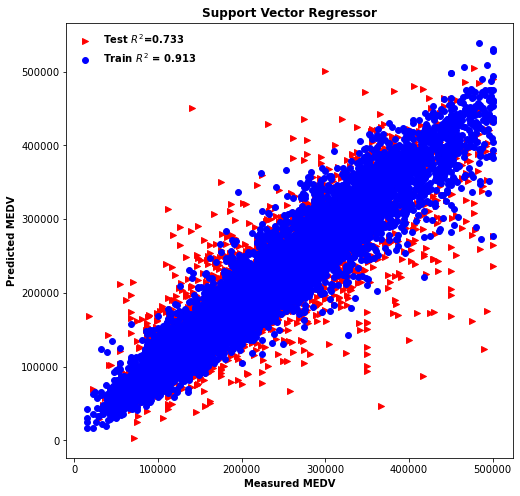

In [313]:
plt.figure(figsize = [8,8])

plt.scatter(y_test,y_predict,
            s = 35, 
            color = 'red', 
            marker = '>', 
            label = 'Test $R^{2}$=''%.3f'%r2_score(y_test_us,y_predict),
           alpha = 1)

plt.scatter(y_train, y_predict_train,
           s = 35,
           color = 'blue',
           marker = 'o',
           label = 'Train $R^{2}$ = ''%0.3f'%r2_score(y_train_us, y_predict_train),
           alpha = 1)

#plt.xlim(0,60)
#plt.ylim(0,60)
plt.legend(frameon=False,prop={'weight':'bold'})
plt.xlabel('Measured MEDV',fontweight='bold')
plt.ylabel('Predicted MEDV',fontweight='bold')
plt.title('Support Vector Regressor',fontweight='bold')
#plt.axis('square')


plt.show()